Author: Andres Felipe Alba Hernandez
Applied AI Engineer <br>
March 2020 <br>
email: v-analba@microsoft.com <br>
https://www.linkedin.com/in/ahandresf/

# Evaluate prediction using the trained model

Remember that any model used here should have been already trained. This models can be created as objects of the class ModelPredictor.

In [1]:
#Importing the class for the different data-driven models
#Note: You should train the model before using them here. 
from predictor import ModelPredictor

Using TensorFlow backend.


### Importing libraries

In [2]:
#importing parameters used during training
from conf_params_datadriven import STATE_SPACE_DIM, ACTION_SPACE_DIM, MARKOVIAN_ORDER, POLYNOMIAL_DEGREE, DROPOUT_RATE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 300

### Functions

In [4]:
def get_stats(accuracy, show_stats=True):
    maximum = accuracy.max()
    minimum = accuracy.min()
    mean = accuracy.mean()
    std = accuracy.std()
    if show_stats:
        print("/nGeneral Stadistics\n")
        print(('max accuracy:%s\nmin accuracy:%s\naverage accuracy:%s\nstandard desviation:%s\n')%(maximum,minimum,mean,std))
    return (maximum,minimum,mean,std)

In [5]:
def plot_accuracy_bars(features_names,accuracy,store_plot=False):
    minimum=accuracy.min()
    plt.xlabel('Accuracy')
    plt.ylabel('Features')
    plt.xlim(minimum-0.1, 1)
    plt.tick_params(labelsize=6)
    plt.barh(features_names,accuracy)
    plt.show()

In [6]:
def show_accuracy(accuracy_filename):
    res=np.load(accuracy_filename)
    maximum,minimum,mean,std = get_stats(res)
    plot_accuracy_bars(features_names=state_names,accuracy=res)

### Loading states and action names

This are numpy arrays (more like list) that contain the names of each possible action and state, this will be use to iterate over columns in a dataframe that contain all the data

In [7]:
#Asuming the states_names and action names where store in env_data directory
state_names = np.load('./env_data/state_names.npy', allow_pickle=True)
action_names = np.load('./env_data/action_names.npy', allow_pickle=True)

# Loading data 

The historical data can be store in csv file, for this we use the data_parser notebook, located at: https://github.com/ahandresf/pttgc/blob/master/data_parser.ipynb We load the csv file into a pandas dataframe.

If you want to use a different dataset you just need to change the data_dir variable below

In [56]:
#loading data in a dataframe
#data_dir=r'C:\Users\aalbaher\pttgc\data_1584556874.csv'
data_dir=r'C:\Users\aalbaher\pttgc\data_1585254368.csv'
data_df=pd.read_csv(data_dir)

In [57]:
print(data_df.shape)

(494625, 41)


In [58]:
# Show first some rows as a sample
data_df.iloc[0:5,:]

Unnamed: 0           time     timestamp  14FICA508.MEAS  14FICA508.SPT  \
0           0  1/1/2019 0:00  1.546322e+09     1998.030518    2000.000366   
1           1  1/1/2019 0:01  1.546322e+09     2001.770142    2000.000977   
2           2  1/1/2019 0:02  1.546323e+09     2003.749268    2000.001709   
3           3  1/1/2019 0:03  1.546323e+09     2005.346436    2000.002563   
4           4  1/1/2019 0:04  1.546323e+09     2004.673218    2000.003296   

   14TRC515.MEAS  14TRC515.SPT  14FRCA513.MEAS  14FRCA513.SPT  14FRCA511.MEAS  \
0     160.325028    160.417206     2063.264160    2066.077881        9.007957   
1     160.357956    160.417252     2061.503906    2068.052734        9.011292   
2     160.385223    160.417297     2090.827881    2068.186279        8.993635   
3     160.404862    160.417328     2090.306885    2068.321289        9.013172   
4     160.432068    160.417343     2022.833740    2068.405273        9.011353   

   ...  14FRC514.MEAS  14FRC501.MEAS  14QI508.PNT  14TY513.RO01  \
0  ...    2034.267700    4134.604004   108.248032     75.670616   
1  ...    2038.415283    4132.783691   108.240974     75.830544   
2  ...    2034.440063    4127.195801   108.343346     75.965881   
3  ...    2045.146729    4119.700684   108.350662     76.046326   
4  ...    2028.031616    4107.228516   108.410729     76.088120   

   14FIC503.MEAS  14TI502.PNT  16Q001.PNT  14QRA502.PNT  14Y559.RO01  \
0    6135.165039   147.503754    0.265072     82.733894     3.412334   
1    6137.497070   147.380493    0.269266     82.731491     3.407272   
2    6135.161133   147.194183    0.274135     83.050377     3.409111   
3    6142.140625   147.369446    0.279500     83.049866     3.418844   
4    6146.422363   147.218506    0.285180     83.050972     3.422153   

   14LRCA503.MEAS  
0       39.110107  
1       39.271370  
2       39.375282  
3       39.409756  
4       39.395699  

[5 rows x 41 columns]

# Creating subset actions, states, and others

The input action vector contain actions from $a_{0}, a_{1}, ...a_{n-1}$

In [59]:
actions_i = data_df[action_names].iloc[0:len(data_df)-1,:] #action as input
print(actions_i.shape)

(494624, 8)


The input state vector contain actions from $s_{0}, s_{1}, ...s_{n-1}$

In [60]:
state_i = data_df[state_names].iloc[0:len(data_df)-1,:] #state as input
print(state_i.shape)

(494624, 30)


The output state vector contain actions from $s_{1}, s_{2}, ...s_{n}$

In [61]:
#state as output
state_o = data_df[state_names].iloc[1::,:]
print(state_o.shape)

(494624, 30)


Creating a datasets that contain the difference between  $s_{n+1}$ and $s_{n}$. In other words the change due to the action.

In [62]:
#state_o

In [63]:
#state_i

In [64]:
#state_o.iloc[:,:]-state_i.iloc[:,:]
#state_o.subtract(state_i,axis=0)

In [65]:
action_input=np.array(data_df[action_names].iloc[0:len(data_df)-1,:]) #skip last row
state_input=np.array(data_df[state_names].iloc[0:len(data_df)-1,:]) #skip last row
state_output=np.array(data_df[state_names].iloc[1::,:]) #skip fist row

In [66]:
print(action_input.shape)
print(state_input.shape)
print(state_output.shape)

(494624, 8)
(494624, 30)
(494624, 30)


In [67]:
#check if this work properly not sure
state_diff = state_output-state_input
print(state_diff.shape)

(494624, 30)


In [68]:
diff_out=pd.DataFrame(data=state_diff,columns=state_names)

In [69]:
diff_out

14FIC015.MEAS  16FIC501.MEAS  14TI521.PNT  14PRCA502.MEAS  \
0            4.518554     -20.689514     0.022949       -0.009261   
1           74.768067      19.364441     0.123261       -0.003213   
2         -120.193848      -3.667847    -0.017487        0.003274   
3           65.075684     -14.465637     0.113220       -0.006060   
4           46.720215      15.583130     0.061615       -0.006172   
...               ...            ...          ...             ...   
494619     -19.314941      -0.358459    -0.061890       -0.015548   
494620      -2.442383      -1.923828    -0.085052       -0.007846   
494621     -23.046387       5.337647    -0.119782        0.015393   
494622      -3.058593      -3.866699    -0.092255        0.018981   
494623       3.286132       2.547974    -0.085113        0.010366   

        14FRC509.MEAS  14FRCA506.MEAS  14TI504.PNT  14TI532.PNT  \
0           -1.551880       -0.076546    -0.225555     0.097443   
1            0.651917        0.080138    -0.136650     0.054077   
2           -0.572998        0.118797     0.171387     0.021652   
3           -0.752136       -0.038180    -0.161766     0.011002   
4           -0.825317       -0.144833    -0.118073    -0.036270   
...               ...             ...          ...          ...   
494619      -3.711365       -0.000899    -0.026398     0.004944   
494620      -3.690552       -0.023301    -0.234207     0.036636   
494621       2.114136       -0.019701    -0.033943     0.018494   
494622       3.155396        0.011904    -0.164154    -0.000794   
494623      -0.496155        0.007842    -0.000702    -0.020187   

        14PRCA506.MEAS  10FRCA505.MEAS  ...  14FRC514.MEAS  14FRC501.MEAS  \
0            -0.002207      -13.774903  ...       4.147583      -1.820313   
1            -0.000196       36.070313  ...      -3.975220      -5.587890   
2            -0.001086       10.057129  ...      10.706666      -7.495117   
3            -0.003832      -34.233399  ...     -17.115113     -12.472168   
4            -0.003280        7.866699  ...      15.260376      -8.168457   
...                ...             ...  ...            ...            ...   
494619       -0.001909        9.110351  ...      -0.975220     -31.870117   
494620       -0.001040        6.097168  ...      11.775635     -25.304688   
494621        0.024901       -7.843750  ...      -0.677979     -19.618164   
494622        0.018922      -20.347168  ...      15.098877     -13.226074   
494623        0.003651       16.980469  ...     -56.521728      -9.108398   

        14QI508.PNT  14TY513.RO01  14FIC503.MEAS  14TI502.PNT  16Q001.PNT  \
0         -0.007057      0.159927       2.332031    -0.123260    0.004194   
1          0.102371      0.135338      -2.335937    -0.186310    0.004870   
2          0.007317      0.080444       6.979492     0.175263    0.005365   
3          0.060066      0.041794       4.281738    -0.150940    0.005679   
4         -0.042336      0.097877      -3.541992    -0.101502    0.005948   
...             ...           ...            ...          ...         ...   
494619     0.231384      0.015800     -29.148925     0.026871    0.000550   
494620     0.025330      0.012131      -7.506836    -0.106598    0.000573   
494621    -0.289810      0.001808      -0.253907    -0.040100    0.000557   
494622    -0.275886      0.006393      10.713379    -0.068863    0.000663   
494623    -0.249291     -0.019760      13.341797     0.074905    0.000523   

        14QRA502.PNT  14Y559.RO01  14LRCA503.MEAS  
0          -0.002403    -0.005062        0.161263  
1           0.318886     0.001839        0.103912  
2          -0.000511     0.009732        0.034473  
3           0.001106     0.003310       -0.014057  
4          -0.000114    -0.002650        0.042809  
...              ...          ...             ...  
494619     -0.003922     0.018069       -0.032047  
494620      0.587845     0.035210        0.175419  
494621      0.007545    -0.007680        0.061165  
4946

In [70]:
diff_out.shape

(494624, 30)

Get a single and action state just for testing

In [71]:
s=data_df[state_names].iloc[0,:]
a=data_df[action_names].iloc[0,:]
print(len(s))
print(len(a))

30
8


# Create Model Predictors

We just create the objects per each kind of predictor that we would like to use. <br>
Remember that a predictor function $P(s,a)$ is use in the following way: <br>
$s_{n+1}=P(s_{n},a_{n})$ 

Create each predictor object with the desire modeltype and parameters, most of the parameters can be imported from config_params_datadriven or they can be manually modify while calling the constructor.

In [72]:
'''
Create the objects for each kind of predictor
Remember that the model have to be already trained. To learn more how to train please visit:
https://github.com/BonsaiAI/datadrivenmodel
'''
#MODELS IN USE
GB=False
POLY=False
NN = True
LSTM = False

if GB:
    #Gradient Boost Predictor
    print("gradient boost")
    gb_predictor=ModelPredictor(modeltype='gb', noise_percentage=0, action_space_dim=ACTION_SPACE_DIM,
                                  state_space_dim=STATE_SPACE_DIM)
elif POLY:
    #Polynomial Predictor
    print("polynomial")
    poly_predictor=ModelPredictor(modeltype='poly', noise_percentage=0, action_space_dim=ACTION_SPACE_DIM,
                                  state_space_dim=STATE_SPACE_DIM)
elif NN:
    # Neuronal Networks
    print("neuronal networks")
    nn_predictor=ModelPredictor(modeltype='nn', noise_percentage=0, action_space_dim=ACTION_SPACE_DIM,
                              state_space_dim=STATE_SPACE_DIM)
elif LSTM:
    # Long Short Term Predictor
    print("lstm")
    lstm_predictor=ModelPredictor(modeltype='lstm', noise_percentage=0, action_space_dim=ACTION_SPACE_DIM,
                                  state_space_dim=STATE_SPACE_DIM, markovian_order=MARKOVIAN_ORDER)
else:
    print('you did NOT select any model')

#MODELS UNUSED
'''
The model below are NOT used, the untrained models can be here.
Please move the model above if you want to use them.

'''


neuronal networks
nn  is used as the data driven model to train brain.
Folder not in sim/, using current directory








'\nThe model below are NOT used, the untrained models can be here.\nPlease move the model above if you want to use them.\n\n'

### Test models
**You may want to test the objects with a single (s,a) input to be sure it works.** <br>
Comment the cell for the unused or untrained models.


In [73]:
#gb_predictor.predict(s,a)

In [74]:
nn_predictor.predict(s,a)

array([ 7.9931801e+01, -1.5894777e+00, -2.2092333e-01,  7.9802699e-02,
        7.9676967e+00,  1.5070140e-01, -1.6653738e+00,  2.1516334e-01,
        8.7710440e-02, -1.3685169e+00, -3.7142923e-01, -4.6774191e-01,
       -2.0699051e-01, -3.6947709e-01,  3.0245168e+00,  2.9735205e+00,
       -1.0210957e+01, -1.3557553e+00,  2.3349960e+00,  8.1730974e-01,
        2.6535342e+02, -7.7786446e+01, -1.2814943e+00, -1.4052796e+00,
        9.9257221e+00, -1.6307179e+00, -3.2562066e-02,  2.5228328e-01,
       -1.1873761e-01, -2.6891906e+00], dtype=float32)

In [75]:
#lstm_predictor.predict(s,a)

# Trace using predictor

Other way to evaluate the accuracy of the model is to generate a trace following the actions store from the original data, start in an initial state $s_{0}$, and feed the model predictor with the output of this state. Continue using the actions from the historical data (follow the same action trace) to create a trace of states<br> 
- For a model predictor $P(s,a)$ <br>
- Generate a trace using $s_{n+1}=P(s_{n},a_{n})$ using the actions $a_{0}, ...,a_{T-1}$ from the historical data that contain $T$ samples<br>
- Then compare the difference between the states in the data and the ones generated by the datadriven model trace. 

In [76]:
'''
This function generate the trace using:
predictor: object used for predict next staet
initial_state: the starting point in the state space.
action_trace: a set of actions from historical data, this is like the policy.
'''
def get_datadriven_trace(predictor,initial_state,actions_trace):
    input_state = initial_state
    state_estimation=[initial_state]
    #print("Test prediction",predictor.predict(s,a))
    #print("Actions",actions_trace)
    #This is not the fastest way but let test
    for row in range(0,len(actions_trace)):
        try:
            input_state=predictor.predict(input_state,actions_trace.iloc[row,:])
            state_estimation.append(input_state)
        except:
            print("ERROR at iteration:%s\nState:\n" % (row))
            print(input_state)
            break
    state_trace=np.array(state_estimation)
    print("State Trace Shape: ", state_trace.shape)
    return(state_trace,input_state)

In [86]:
'''
This function generate the trace using:
predictor: object used for predict next staet
initial_state: the starting point in the state space.
action_trace: a set of actions from historical data, this is like the policy.
'''
def get_datadriven_trace_diff(predictor,initial_state,actions_trace):
    input_state = initial_state
    state_estimation=[initial_state]
    #print("Test prediction",predictor.predict(s,a))
    #print("Actions",actions_trace)
    #This is not the fastest way but let test
    for row in range(0,len(actions_trace)):
        try:
            diff_state=predictor.predict(input_state,actions_trace.iloc[row,:])
            input_state=input_state+diff_state
            state_estimation.append(input_state)
        except:
            print("ERROR at iteration:%s\nState:\n" % (row))
            print(input_state)
            break
    state_trace=np.array(state_estimation)
    print("State Trace Shape: ", state_trace.shape)
    return(state_trace,input_state)

# Models Evaluation

In [77]:
#Inputs
initial_state=state_i.iloc[0,:]
actions_trace=actions_i

In [78]:
#Output to compare with
state_trace = np.array(data_df[state_names])

In [79]:
#variable you want to check
variable_name='14QI508.PNT'

In [80]:
#variable you want to check
##print(state_names)
var_i=np.where(state_names==variable_name)[0][0]
print(var_i)

22


In [125]:
def plot_results(estimate_trace,real_trace,title="Non title provided"):
    plt.plot(estimate_trace,label='Predictive trace')
    plt.plot(real_trace,label='Real trace',linewidth=0.3)
    #plt.plot(real_trace,'*',label='Real trace')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
def plot_several_traces(estimate_trace,real_trace):
    for column in range(30):
        state=state_names[column]
        plot_title=('Estimation vs Real for state: %s'%state)
        plot_results(estimate_trace=diff_state_estimation[:,column],real_trace=diff_out[:,column],title=plot_title)

In [82]:
def plot_all_traces(predictor_trace):
    for column in range(30):
        plot_results(estimate_trace=predictor_trace[:,column],real_trace=state_trace[:,column],model='Neuronal Networks')

# Original differential trace

In [95]:
state_diff.shape

(494624, 30)

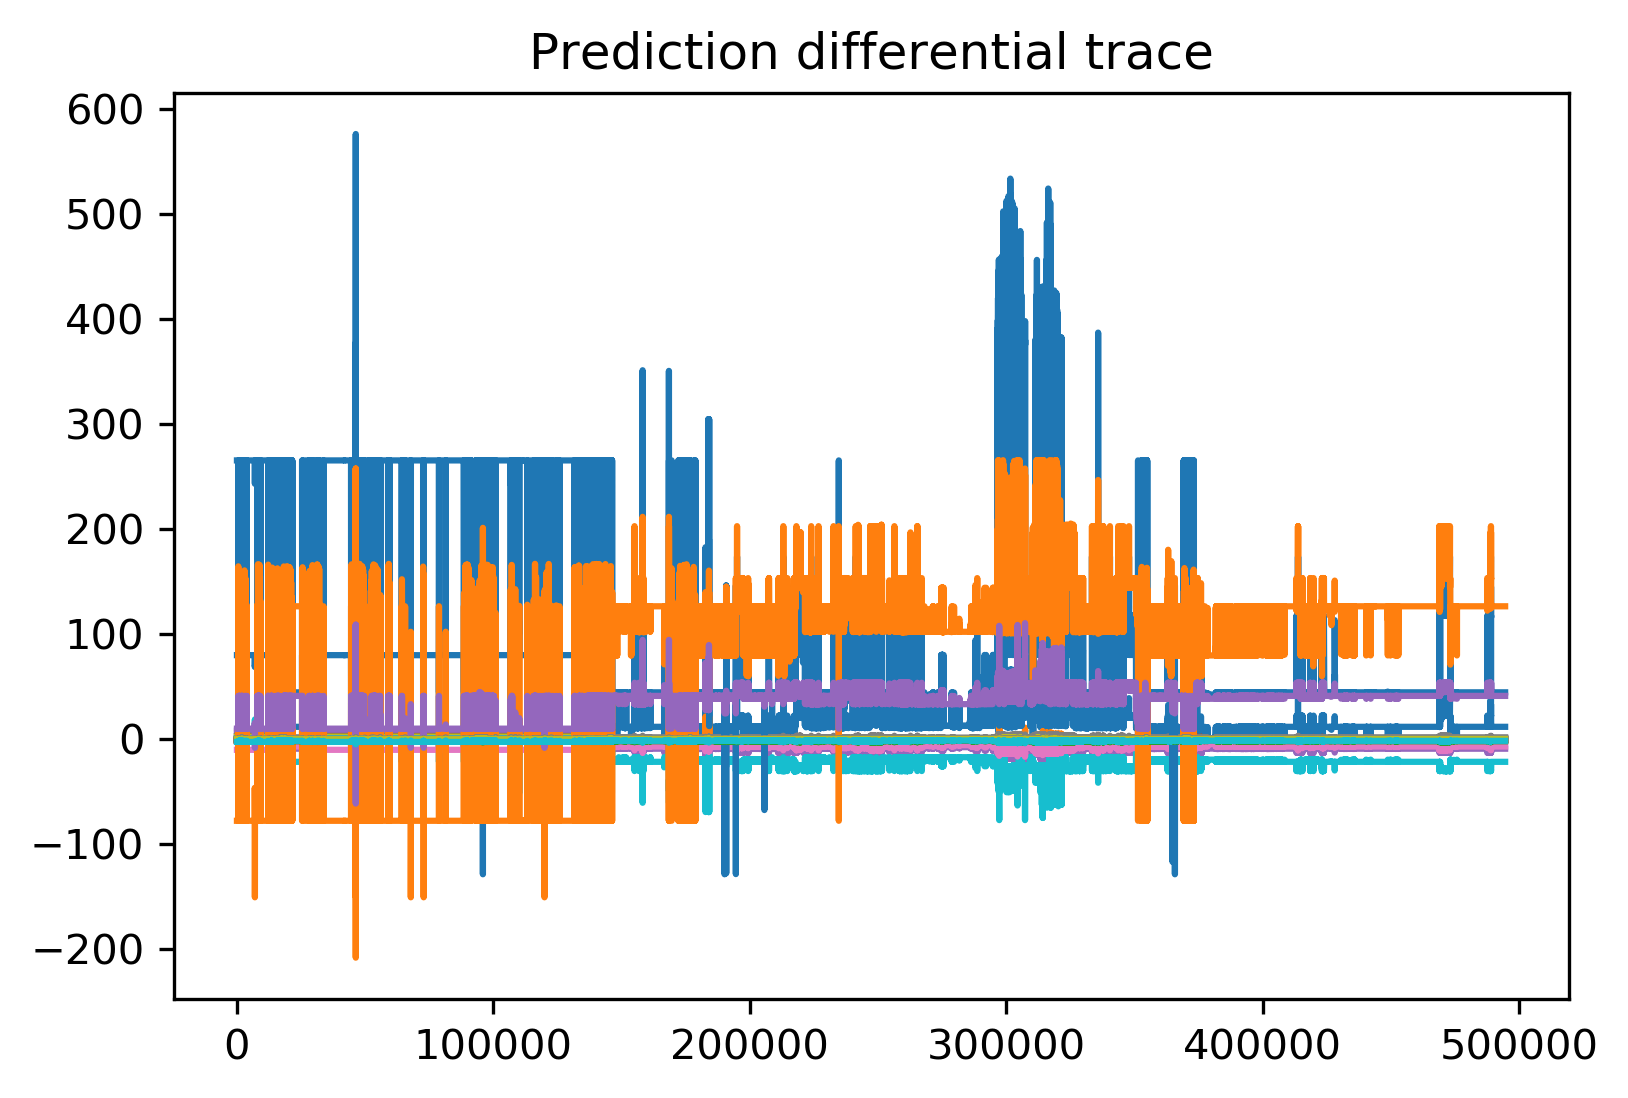

In [98]:
def predict_step_trace(predictor):
    #predictor=nn_predictor
    input_state = state_i.iloc[0,:]
    diff_state_estimation=[]
    for observation in range(0,len(actions_trace)):
        input_state = state_i.iloc[observation,:]
        #diff_state = predictor.predict(input_state,actions_trace.iloc[observation,:])
        diff_state = predictor.predict(input_state,actions_trace.iloc[observation,:])
        diff_state_estimation.append(diff_state)
    plt.title('Prediction differential trace')
    plt.plot(diff_state_estimation)
    diff_state_estimation=np.array(diff_state_estimation)
return(diff_state_estimation)

In [101]:
#diff_state_estimation=np.array(diff_state_estimation)
print(diff_state_estimation.shape)
print(diff_out.shape)

(494624, 30)
(494624, 30)


In [119]:
diff_state_estimation[:,column].shape

(494624,)

In [120]:
diff_out.iloc[:,column].shape

(494624,)

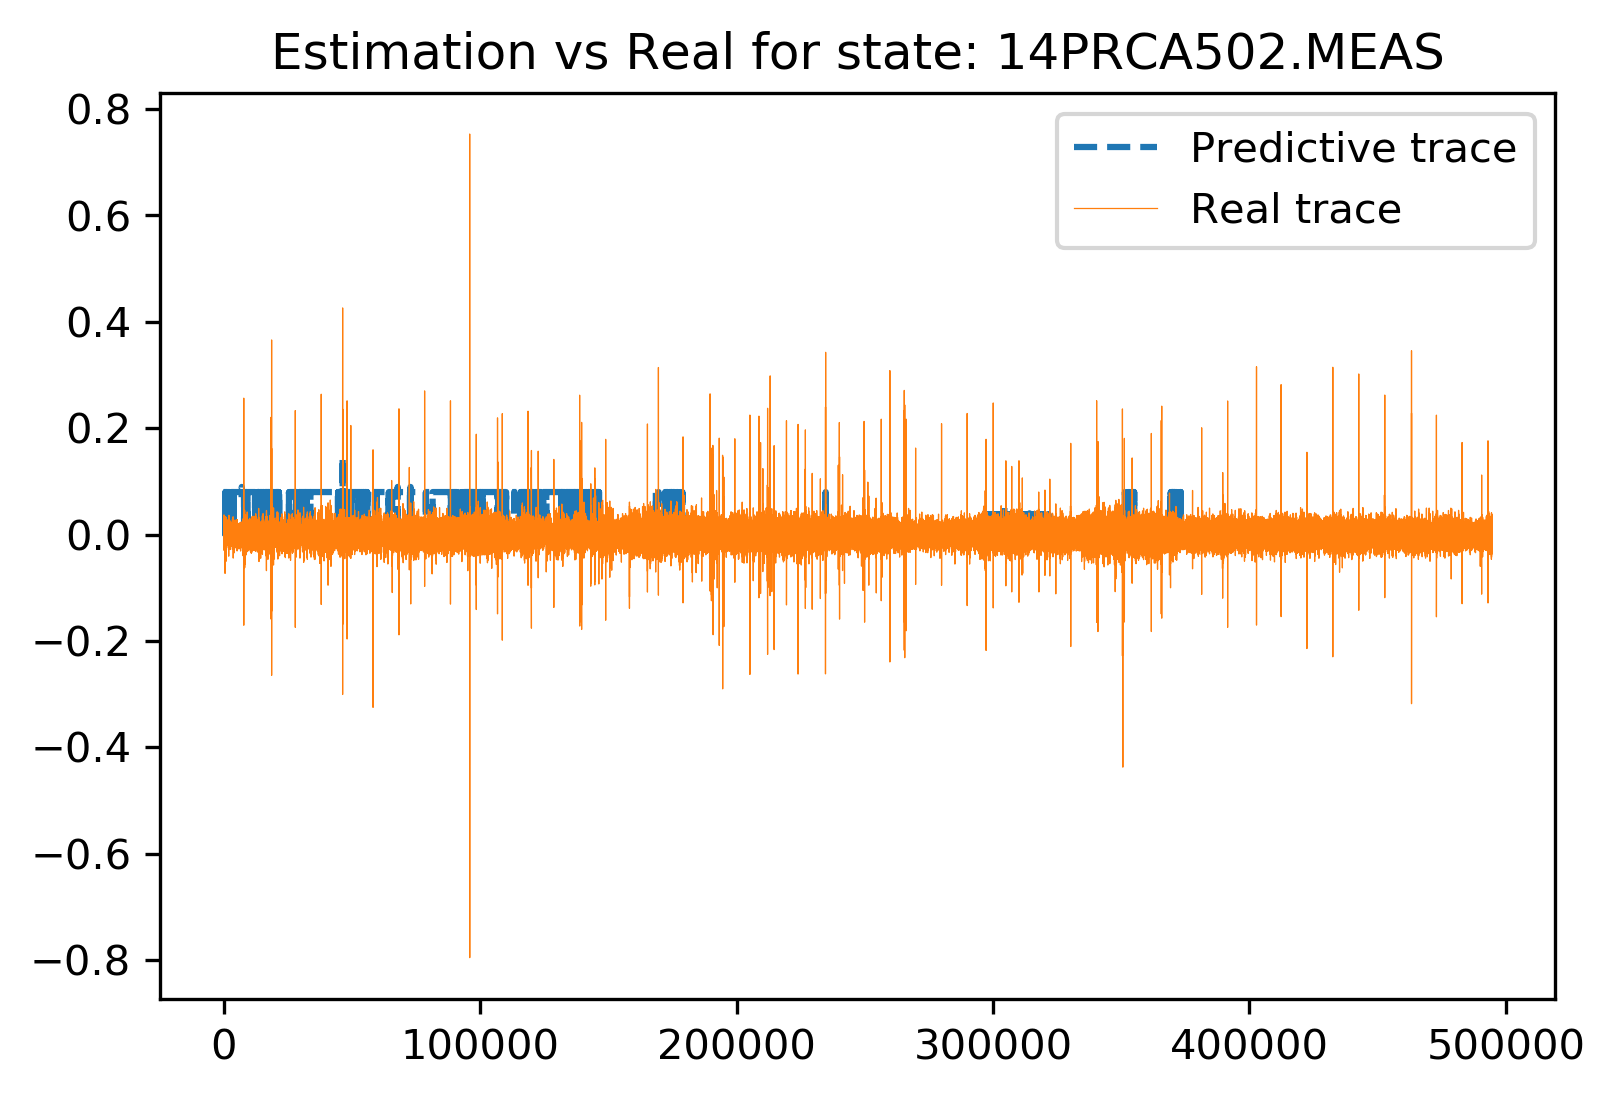

In [122]:
column=3
state=state_names[column]
plot_title=('Estimation vs Real for state: %s'%state)
plot_results(estimate_trace=diff_state_estimation[:,column],real_trace=diff_out.iloc[:,column],title=plot_title)

In [ ]:
get_stats(diff_state_estimation[:,column],
diff_out.iloc[:,column]

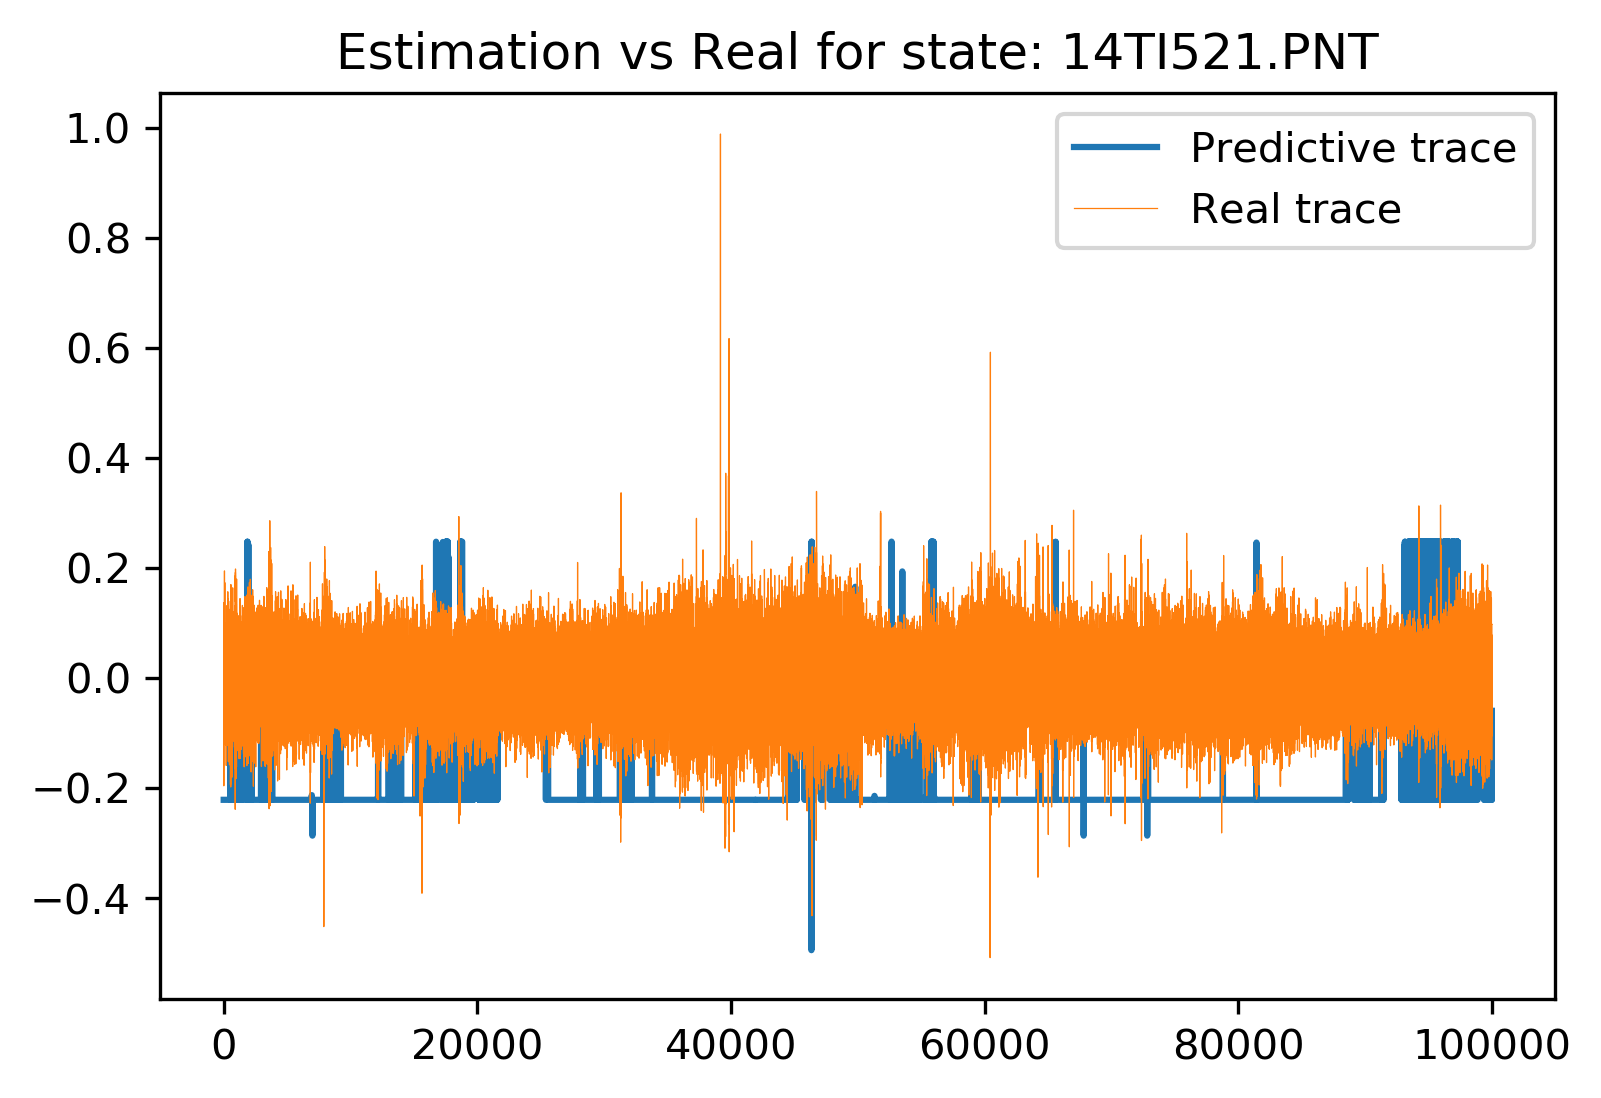

In [131]:
#column=3
column=2
state=state_names[column]
plot_title=('Estimation vs Real for state: %s'%state)
plot_results(estimate_trace=diff_state_estimation[0:100000,column],real_trace=diff_out.iloc[0:100000,column],title=plot_title)

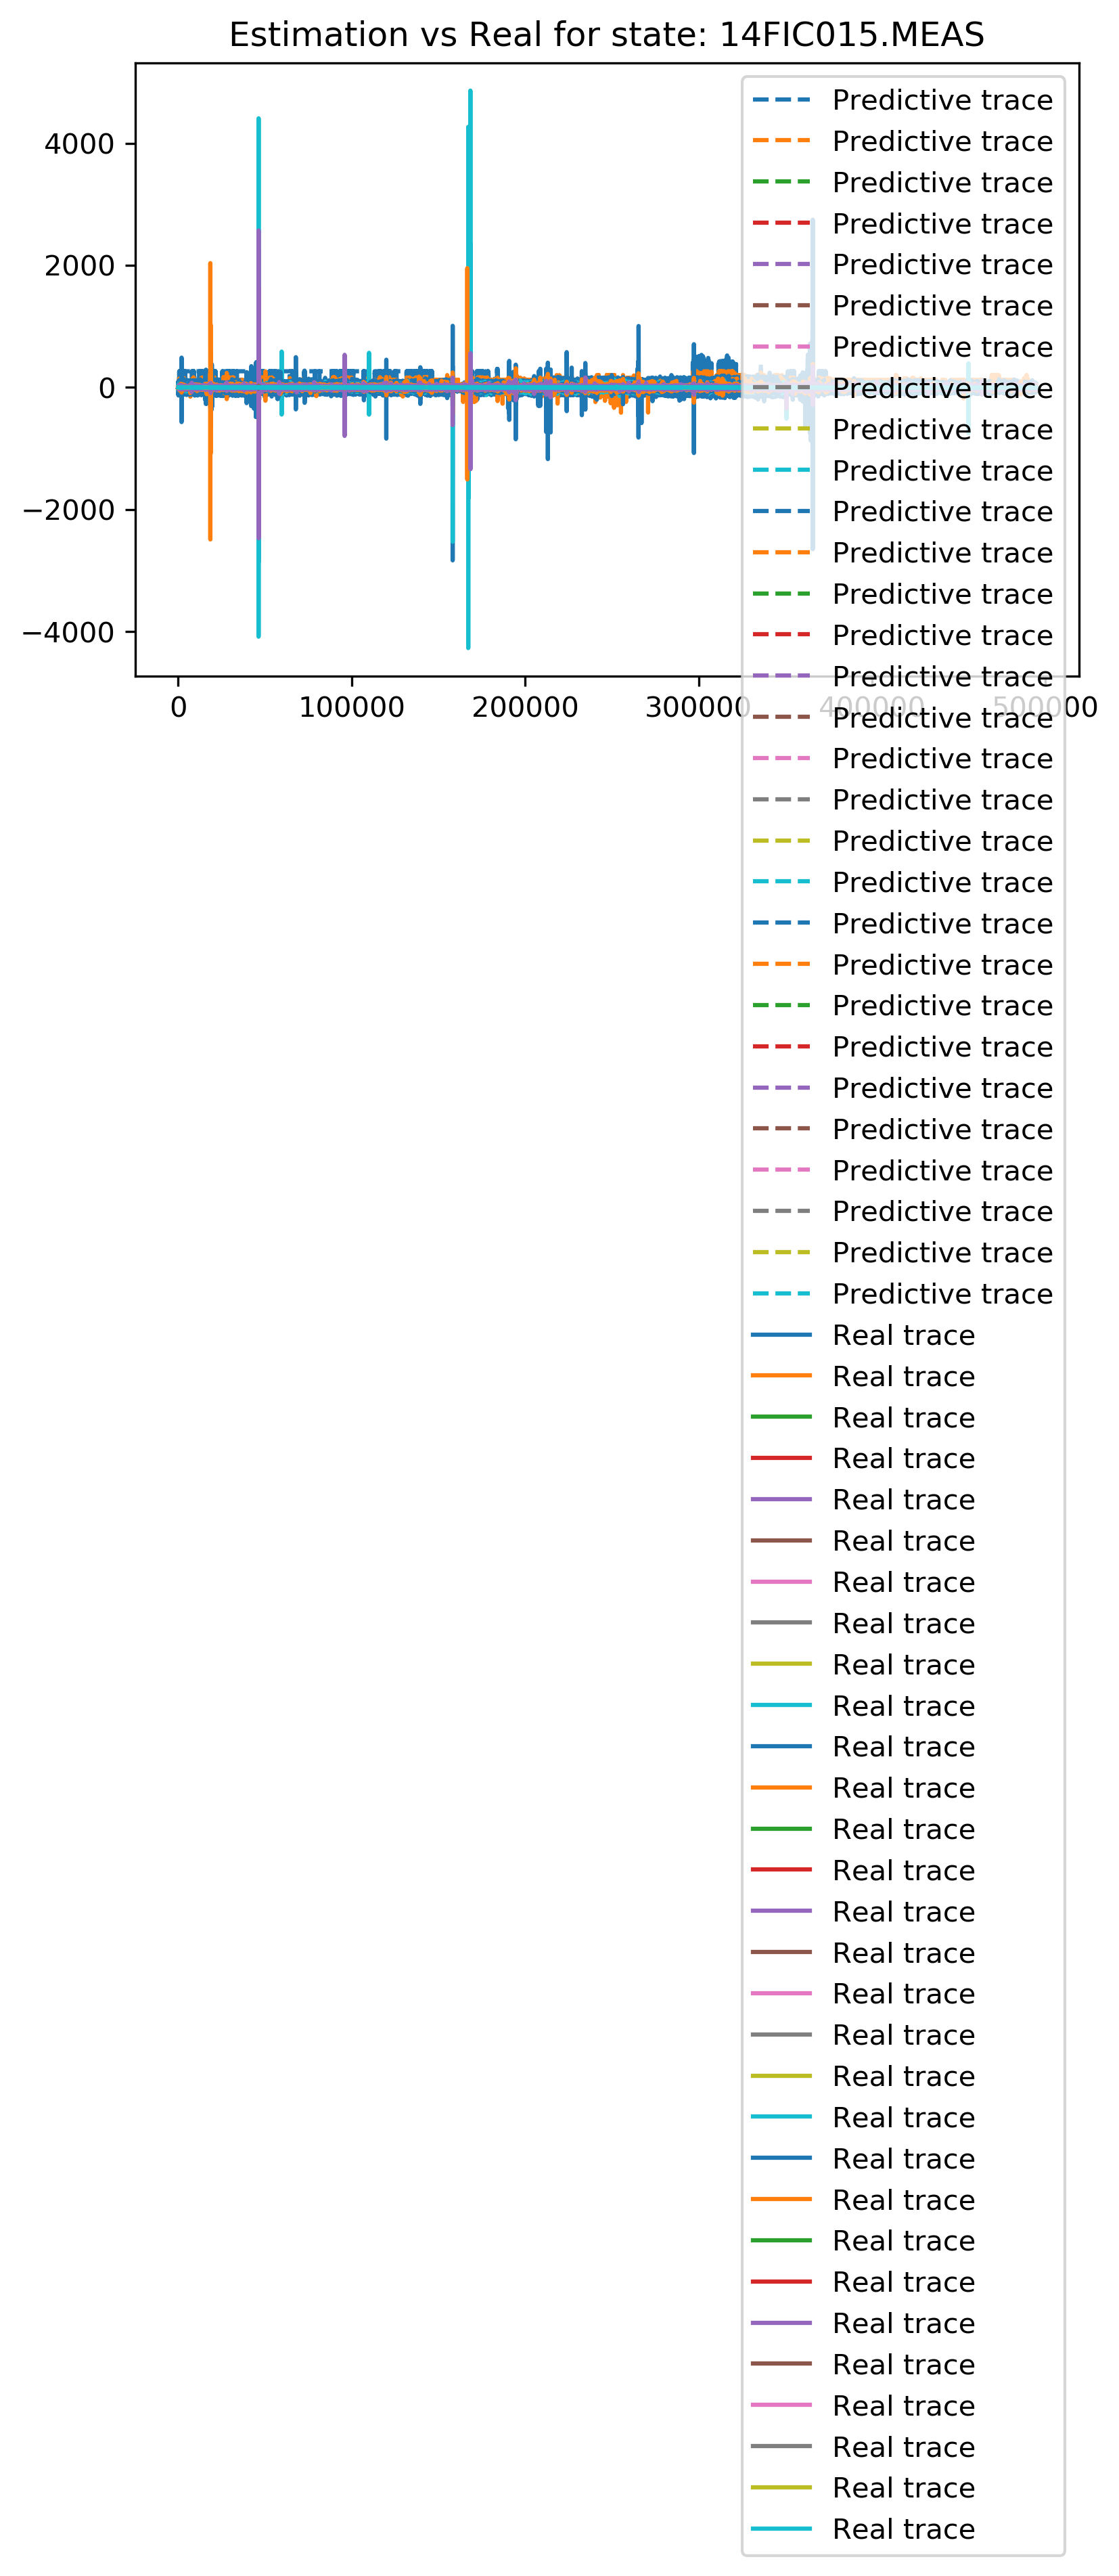

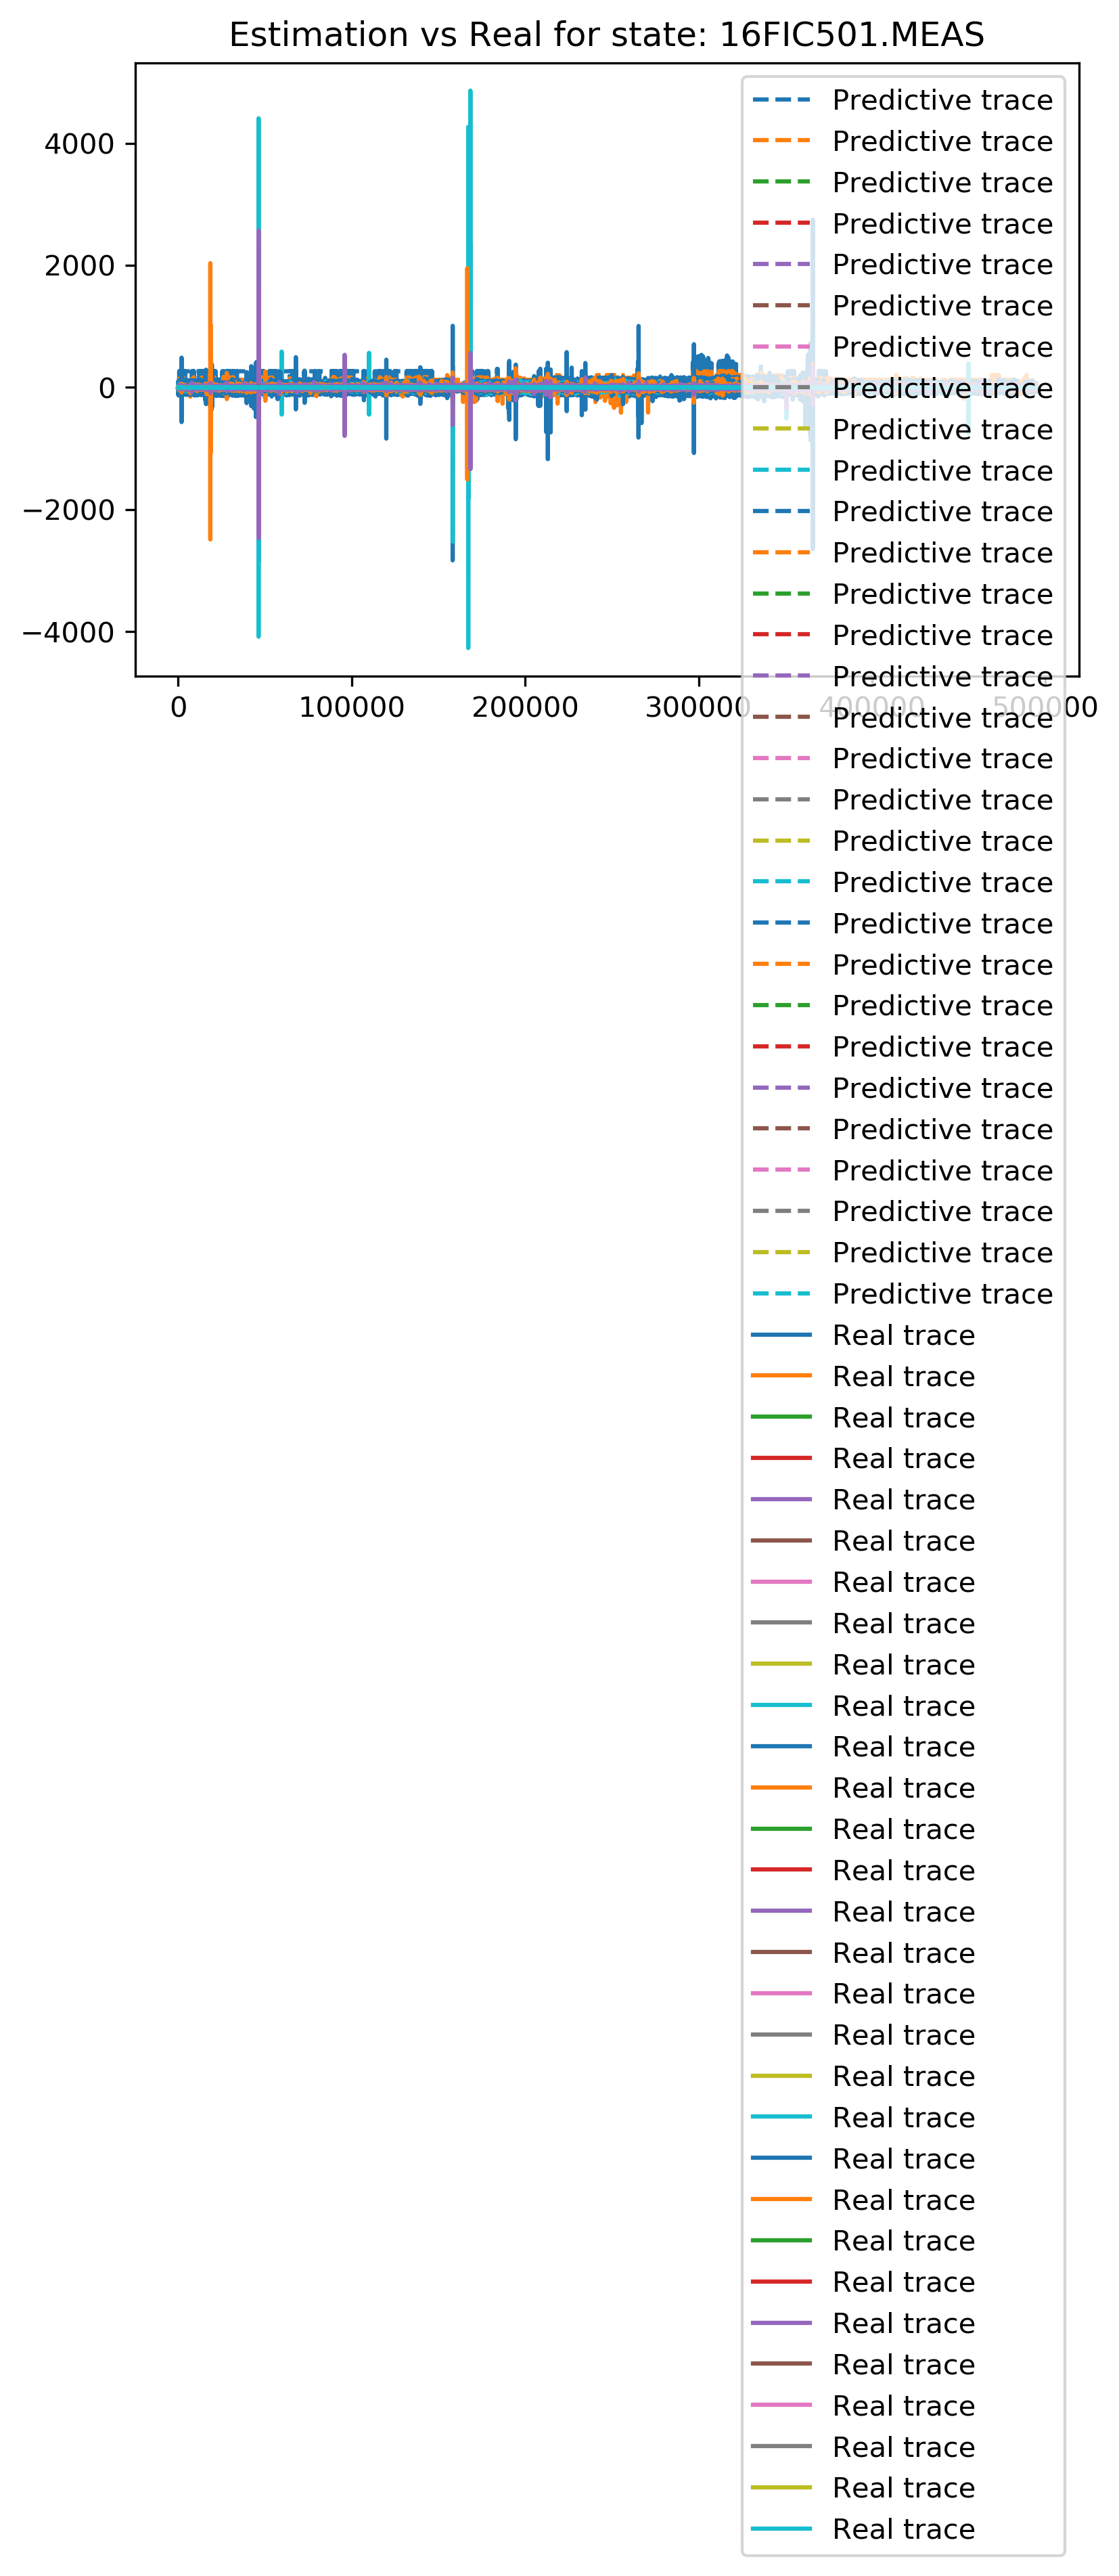

KeyboardInterrupt: 

In [111]:
plot_several_traces(estimate_trace=diff_state_estimation,real_trace=diff_out)

In [ ]:
nn_trace_diff, _ = get_datadriven_trace_diff(predictor=nn_predictor,initial_state=initial_state,actions_trace=actions_trace)

# Neuronal Network diff

In [87]:
nn_trace_diff, _ = get_datadriven_trace_diff(predictor=nn_predictor,initial_state=initial_state,actions_trace=actions_trace)

ERROR at iteration:15473
State:

14FIC015.MEAS     7.261749e+03
16FIC501.MEAS     4.117227e+04
14TI521.PNT      -6.573800e+02
14PRCA502.MEAS    3.784651e+02
14FRC509.MEAS     1.845188e+04
14FRCA506.MEAS   -6.022145e+02
14TI504.PNT      -9.163583e+03
14TI532.PNT       9.228990e+02
14PRCA506.MEAS    1.046606e+03
10FRCA505.MEAS   -8.018424e+04
14FICA508.MD     -9.830643e+02
14TRC515.MD      -7.628085e+02
14FRCA513.MD     -4.996872e+02
14FRCA511.MD     -9.296136e+02
14TIC527.MEAS     1.214854e+04
14QI506.PNT      -1.204876e+04
14FRC514.OUT     -8.079573e+04
14FRC501.OUT     -1.407338e+04
14TI535.MEAS     -3.883586e+03
14TI528.PNT      -1.979345e+04
14FRC514.MEAS     6.109639e+06
14FRC501.MEAS    -4.433746e+05
14QI508.PNT       1.088761e+04
14TY513.RO01      2.911396e+03
14FIC503.MEAS     1.065914e+04
14TI502.PNT      -8.524709e+03
16Q001.PNT        1.289931e+03
14QRA502.PNT     -6.607221e+03
14Y559.RO01      -1.849652e+02
14LRCA503.MEAS   -3.854582e+03
Name: 0, dtype: float64
State Trace S

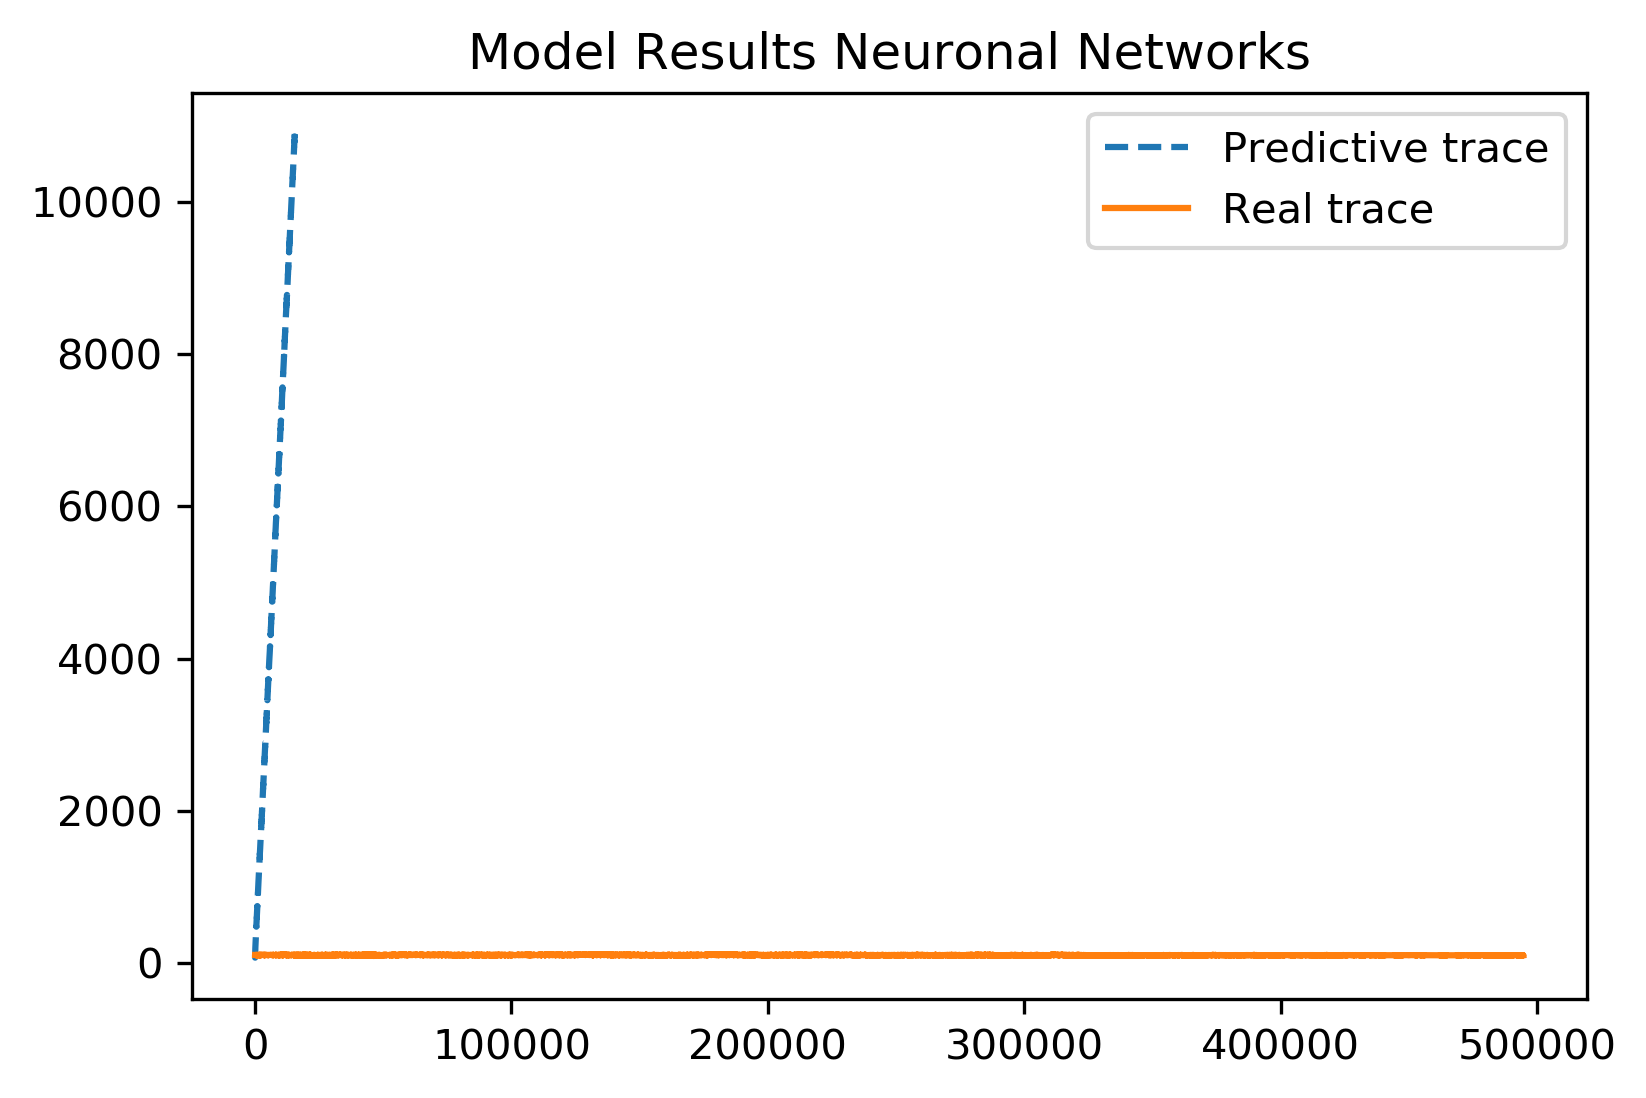

In [89]:
plot_results(estimate_trace=nn_trace_diff[:,var_i],real_trace=state_trace[:,var_i],model='Neuronal Networks')

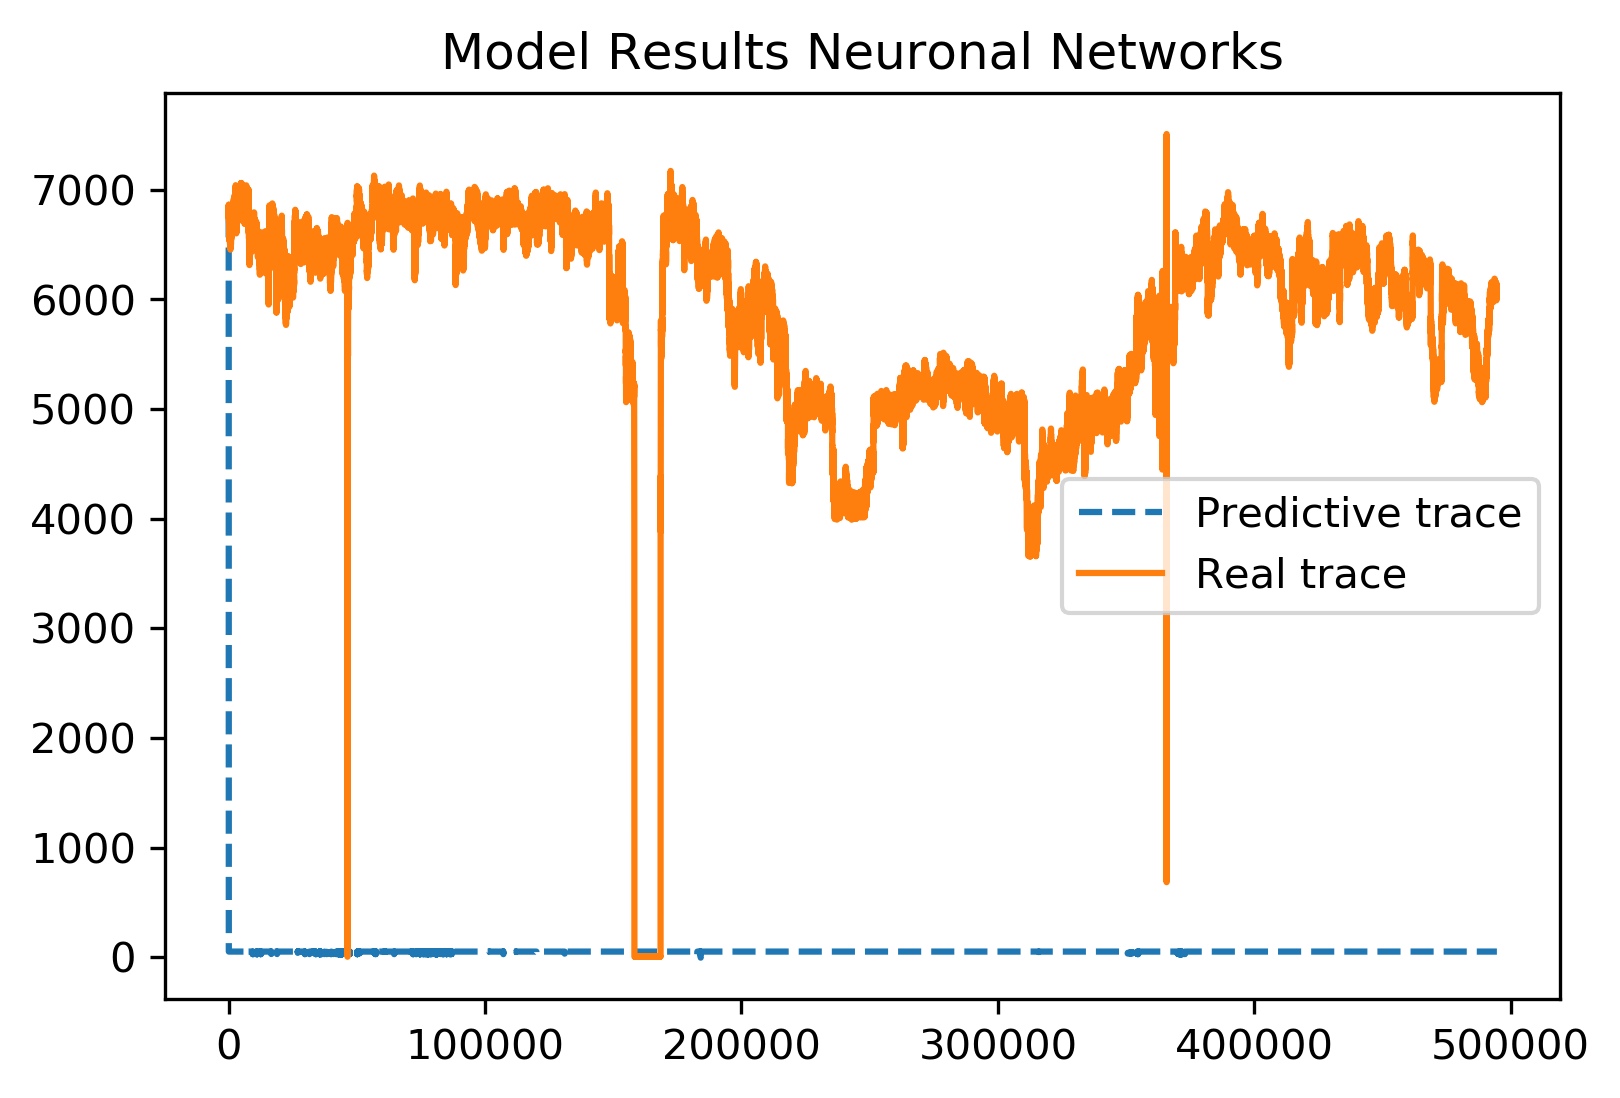

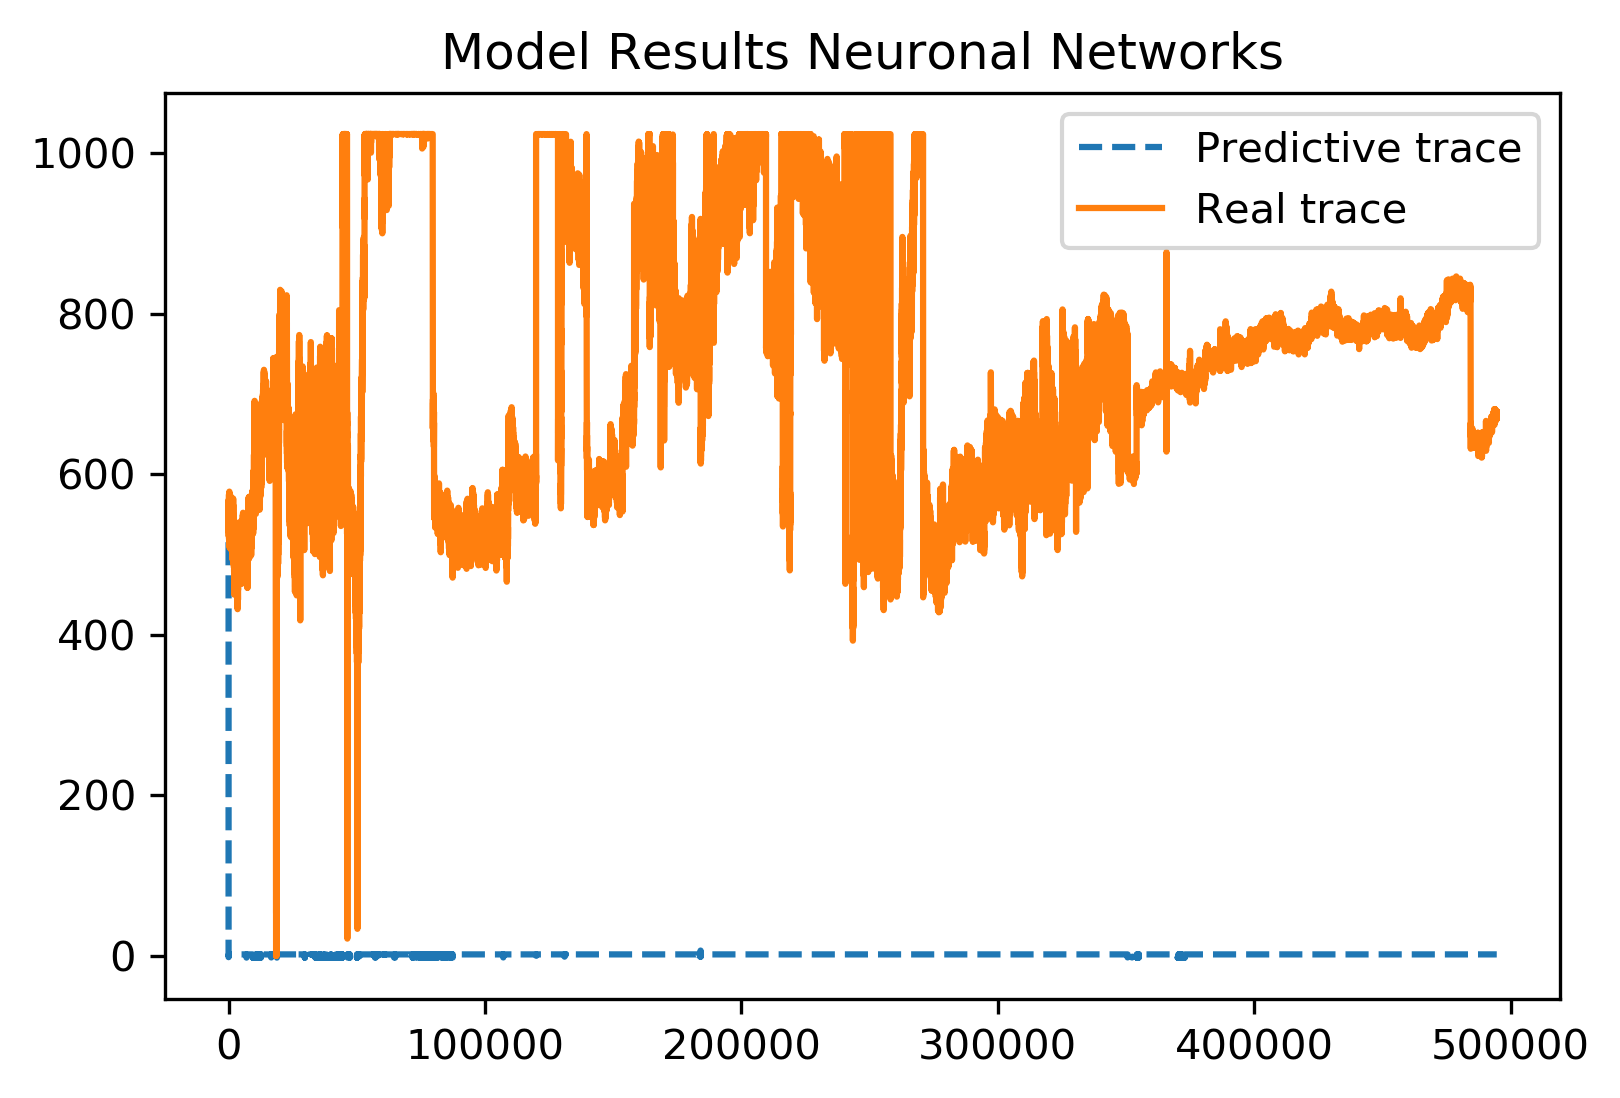

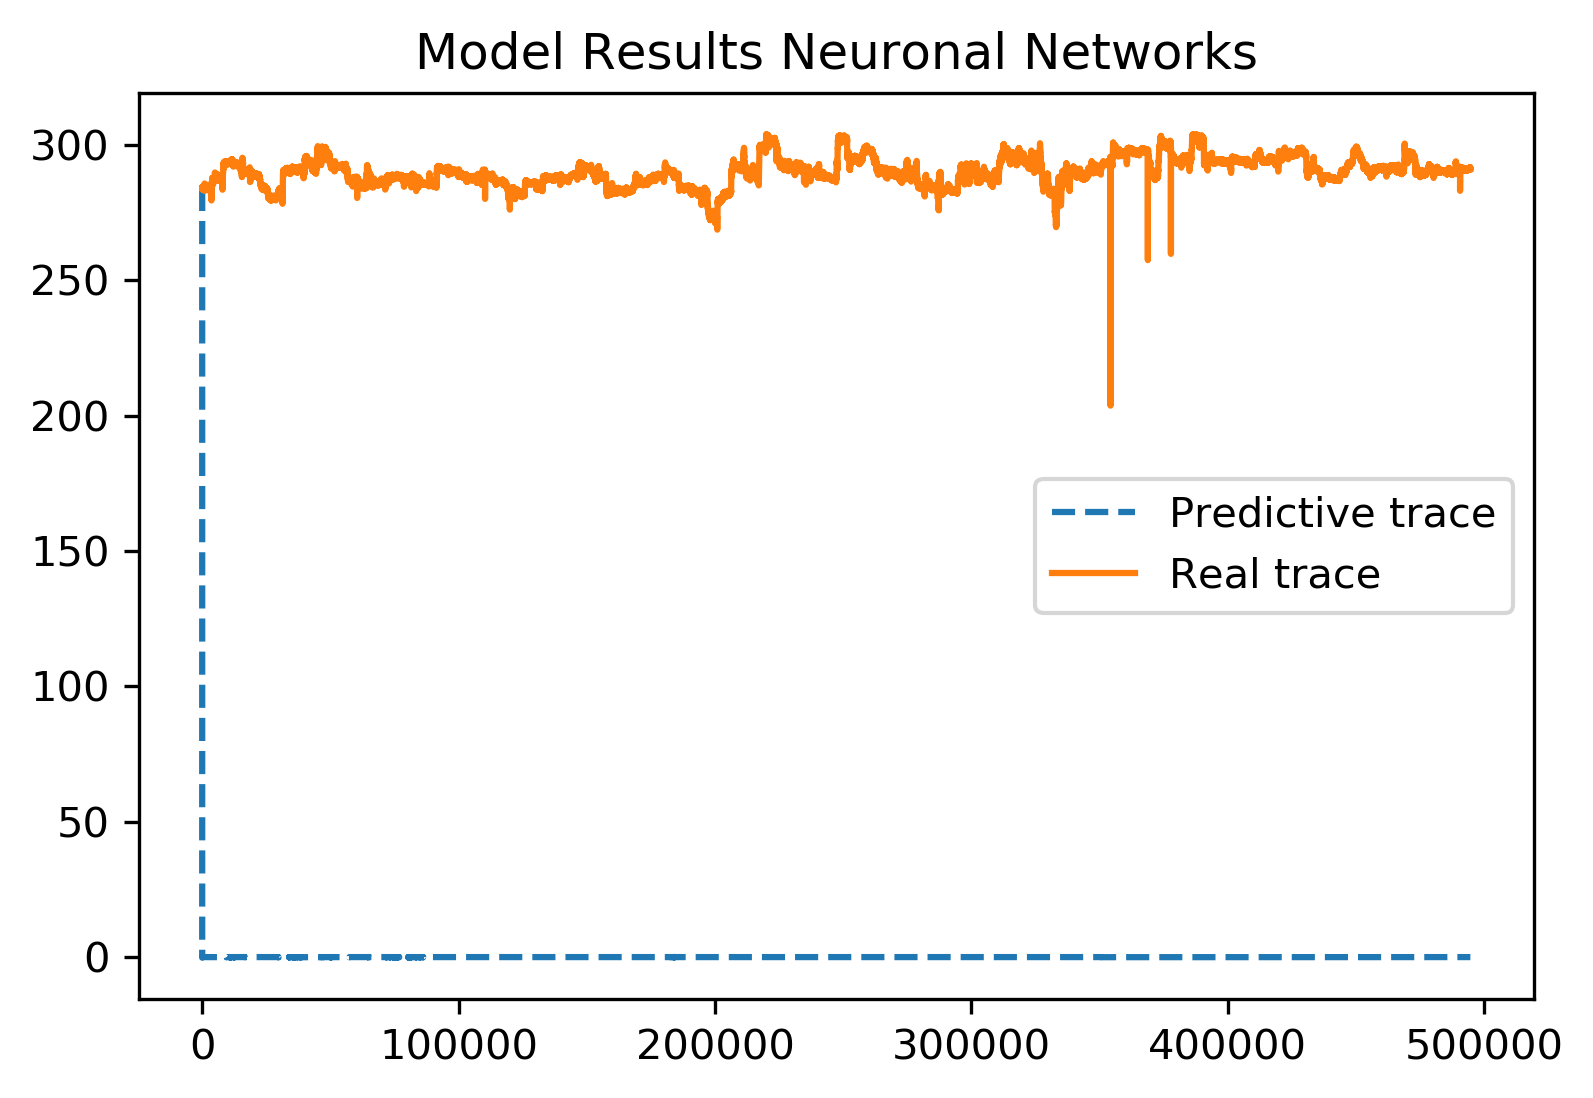

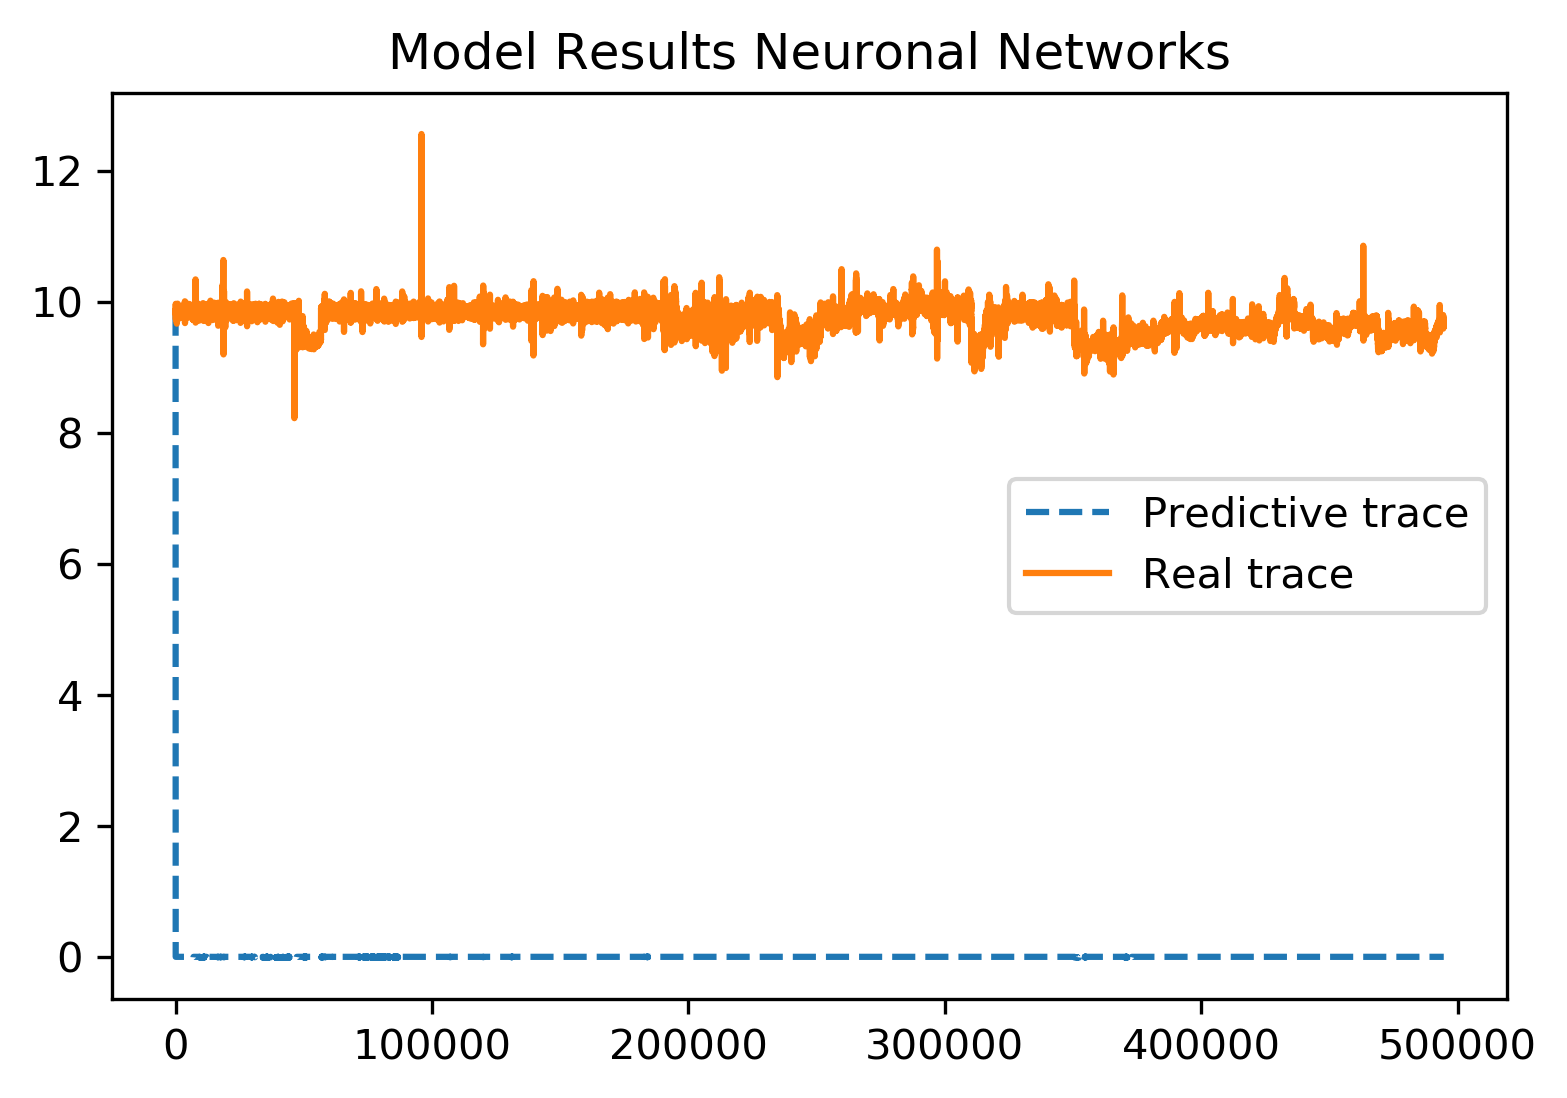

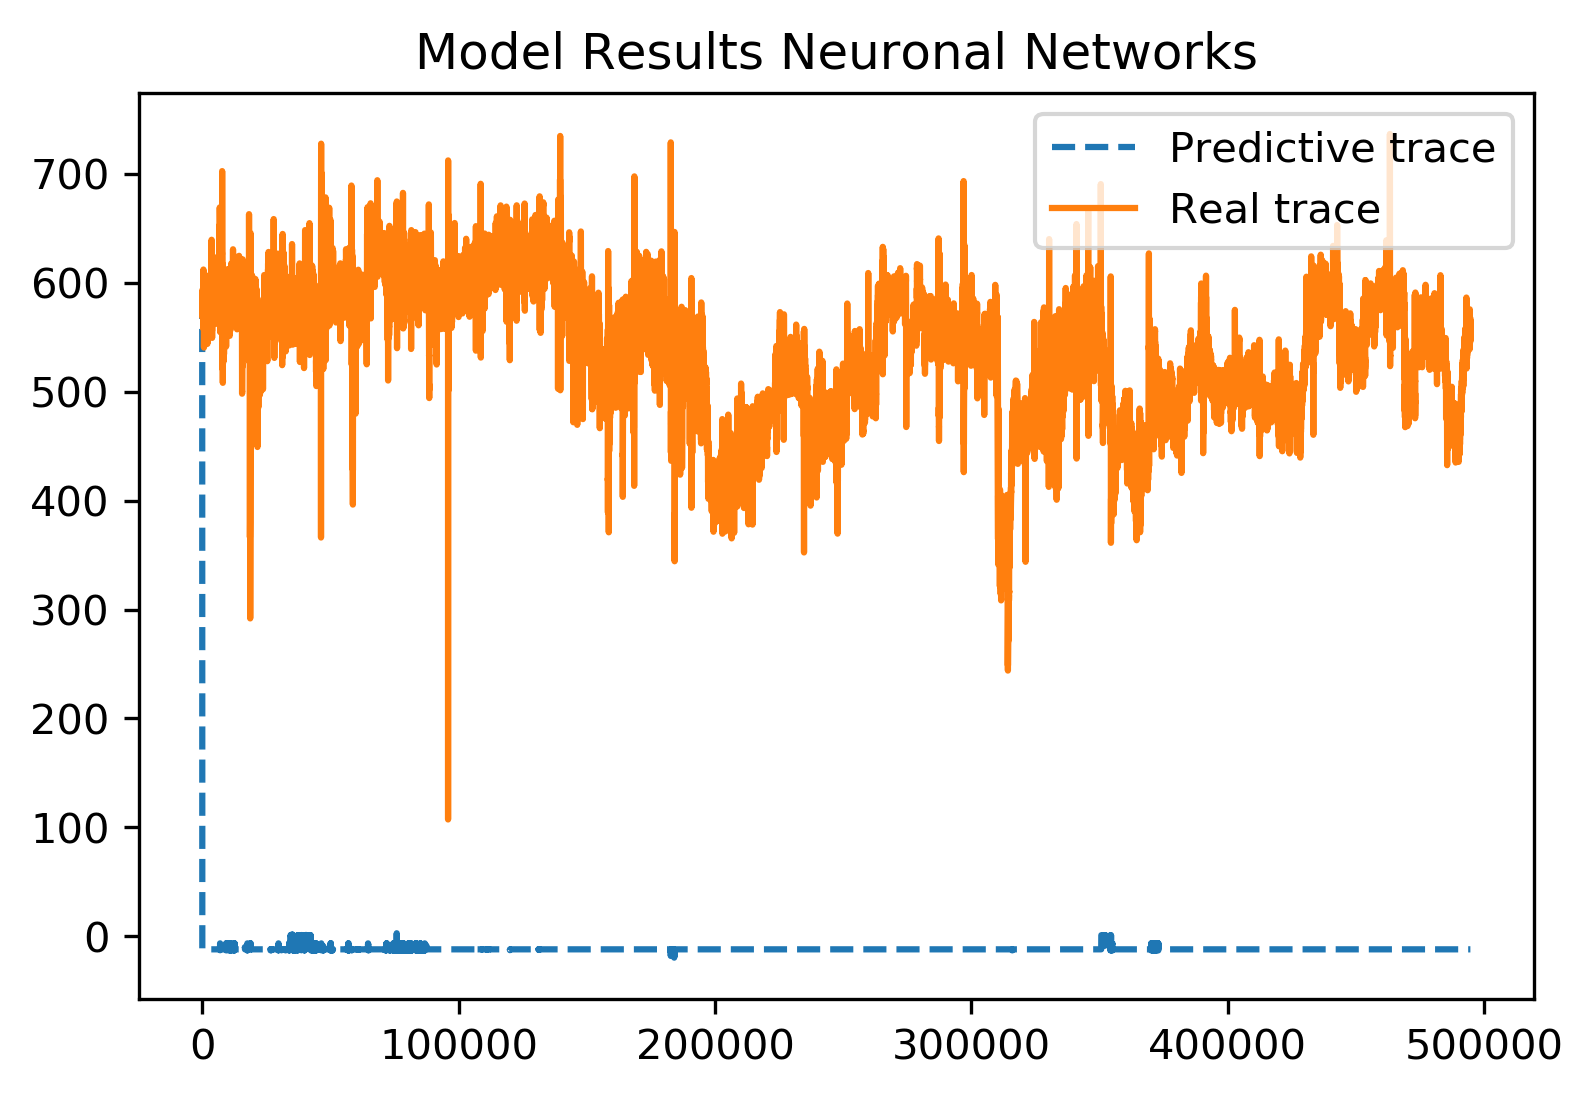

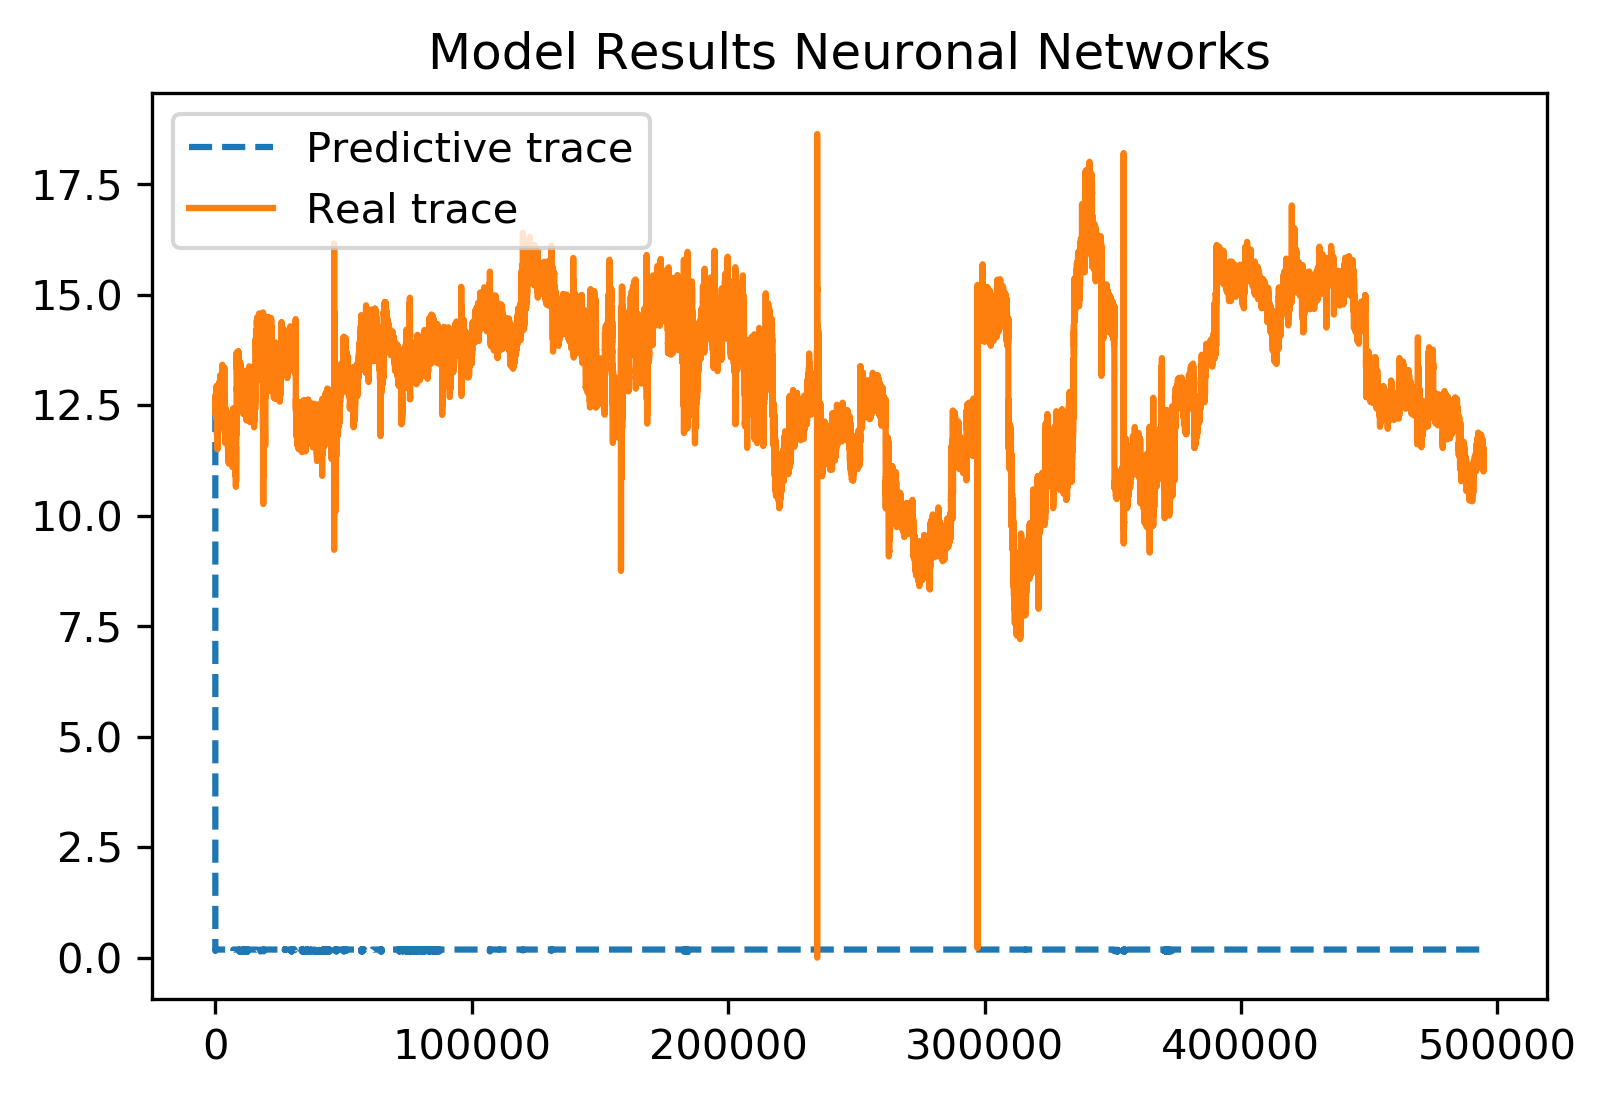

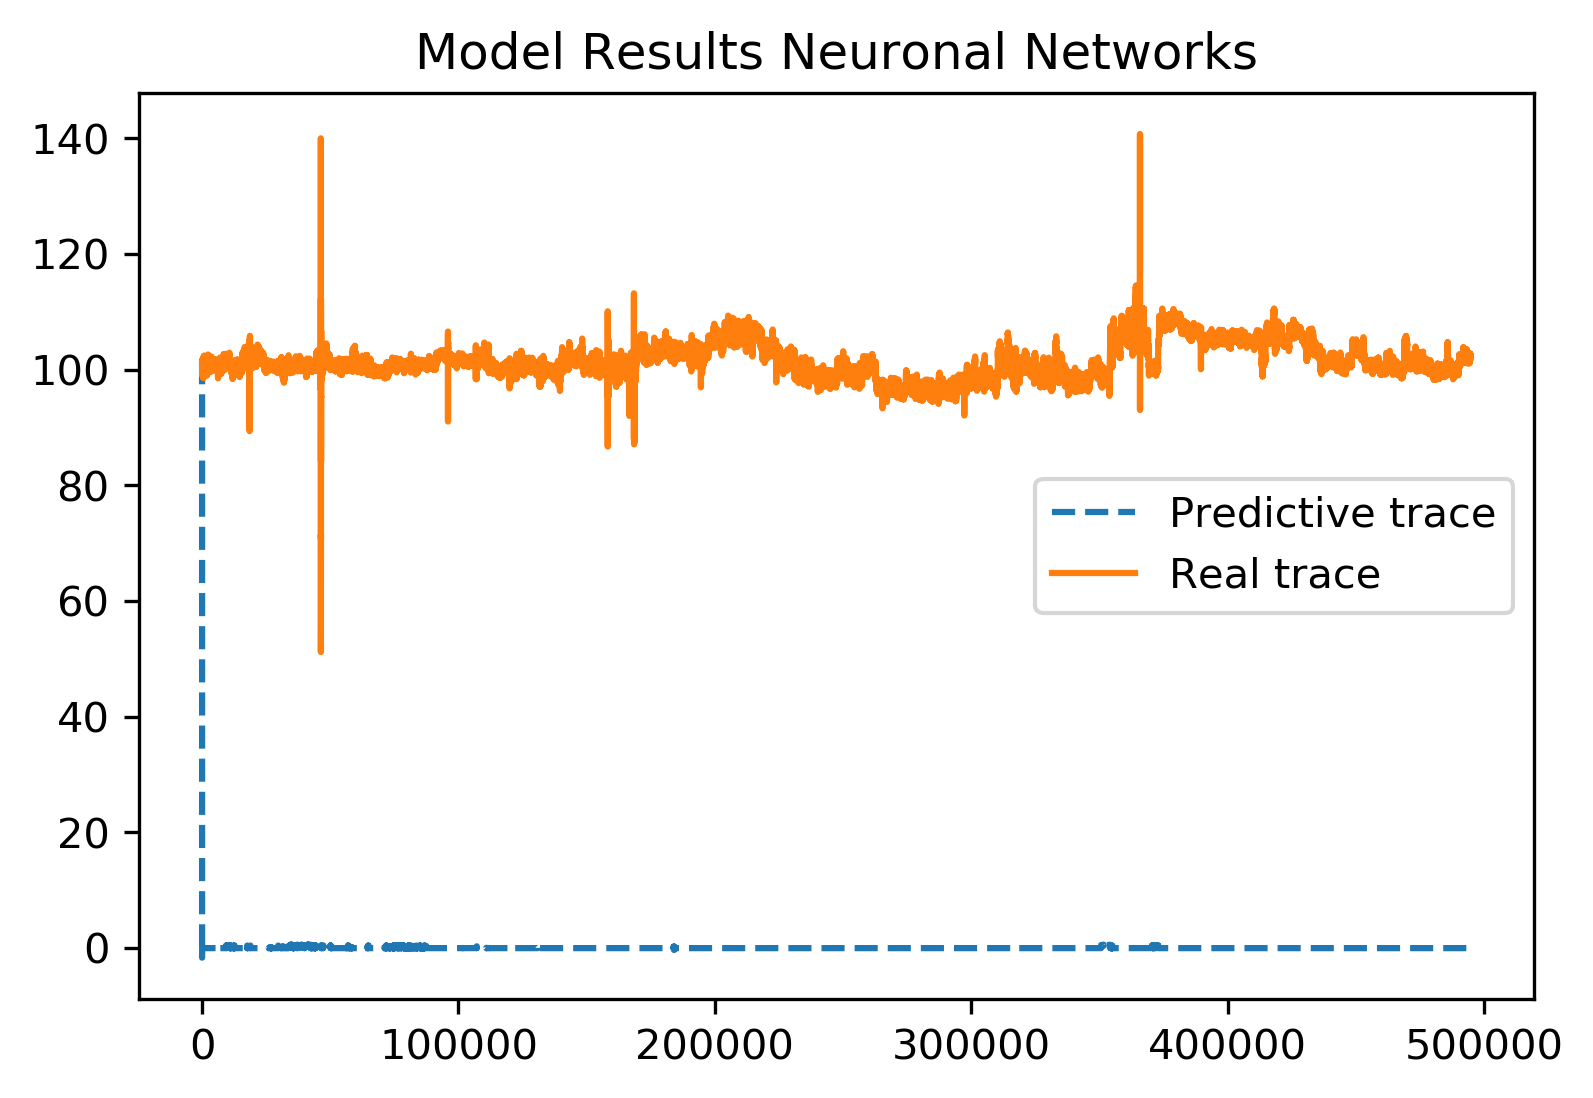

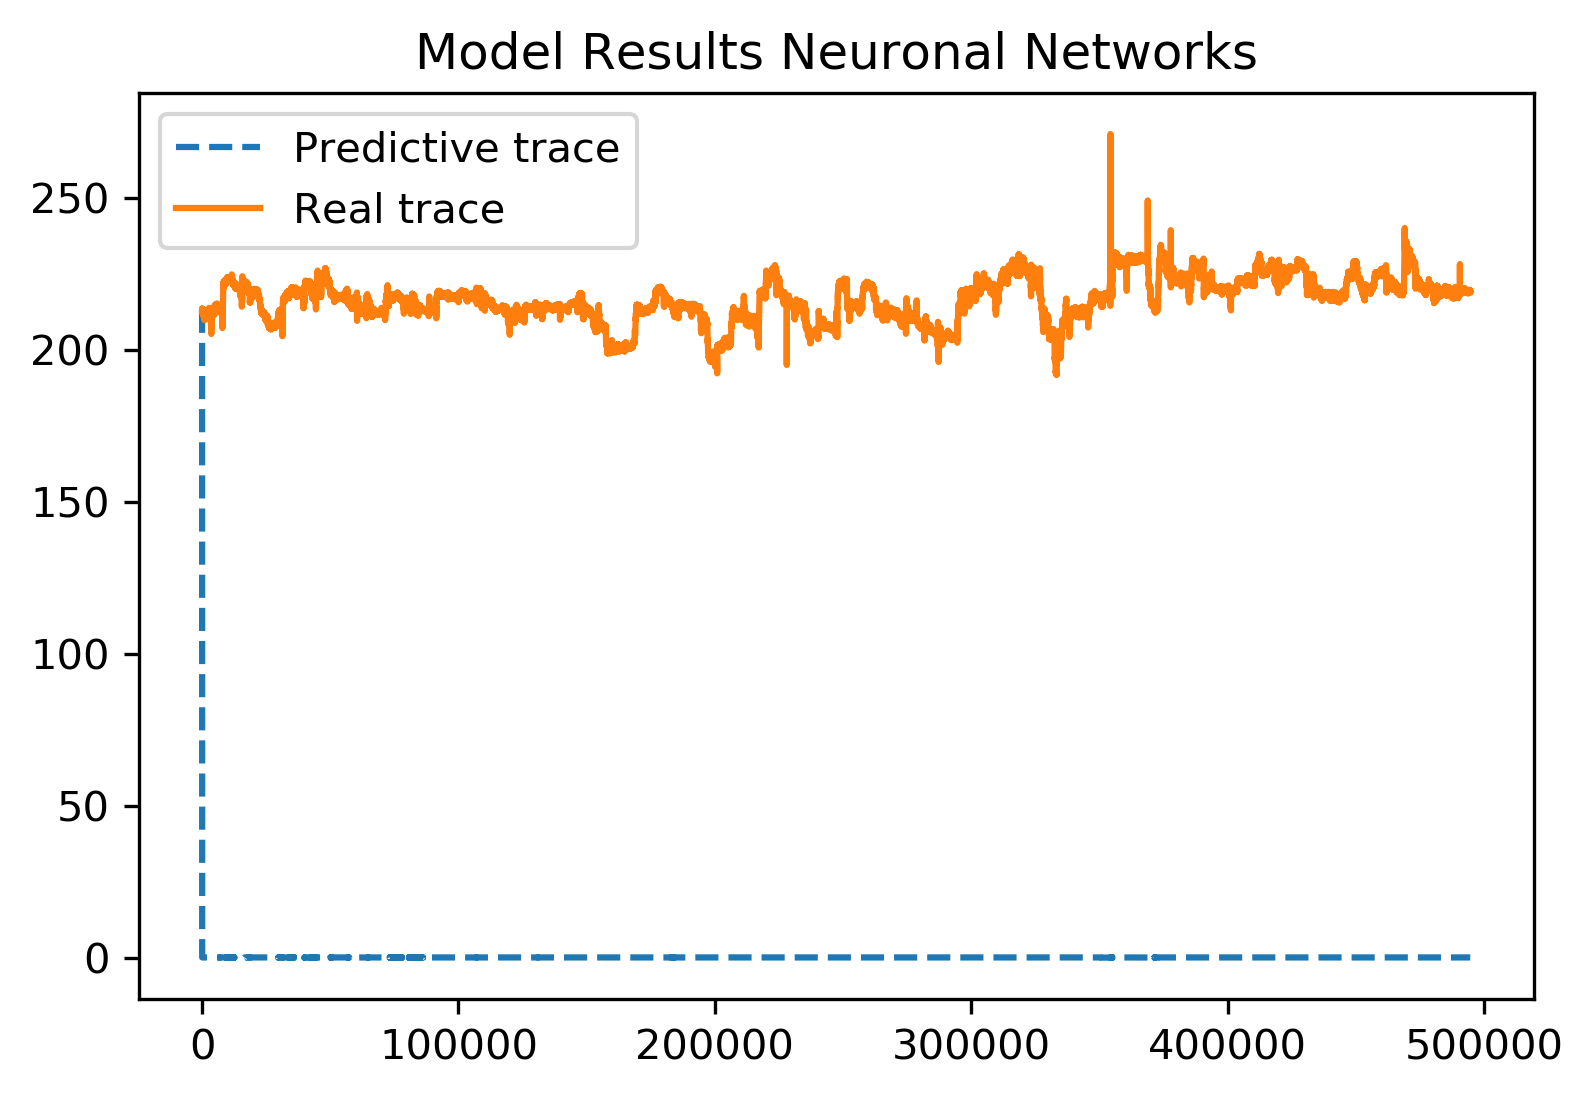

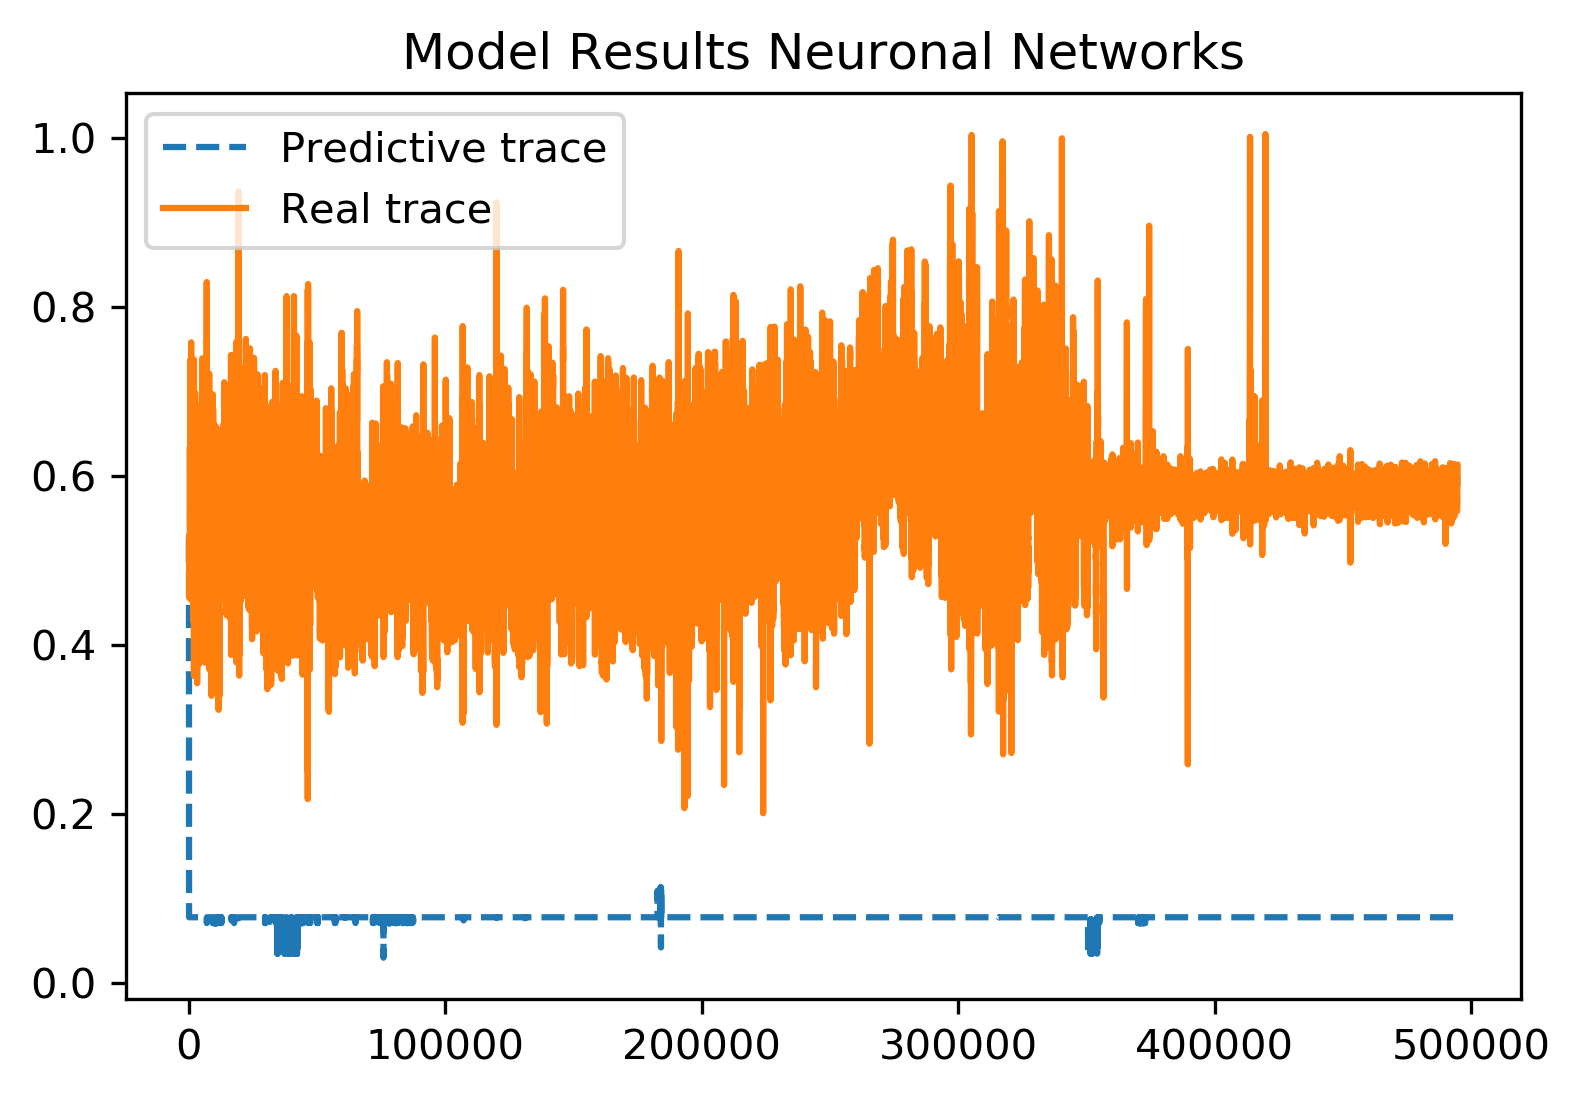

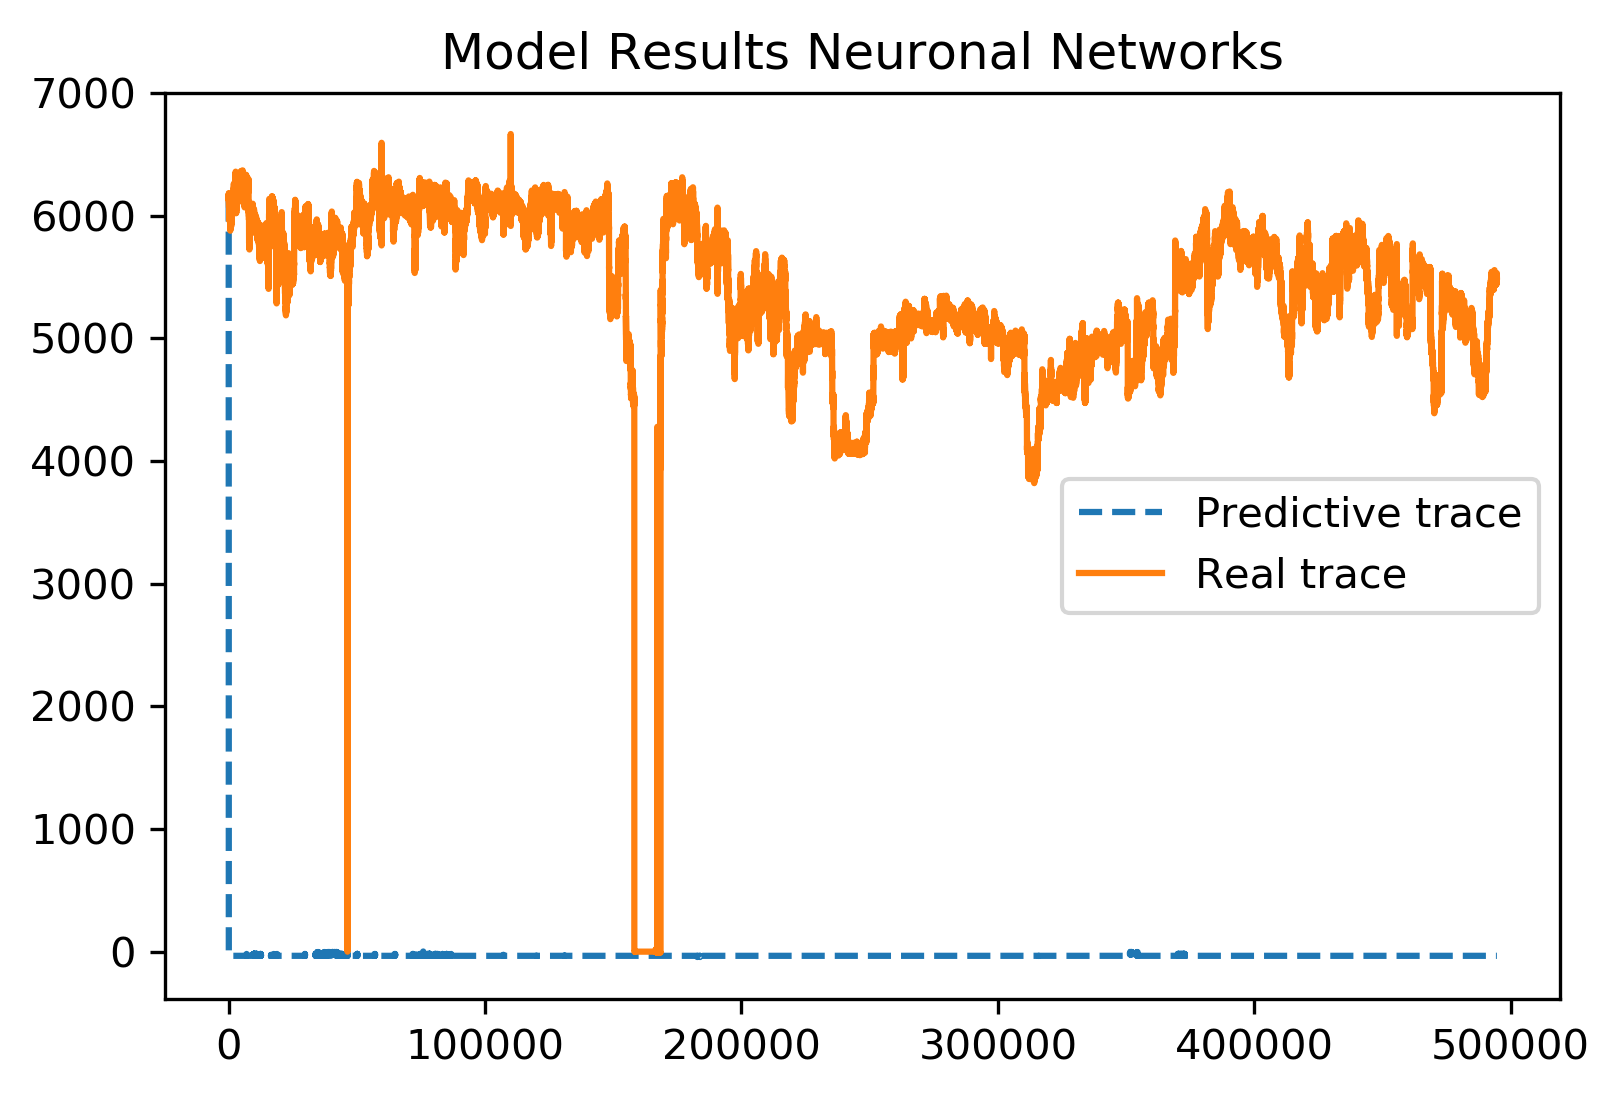

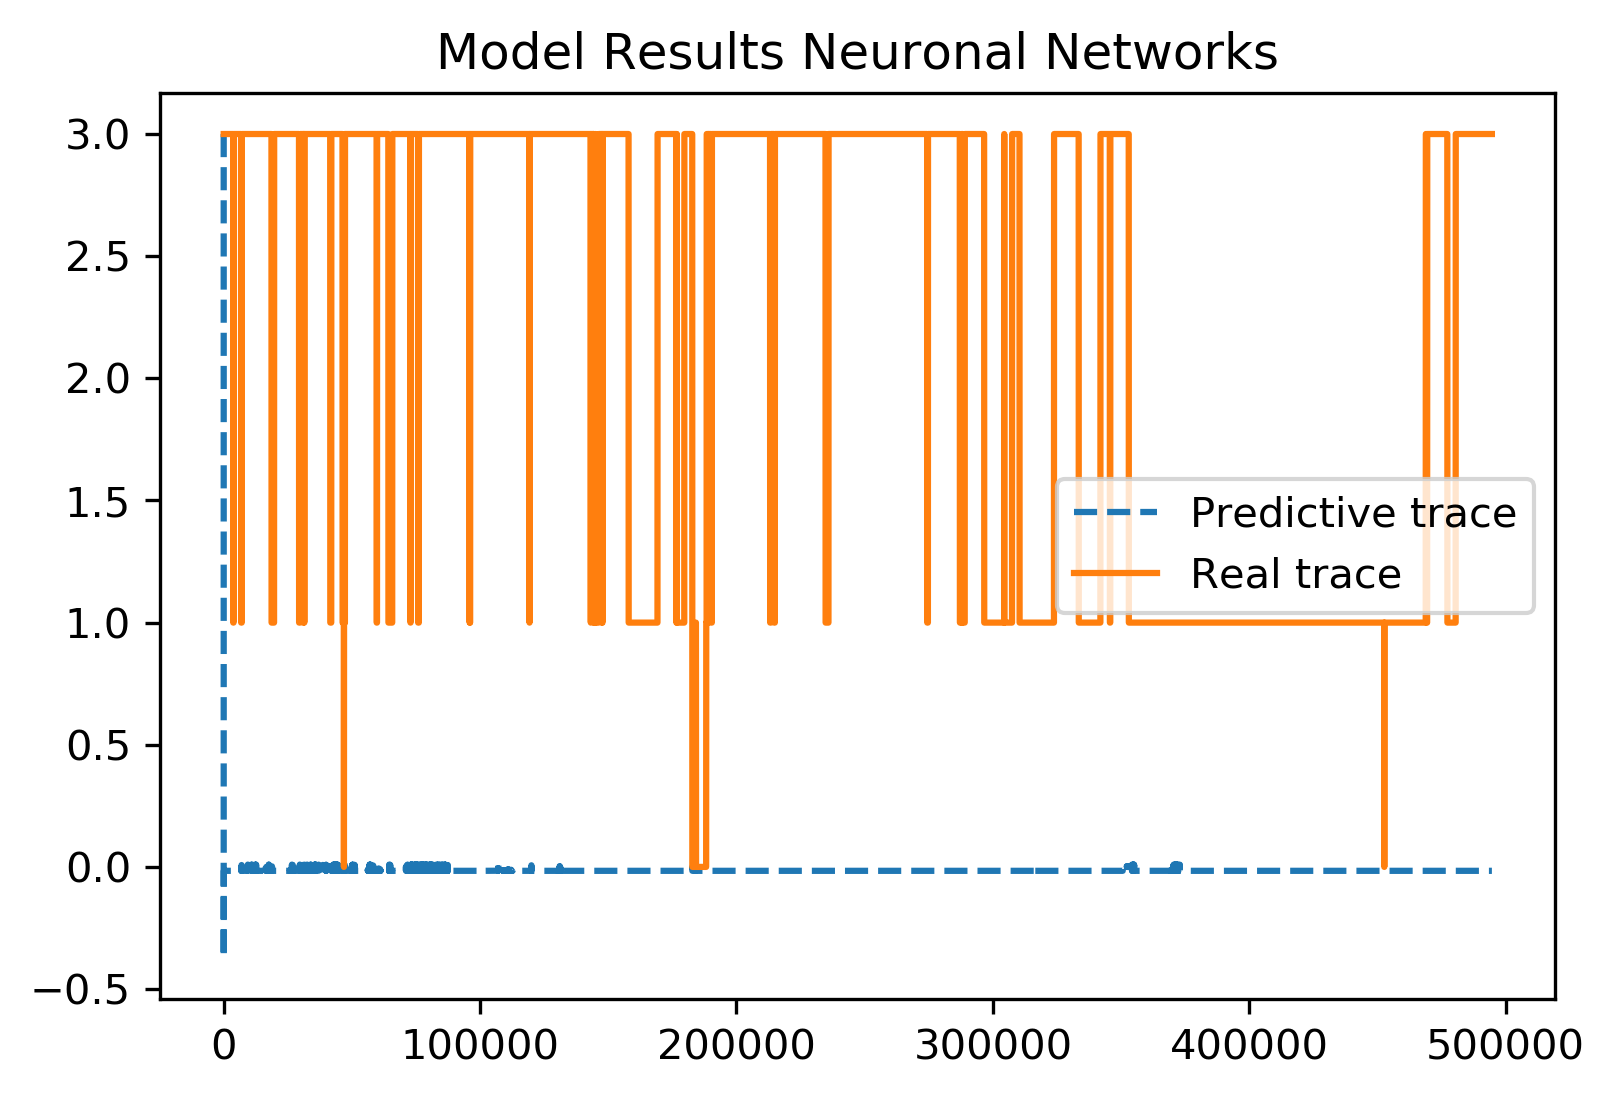

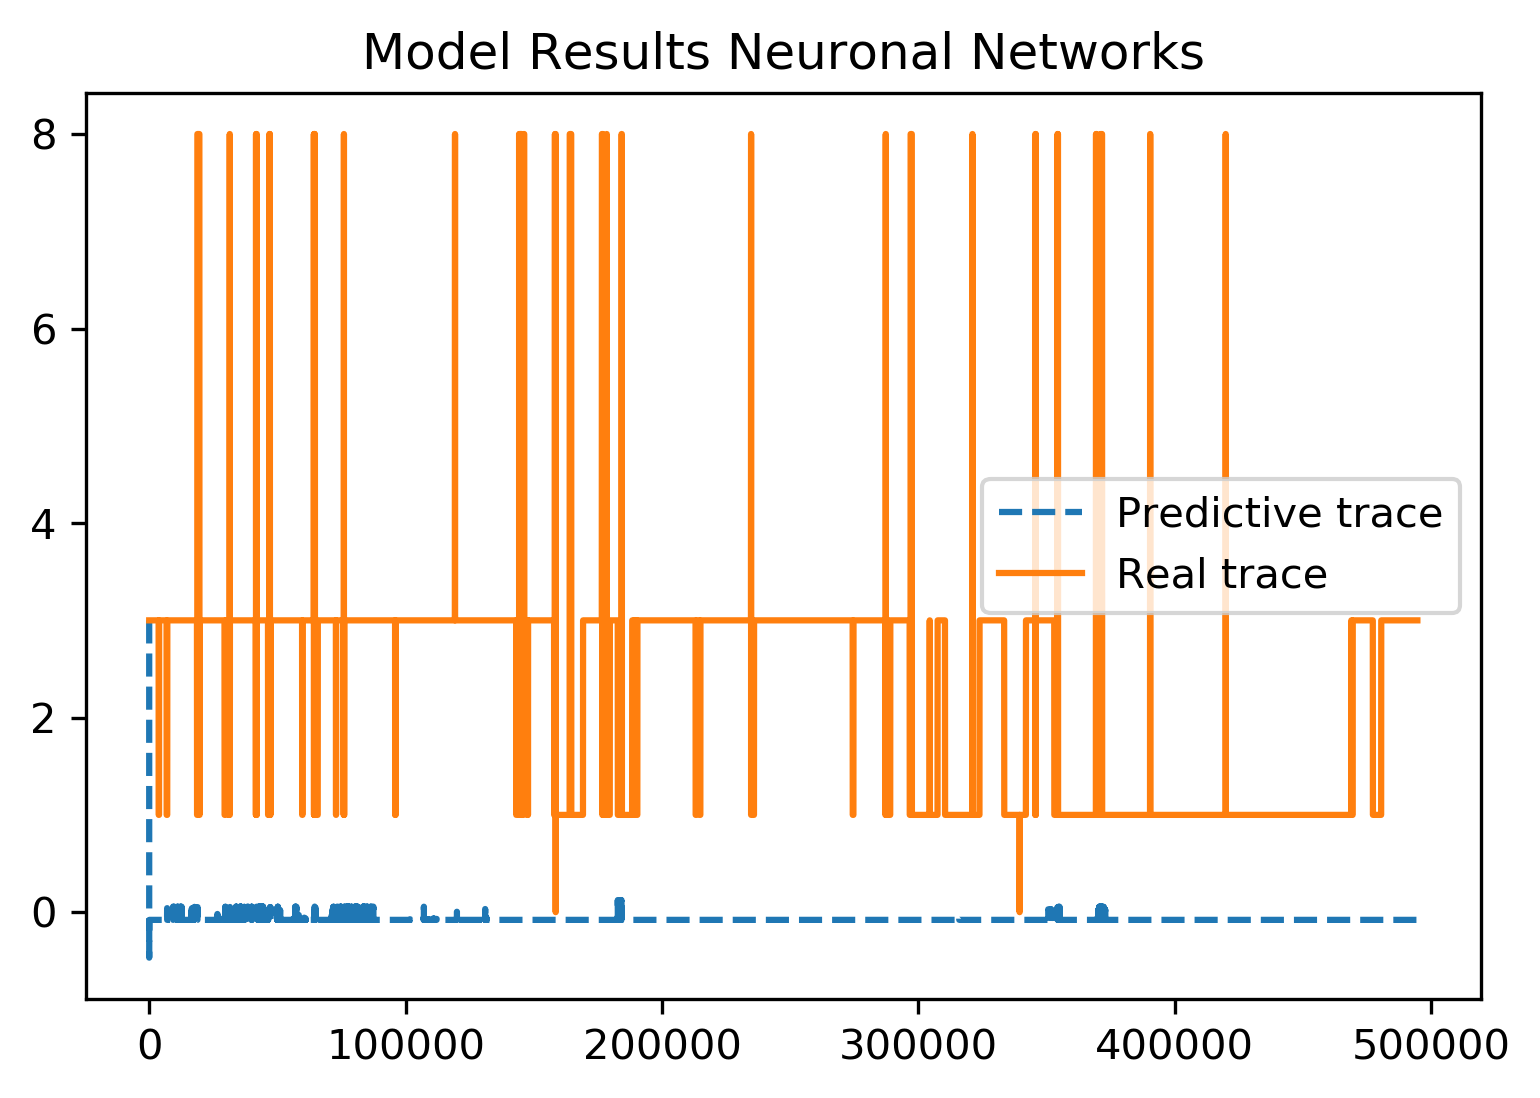

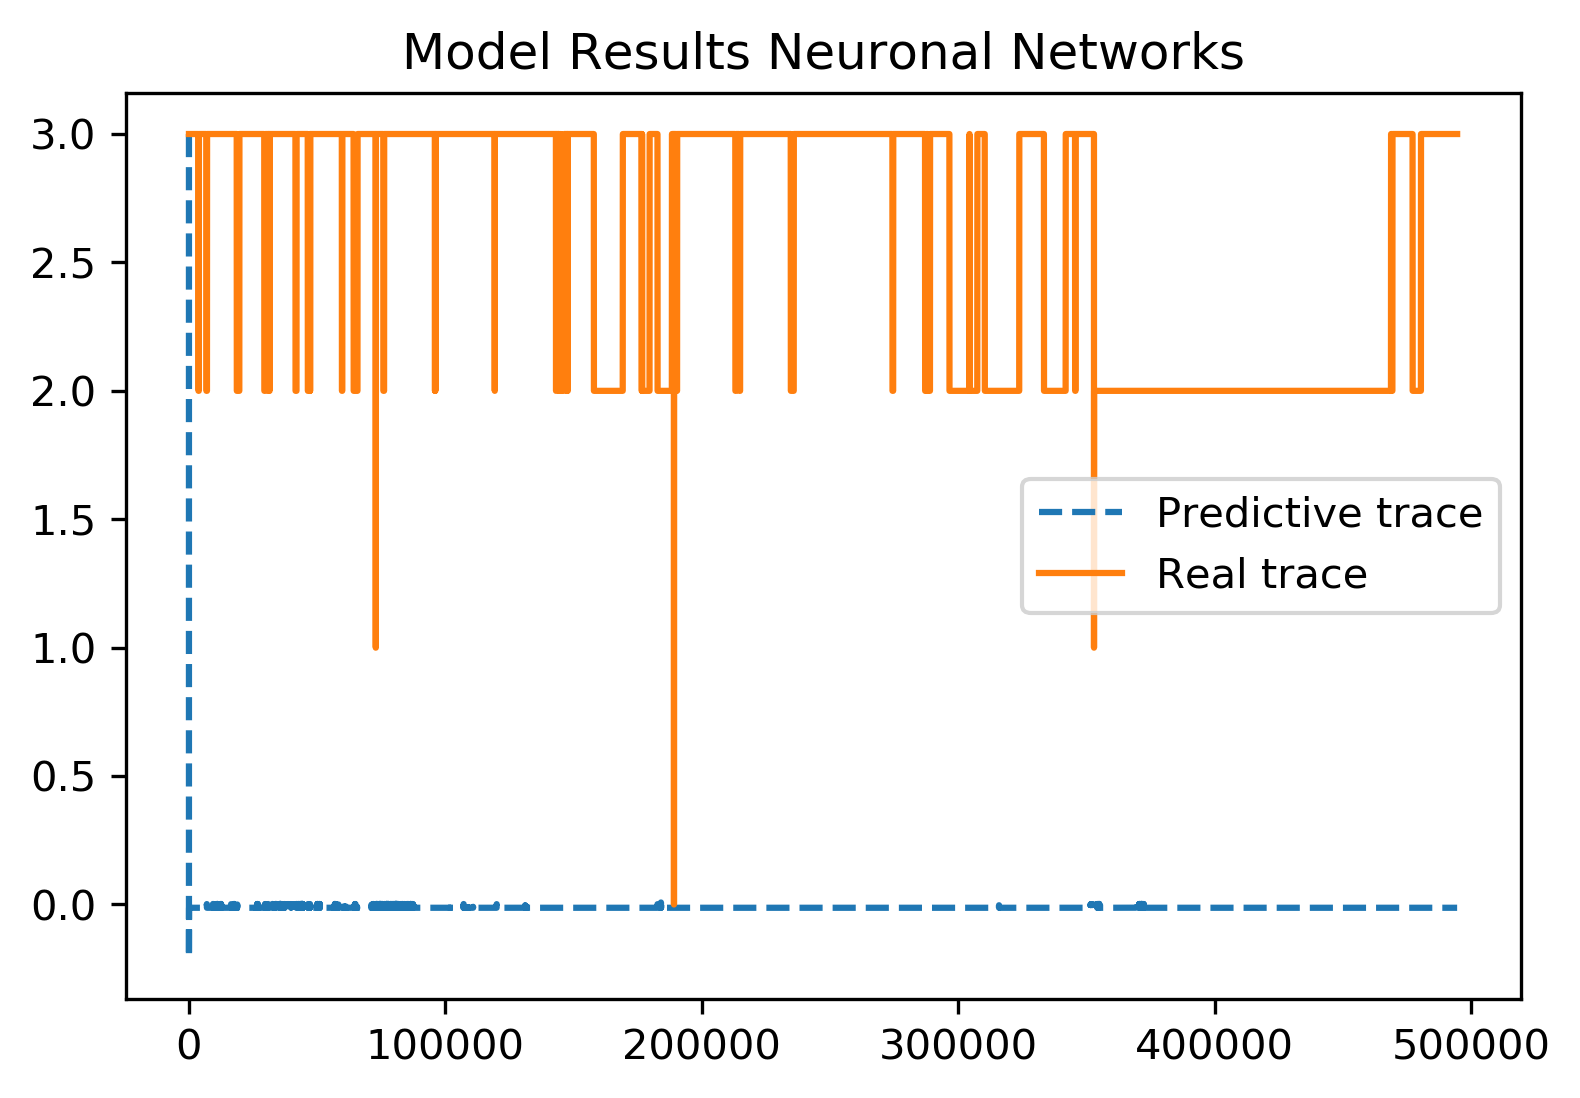

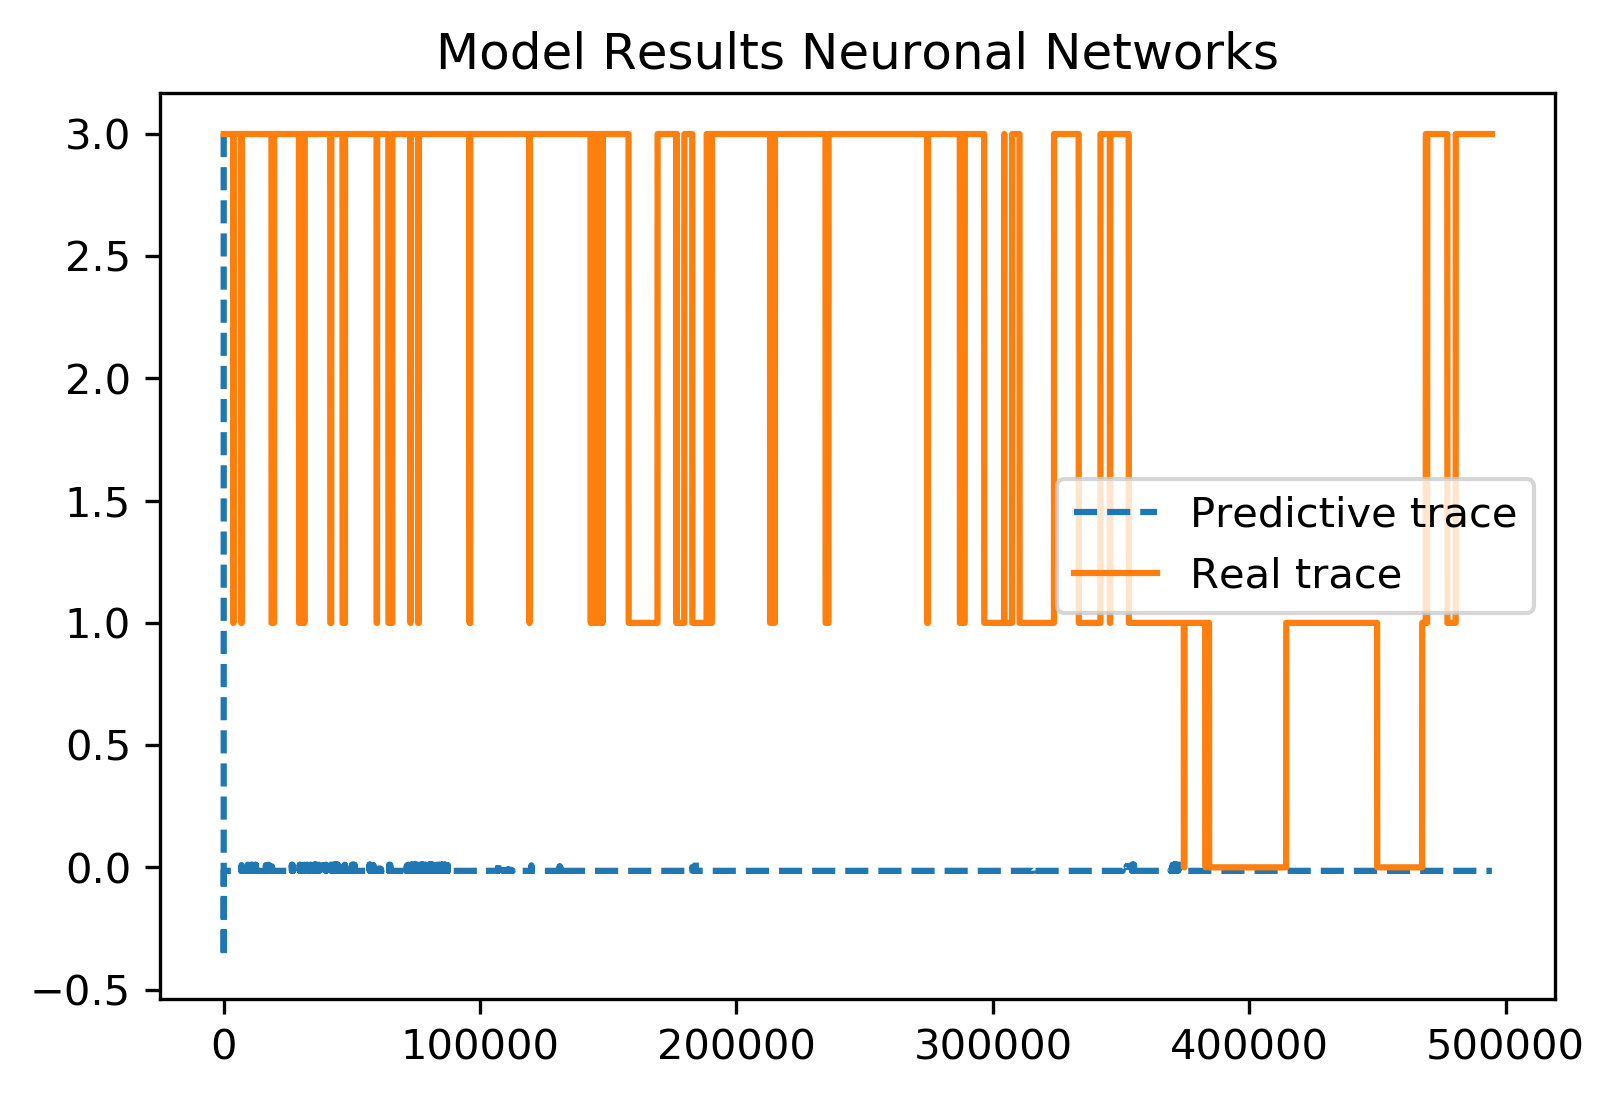

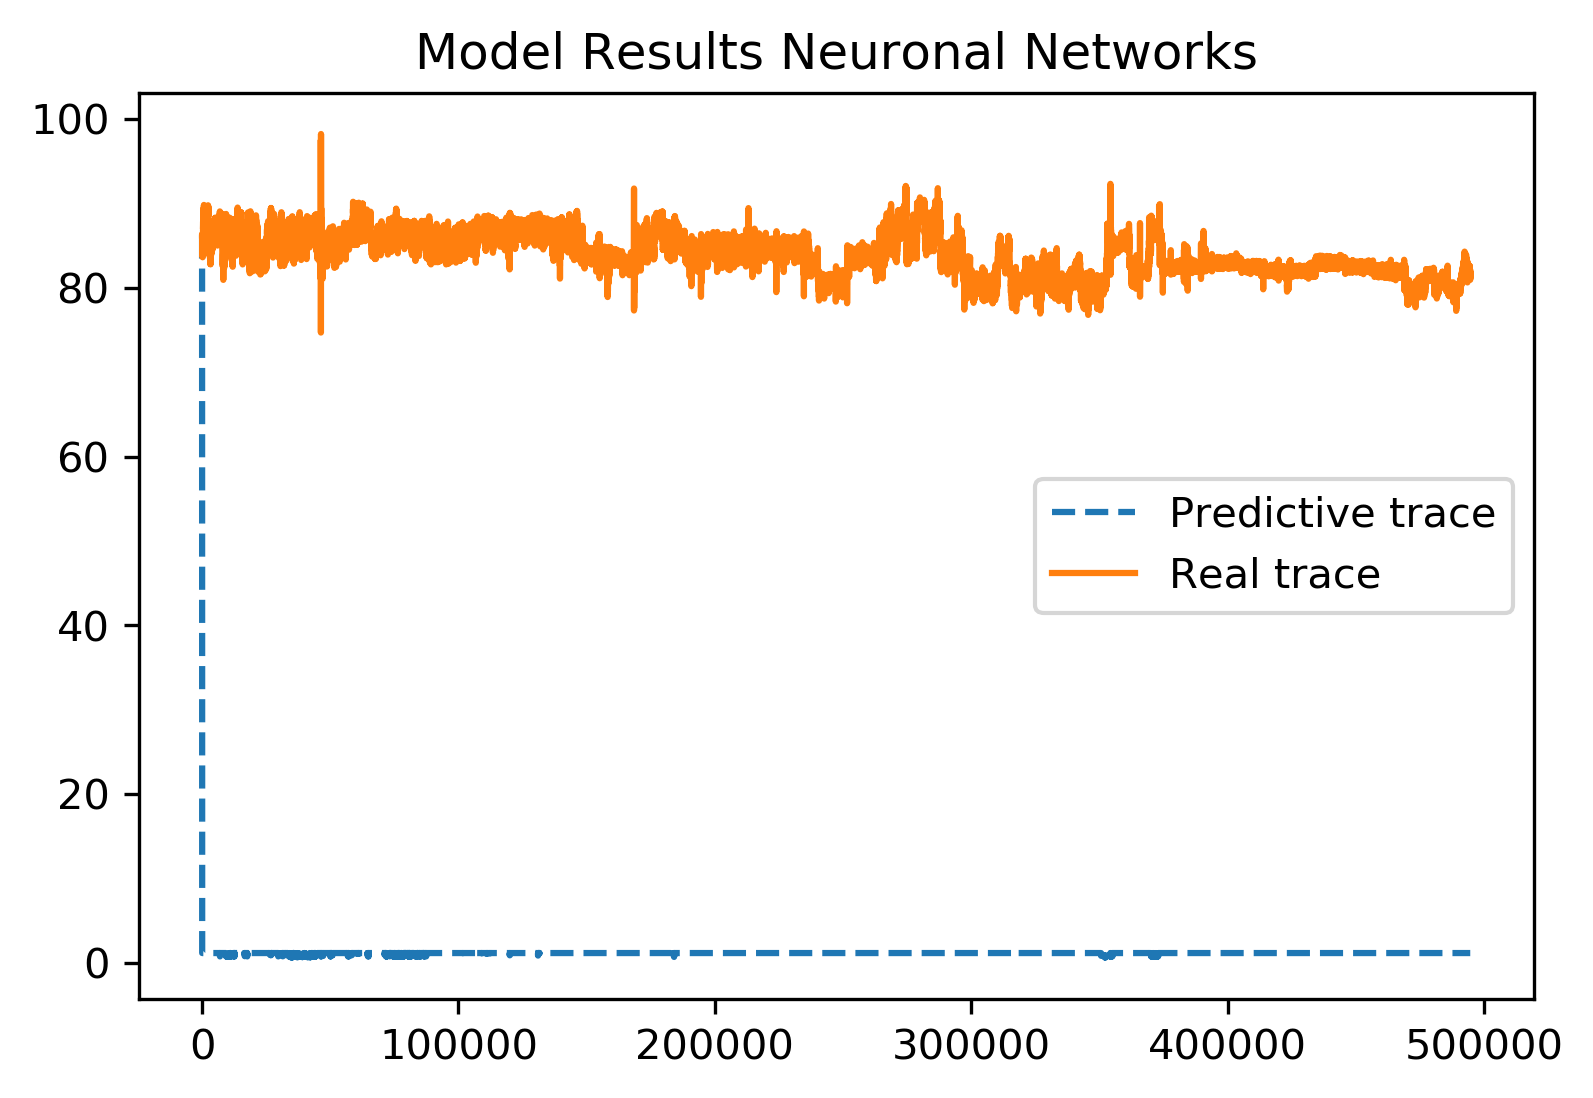

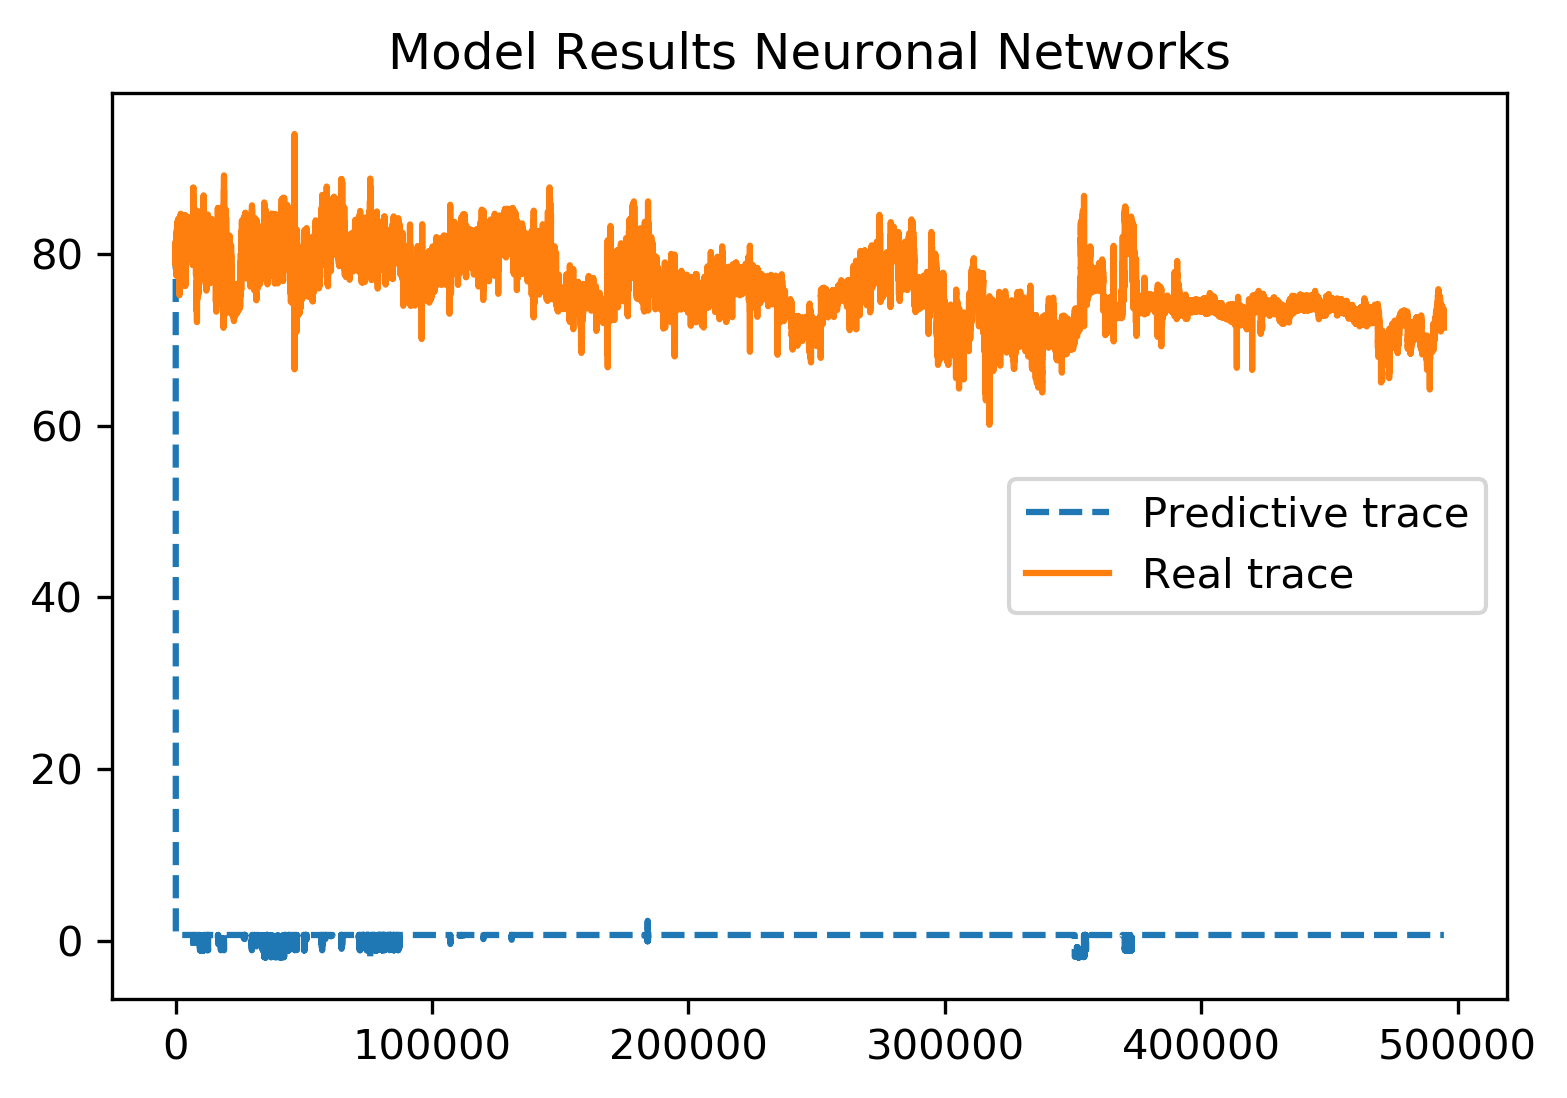

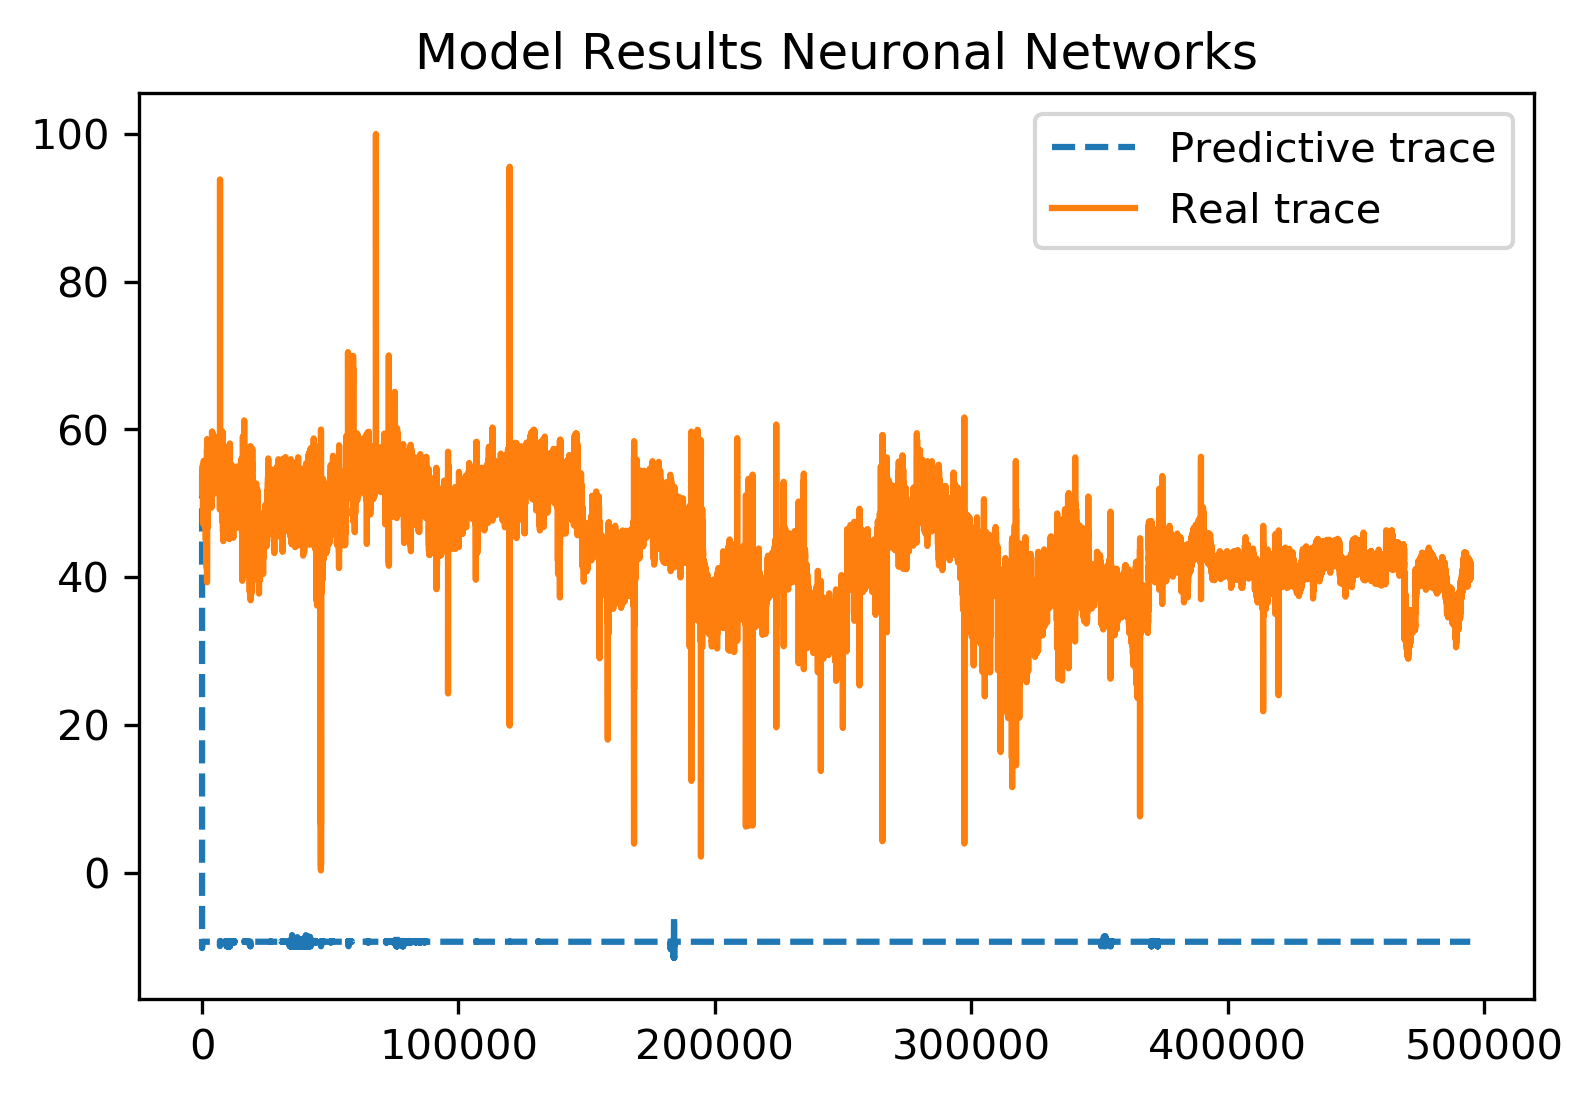

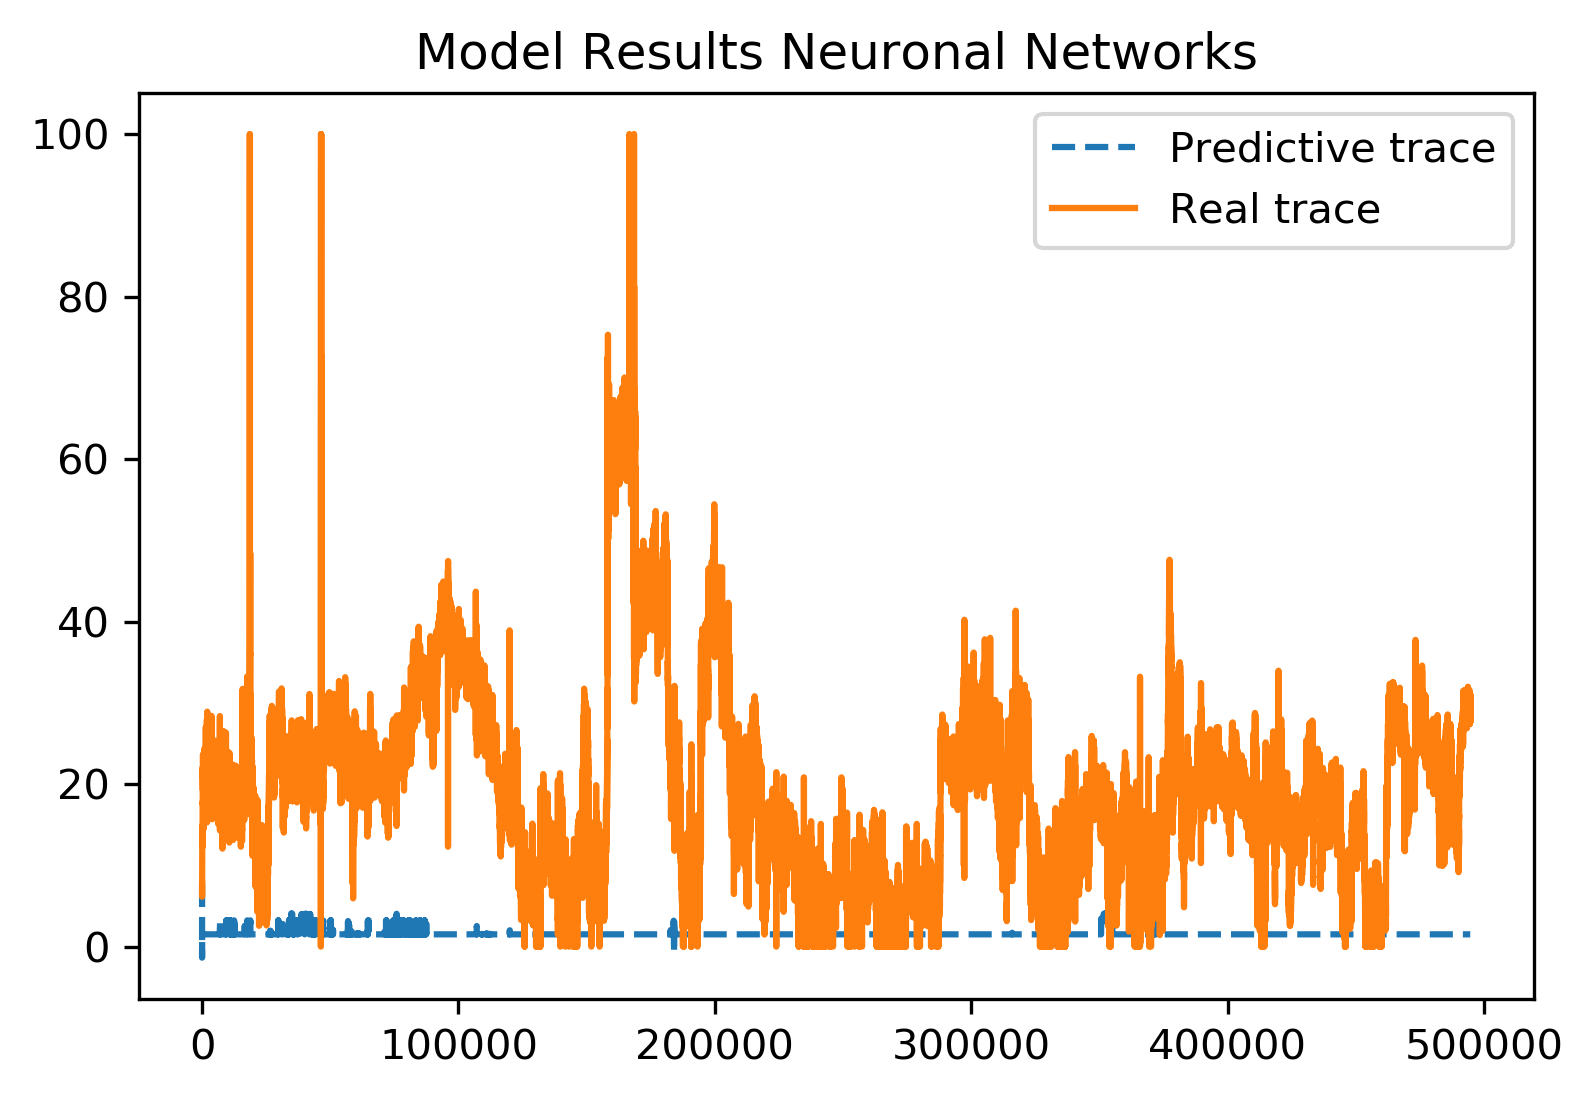

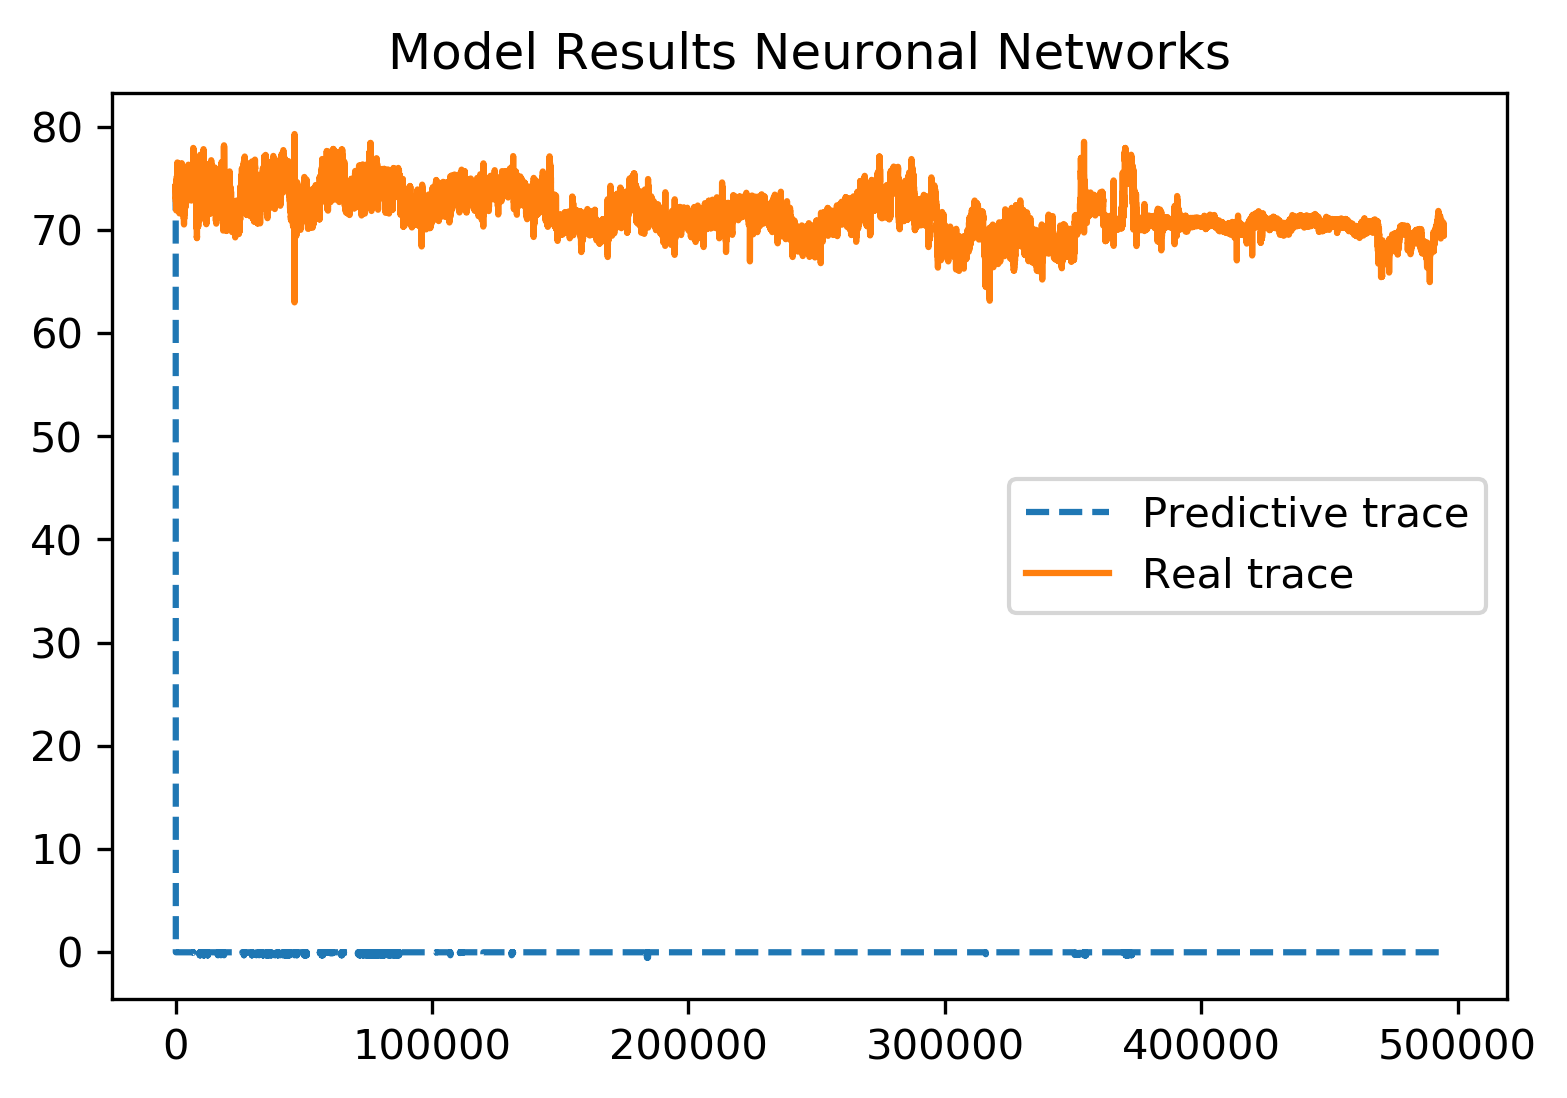

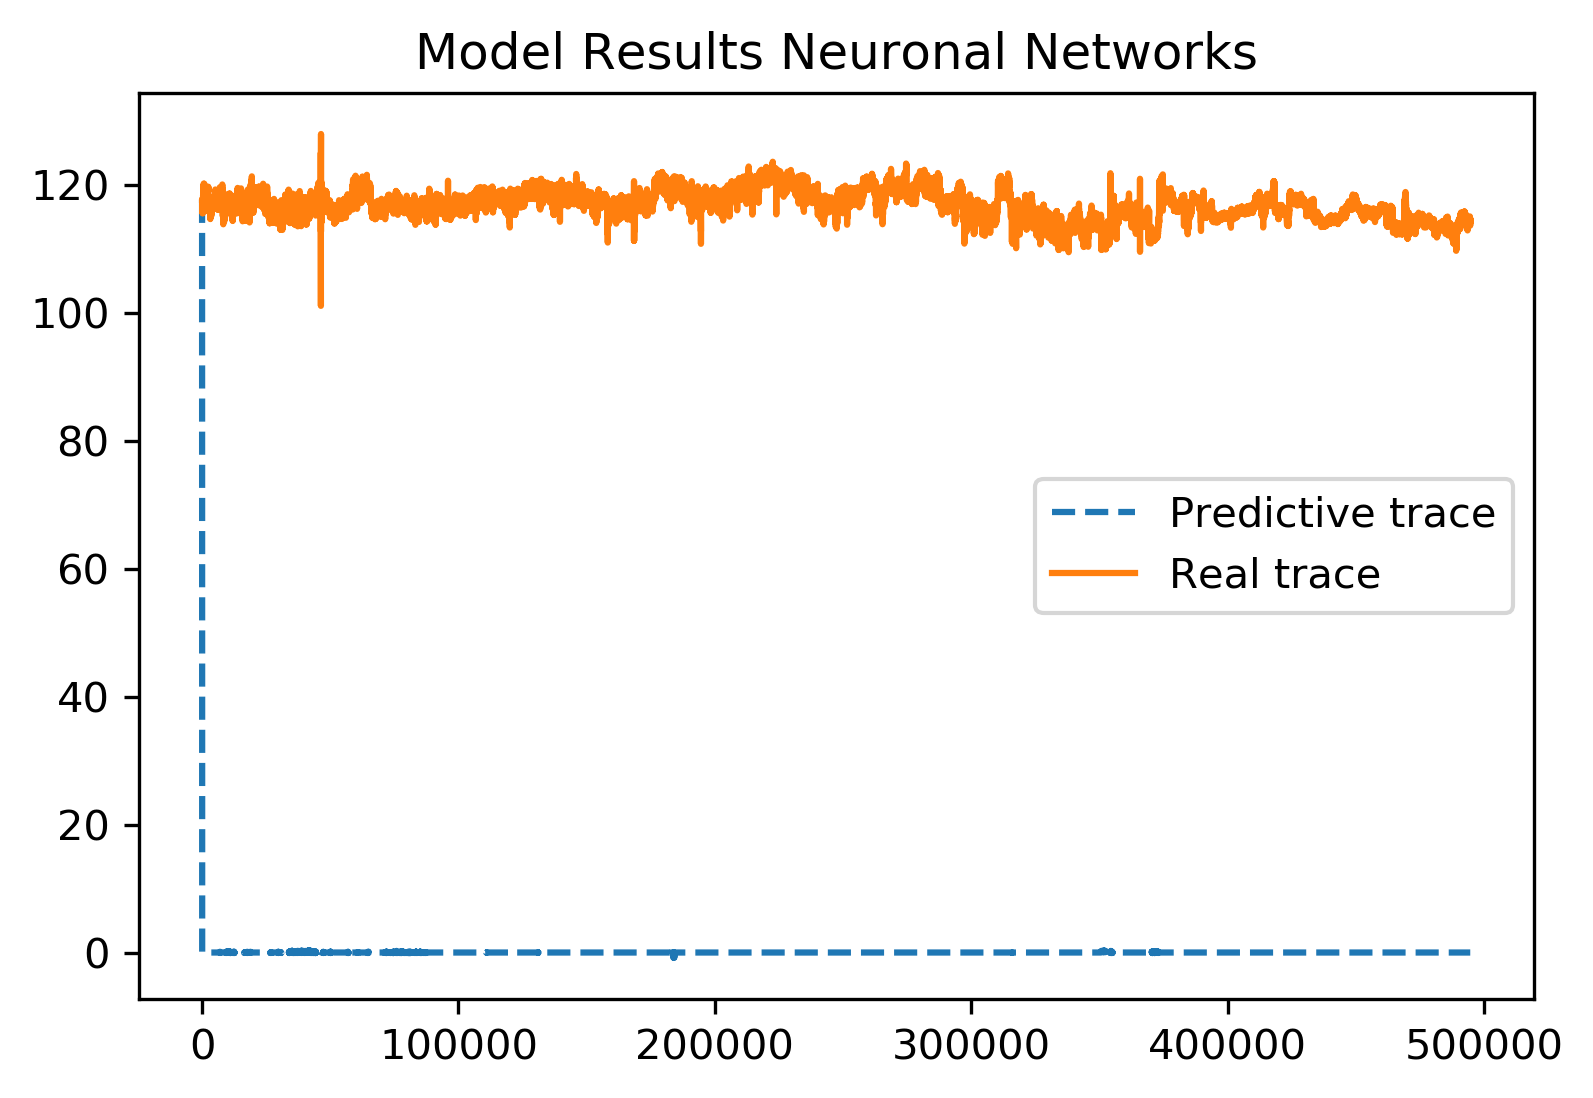

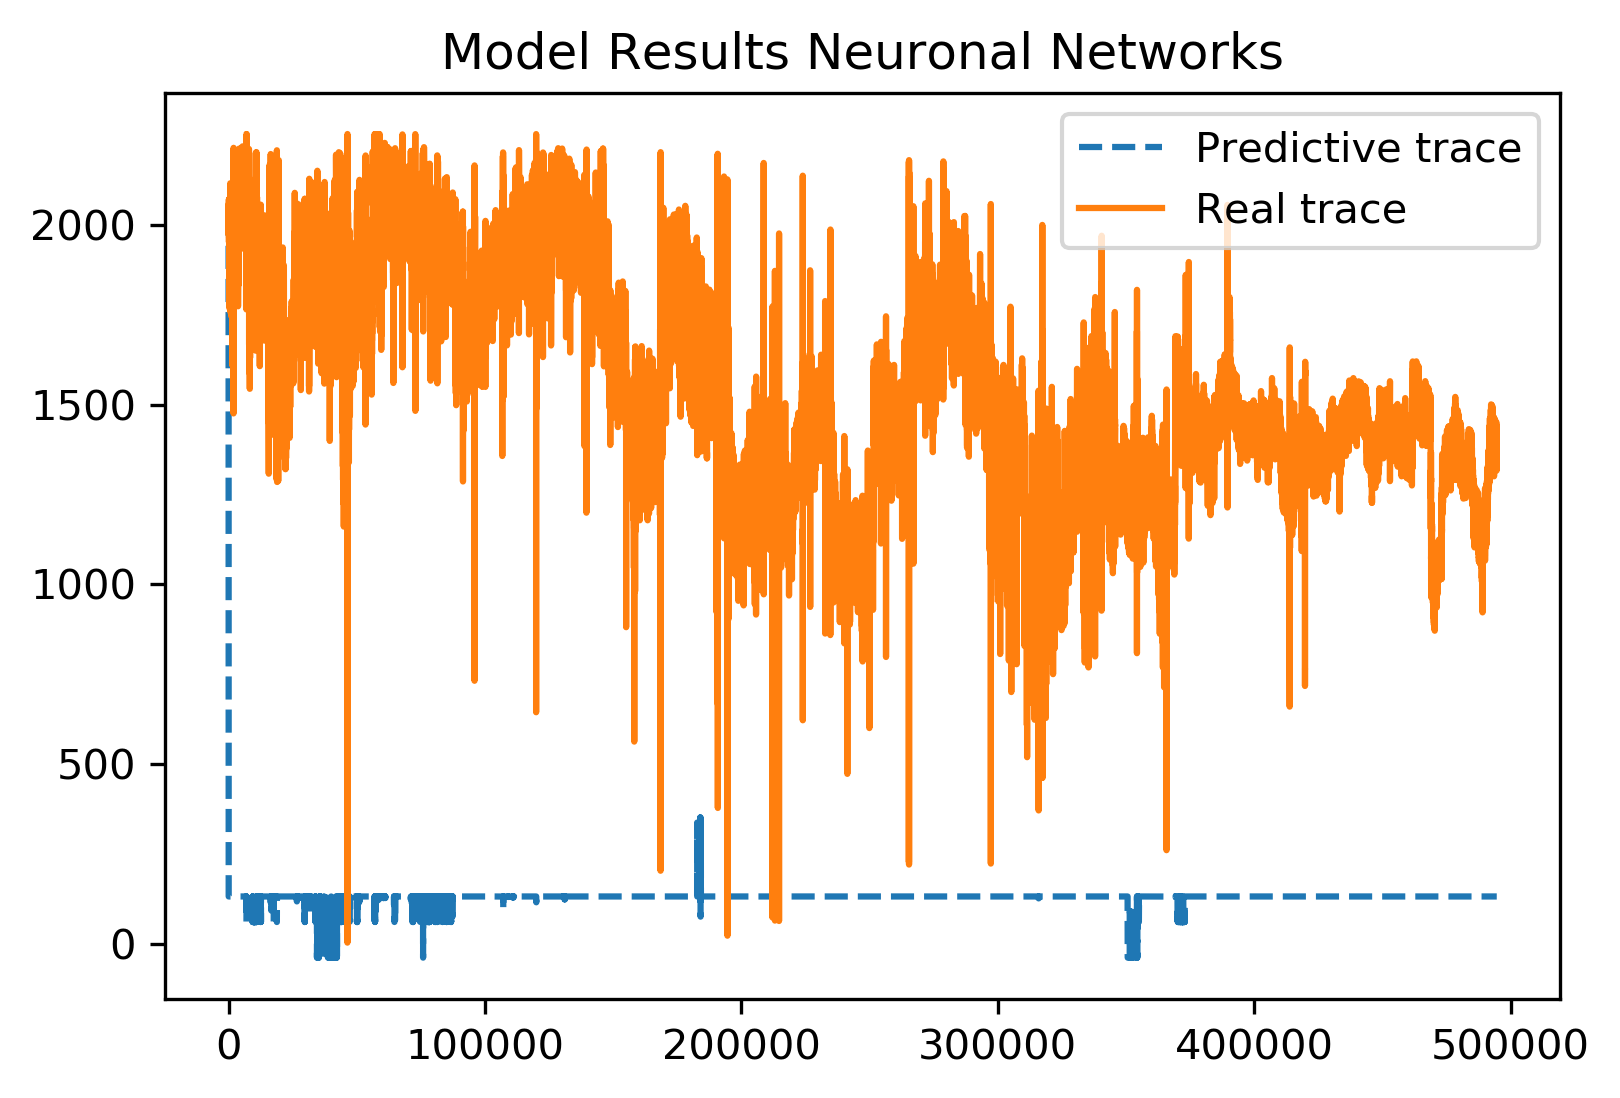

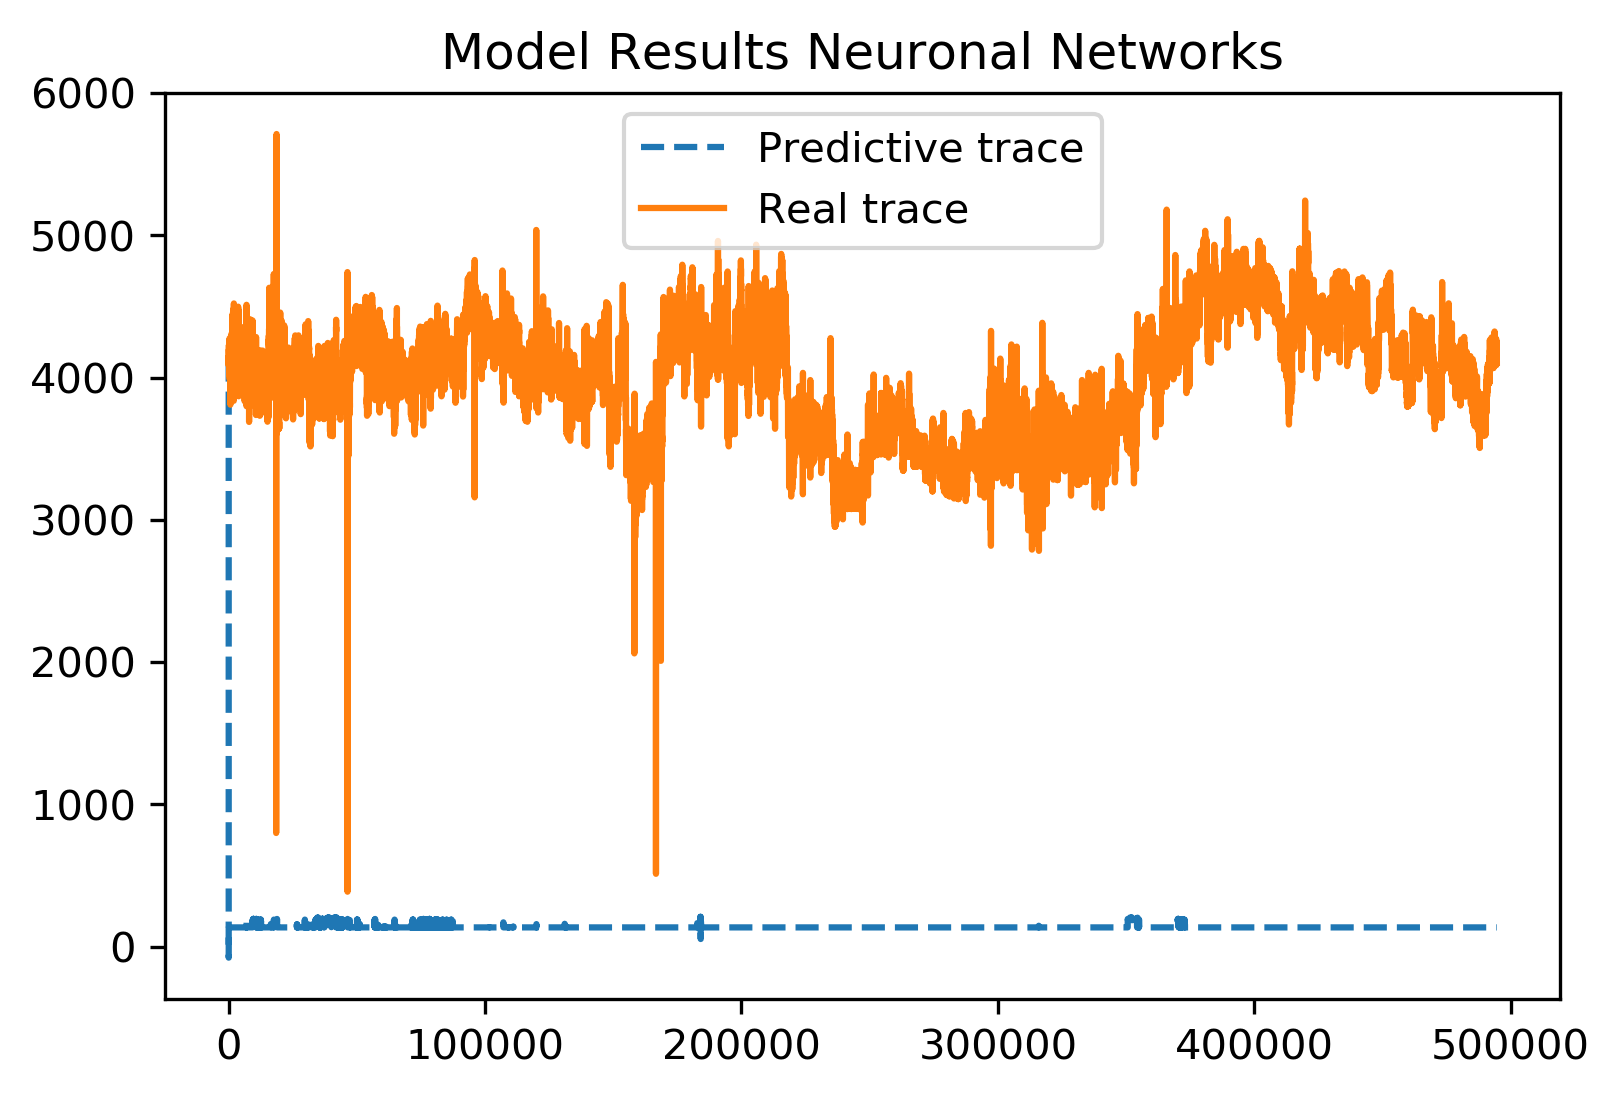

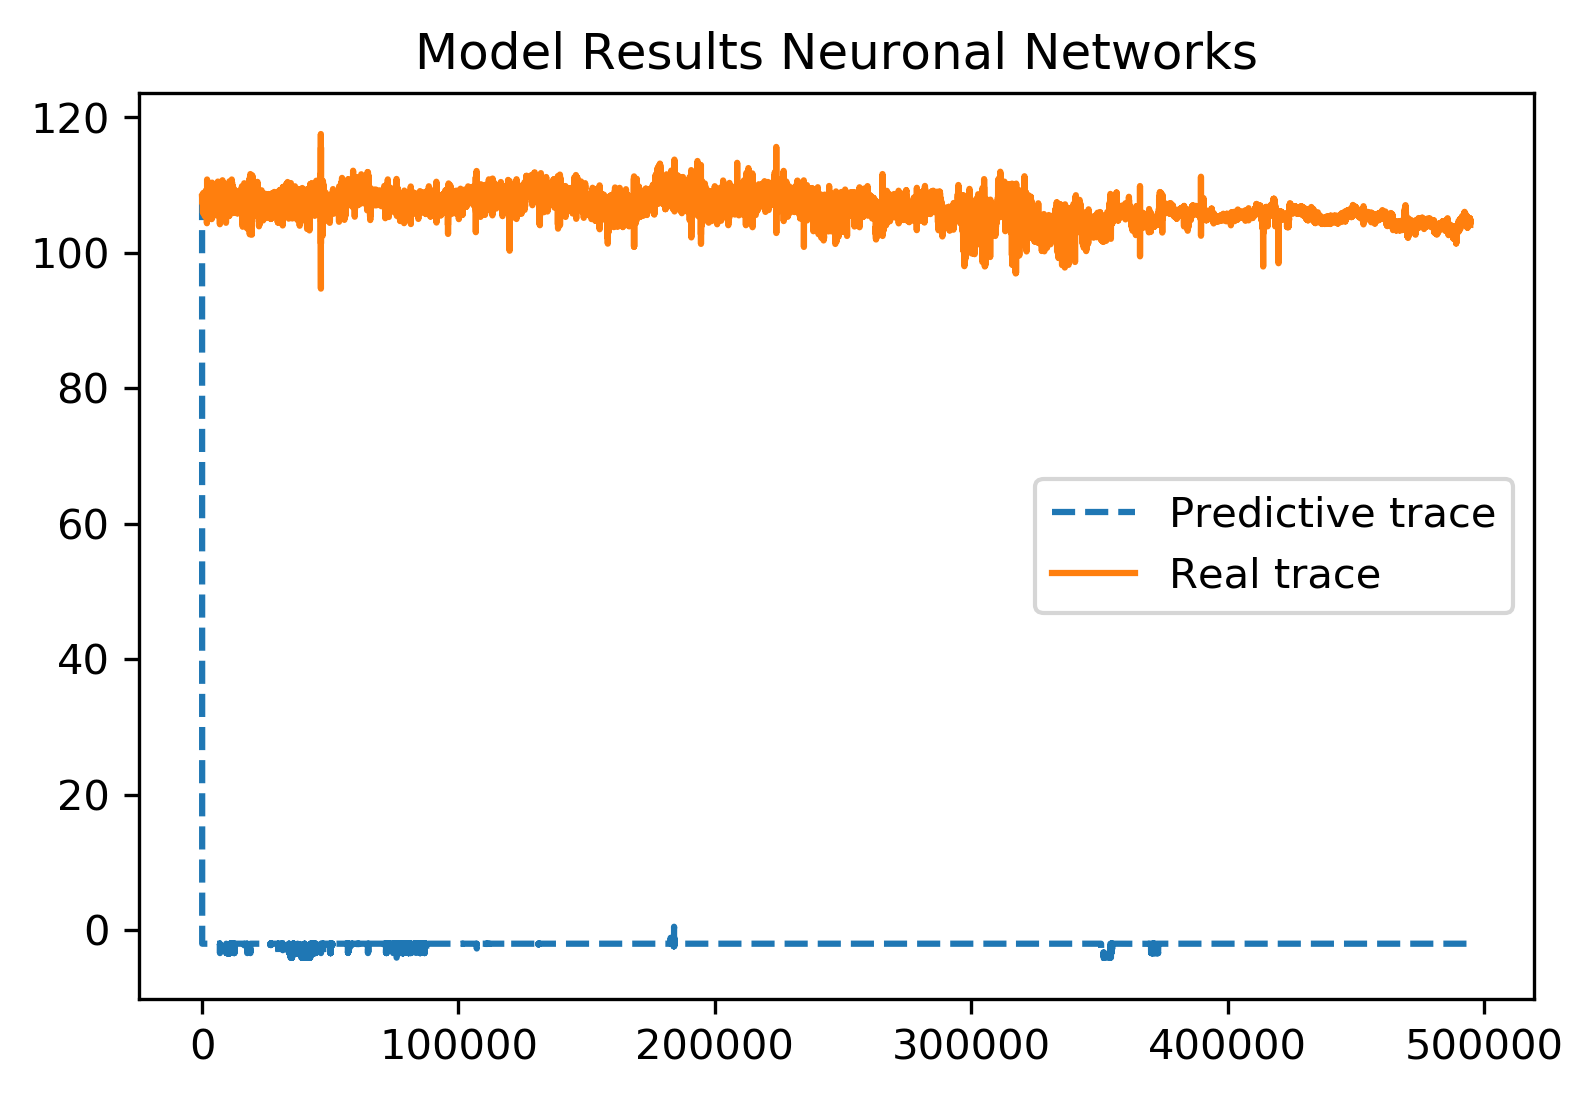

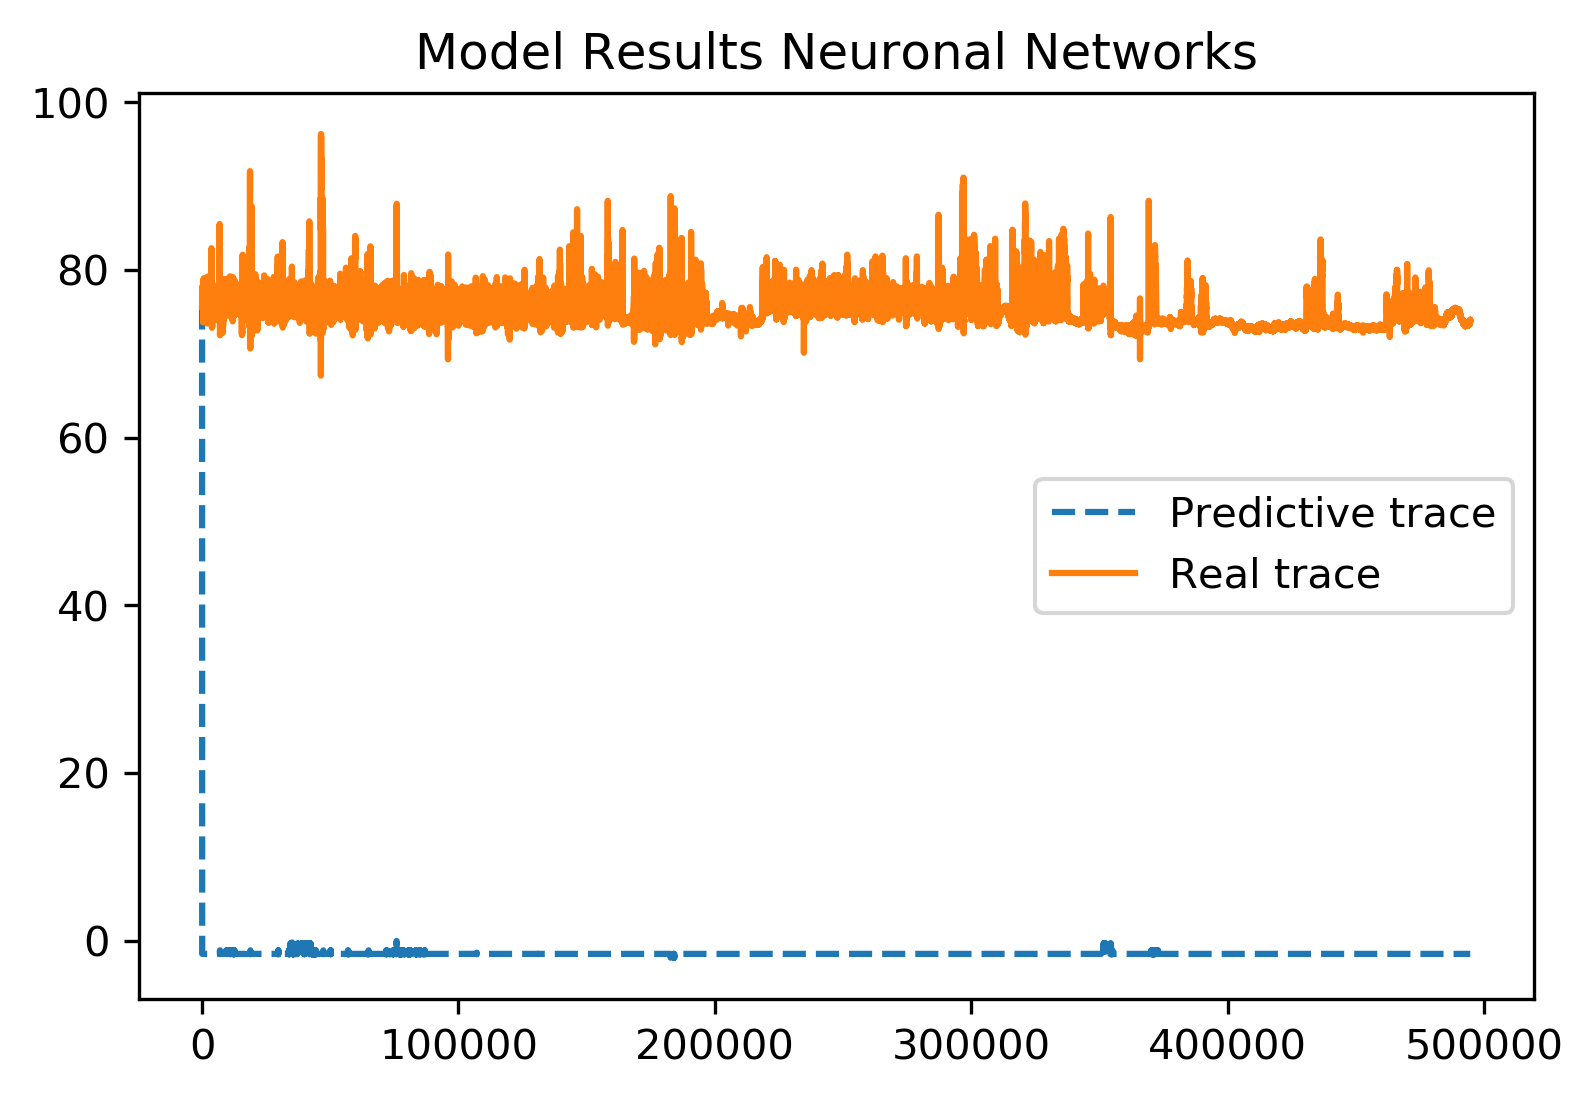

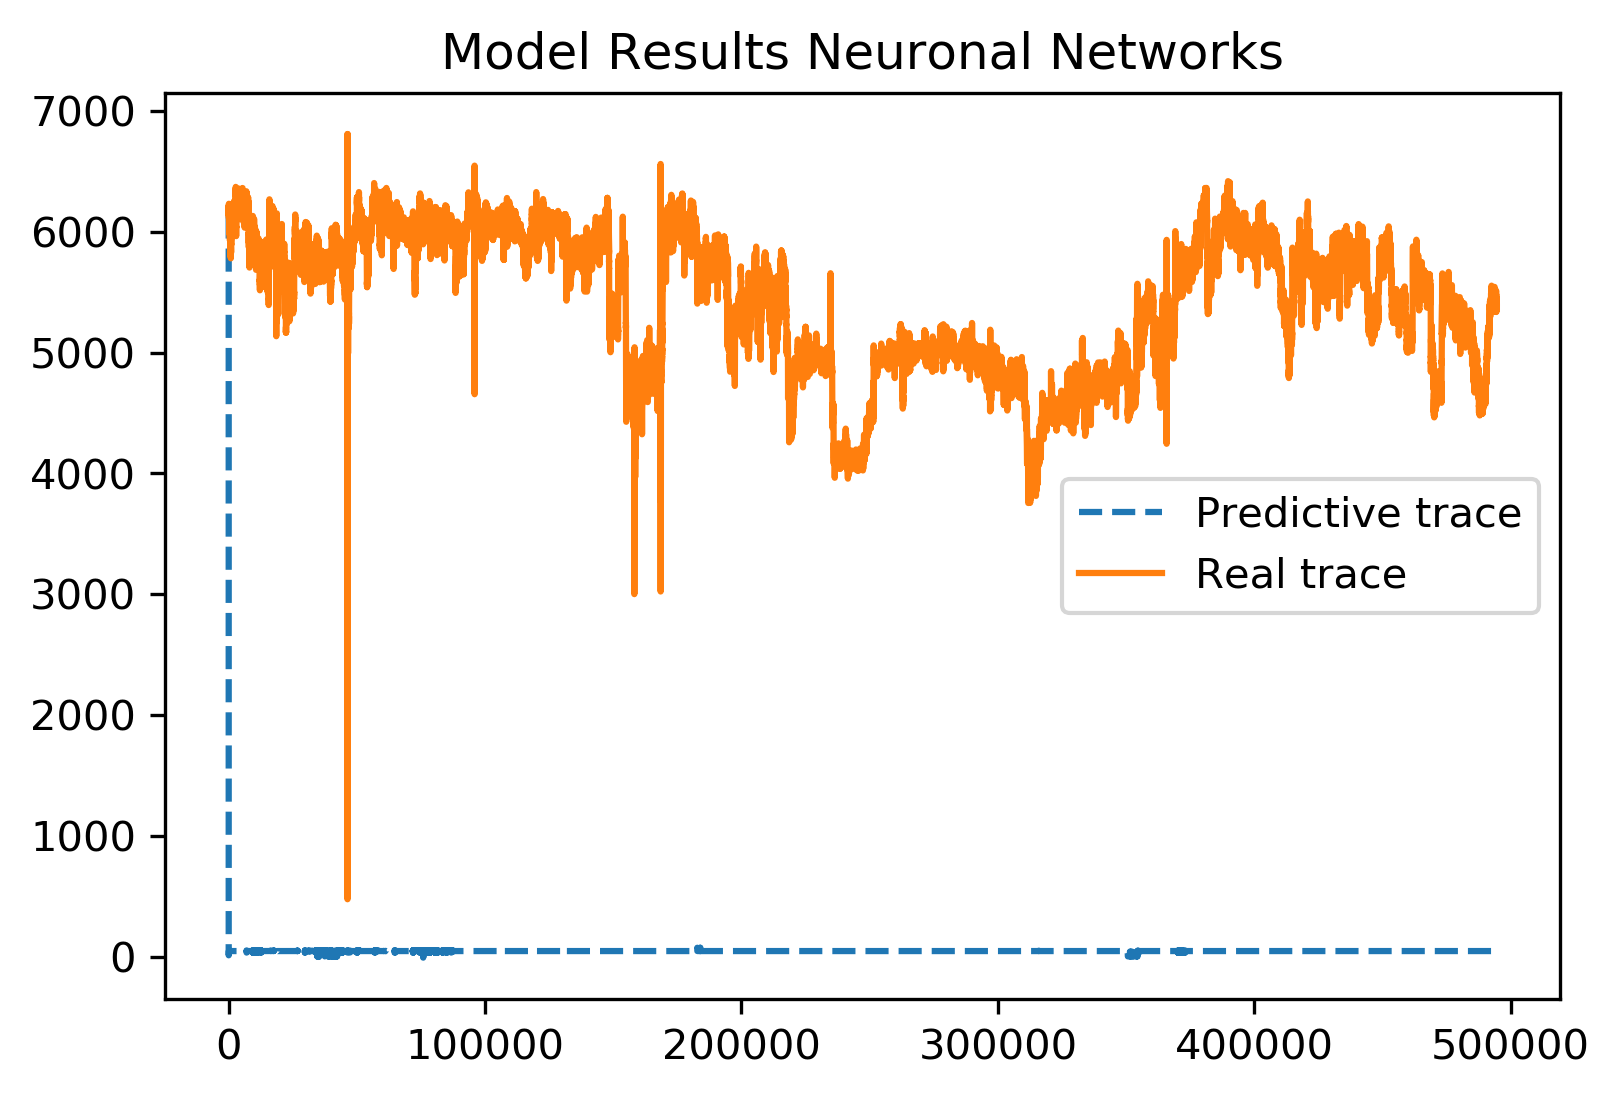

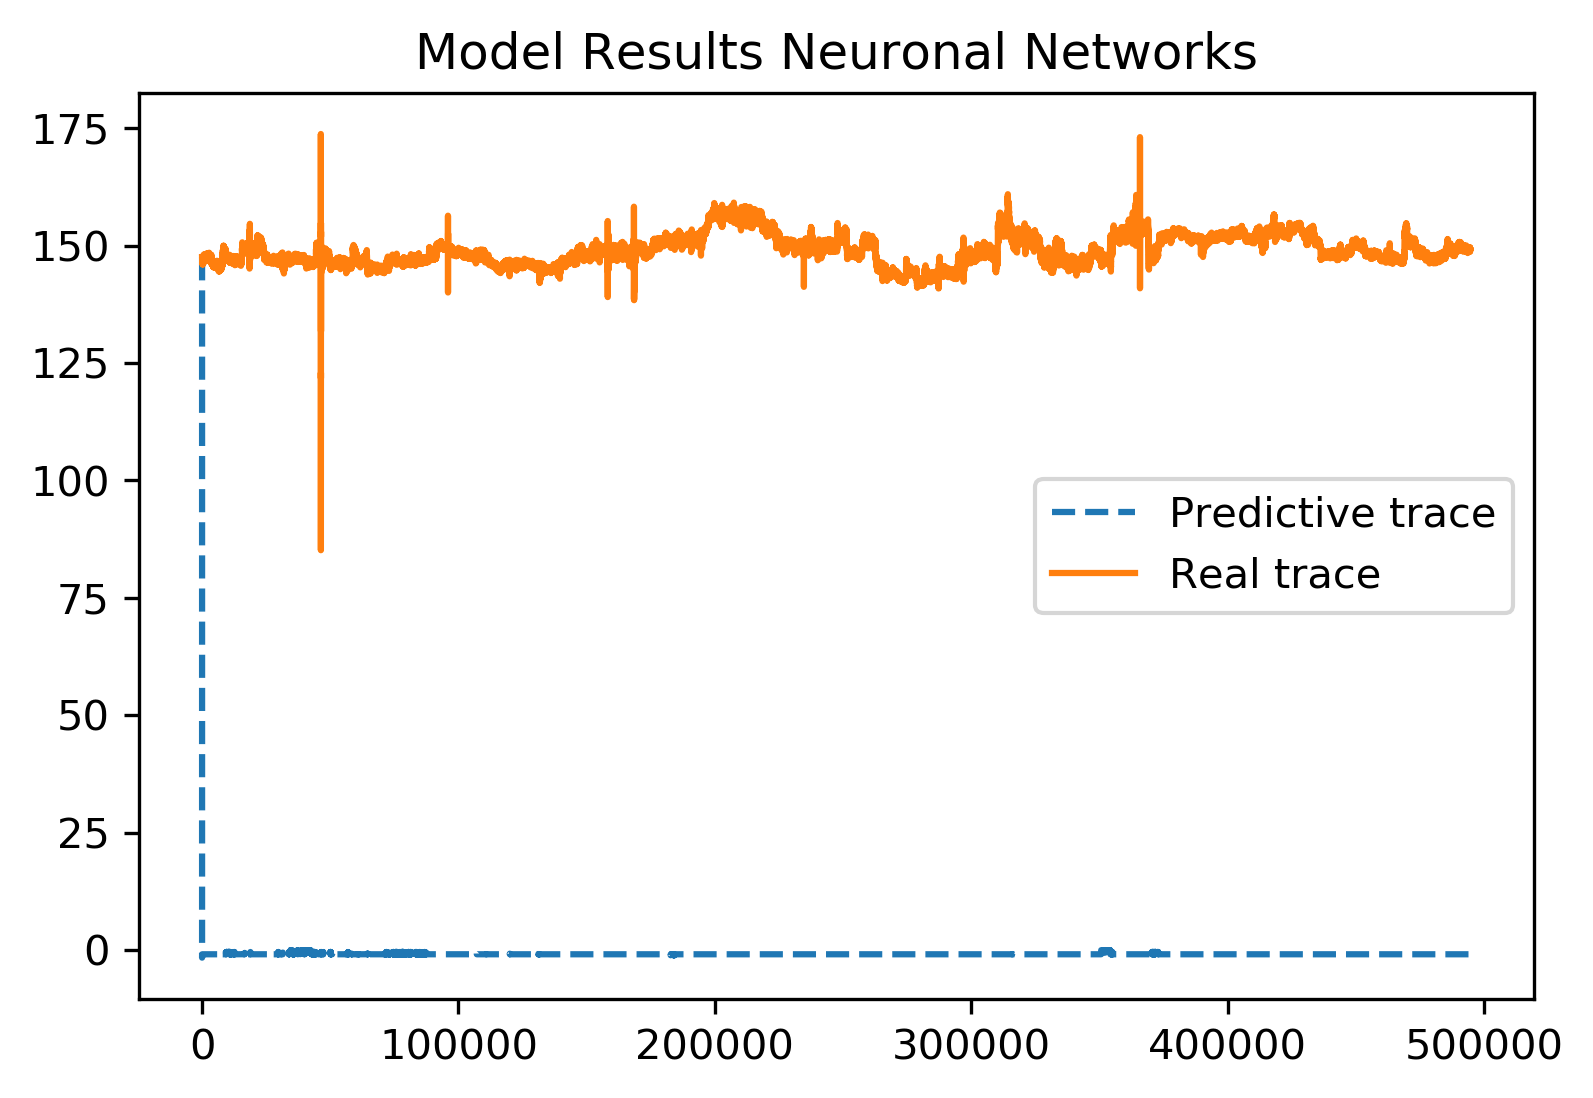

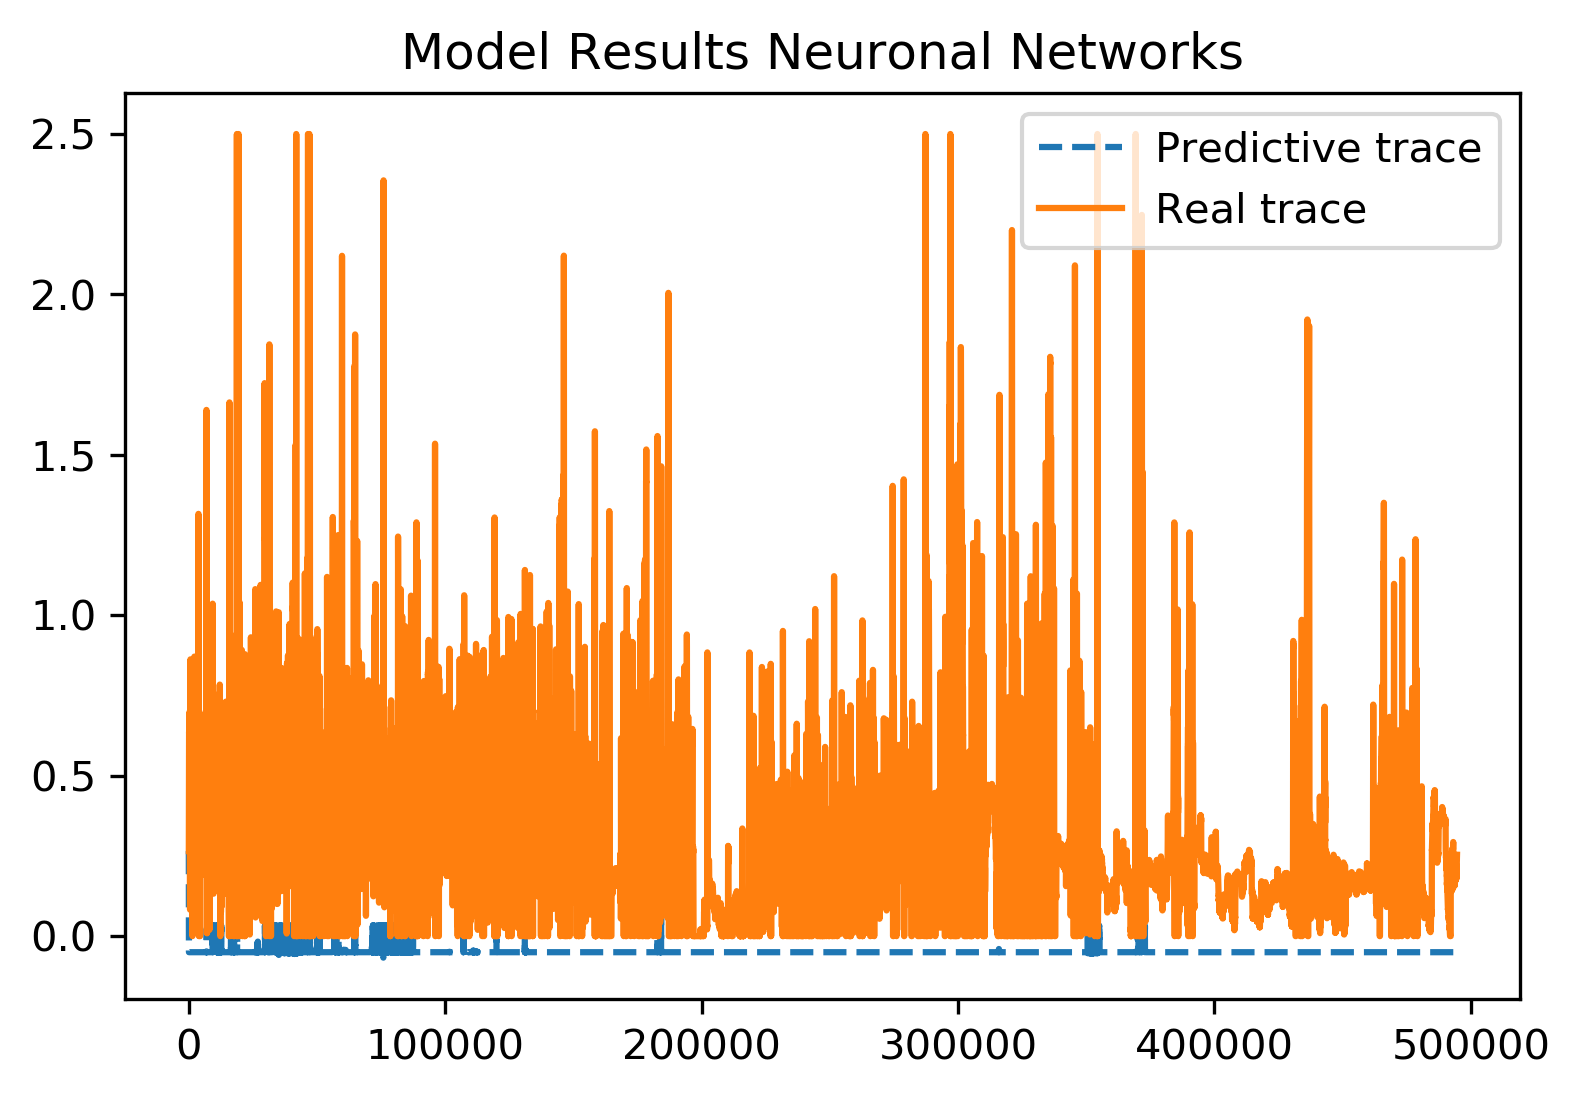

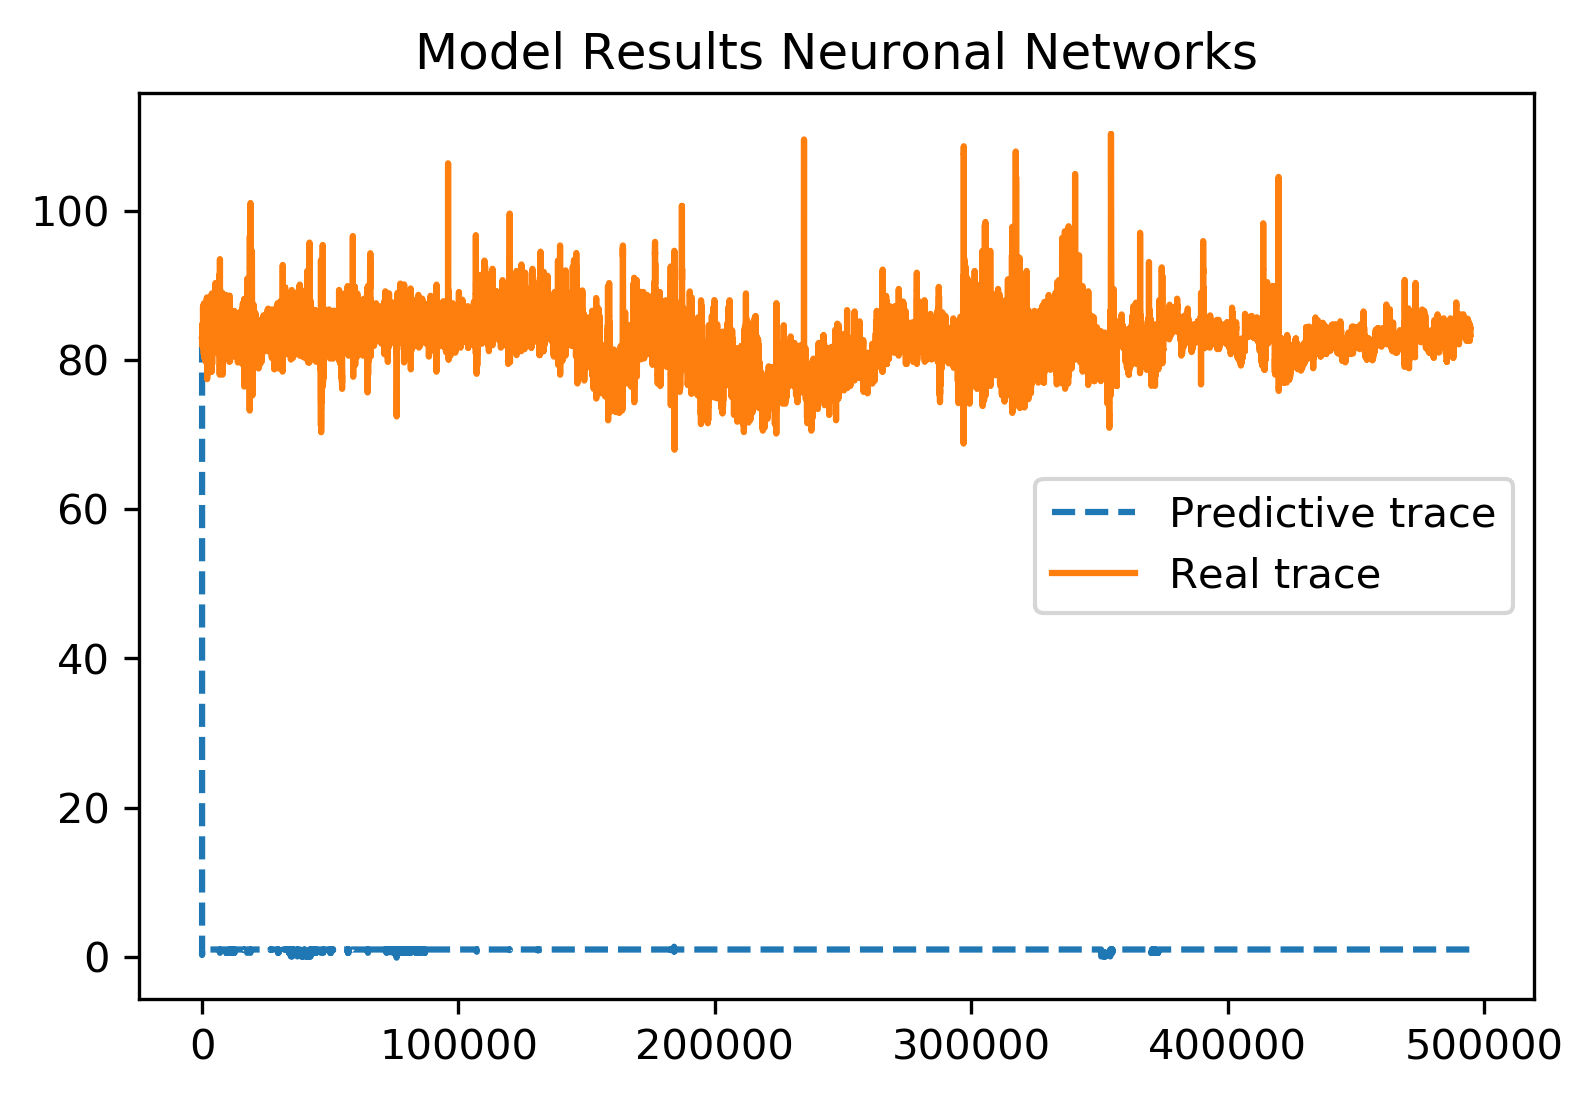

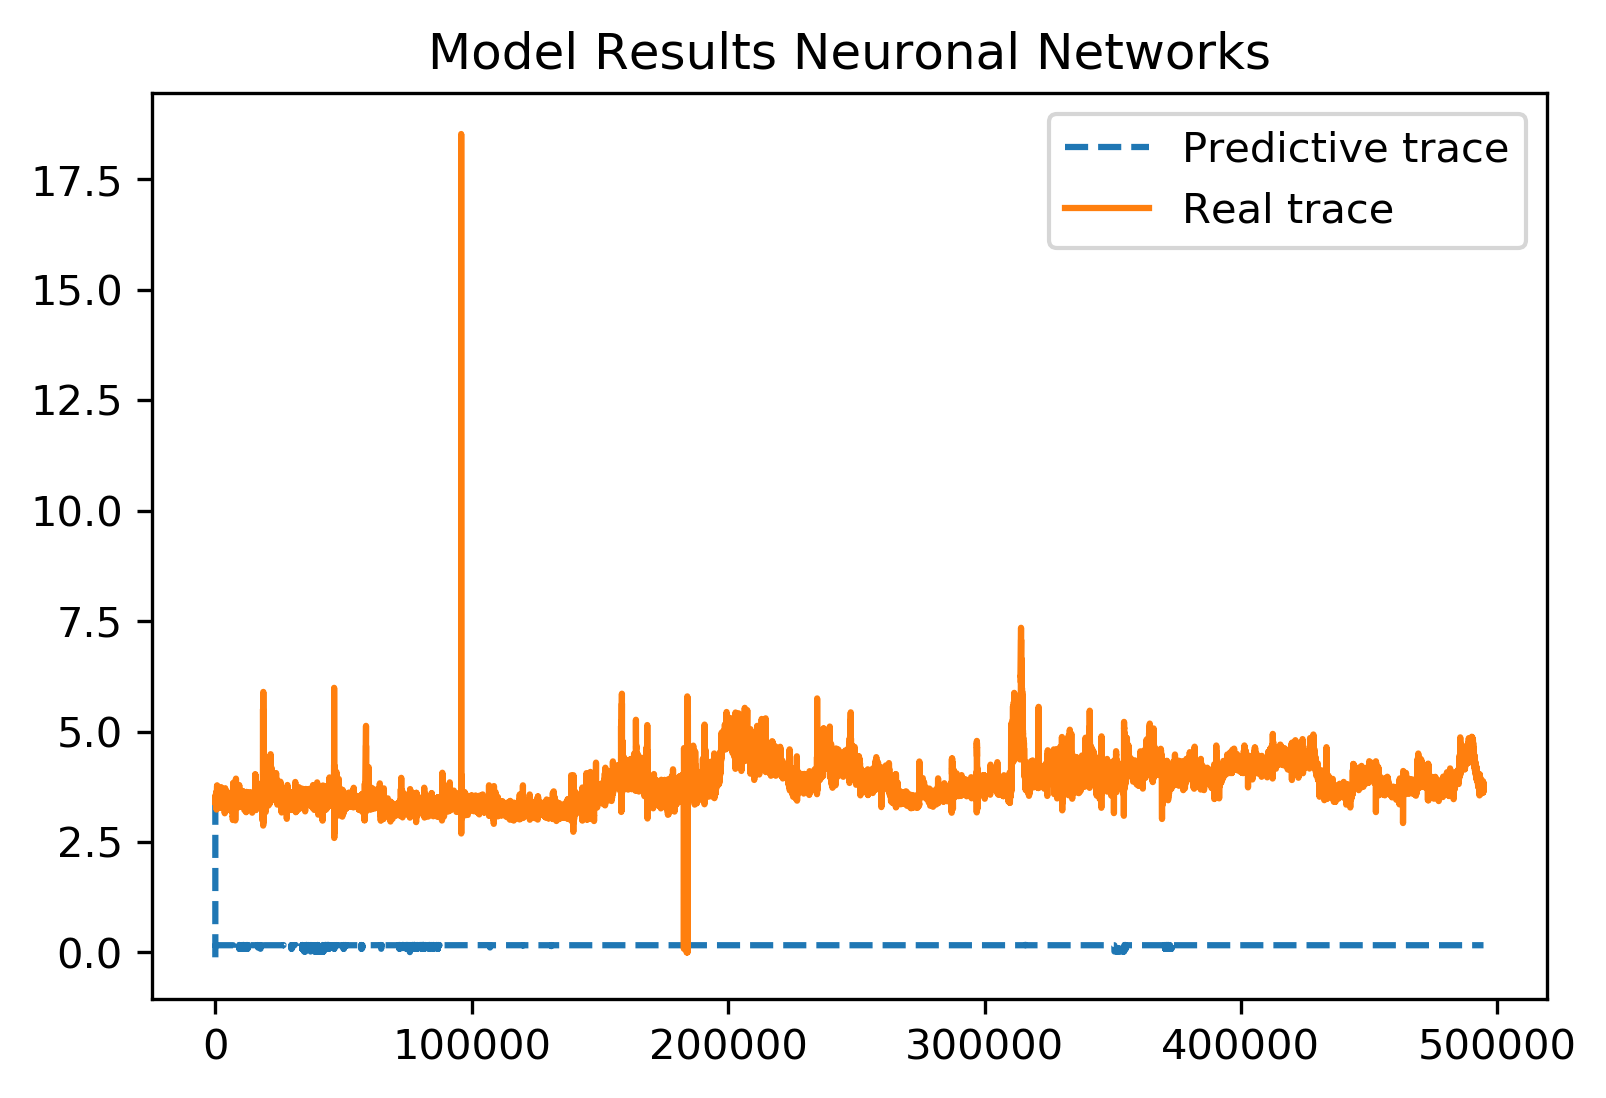

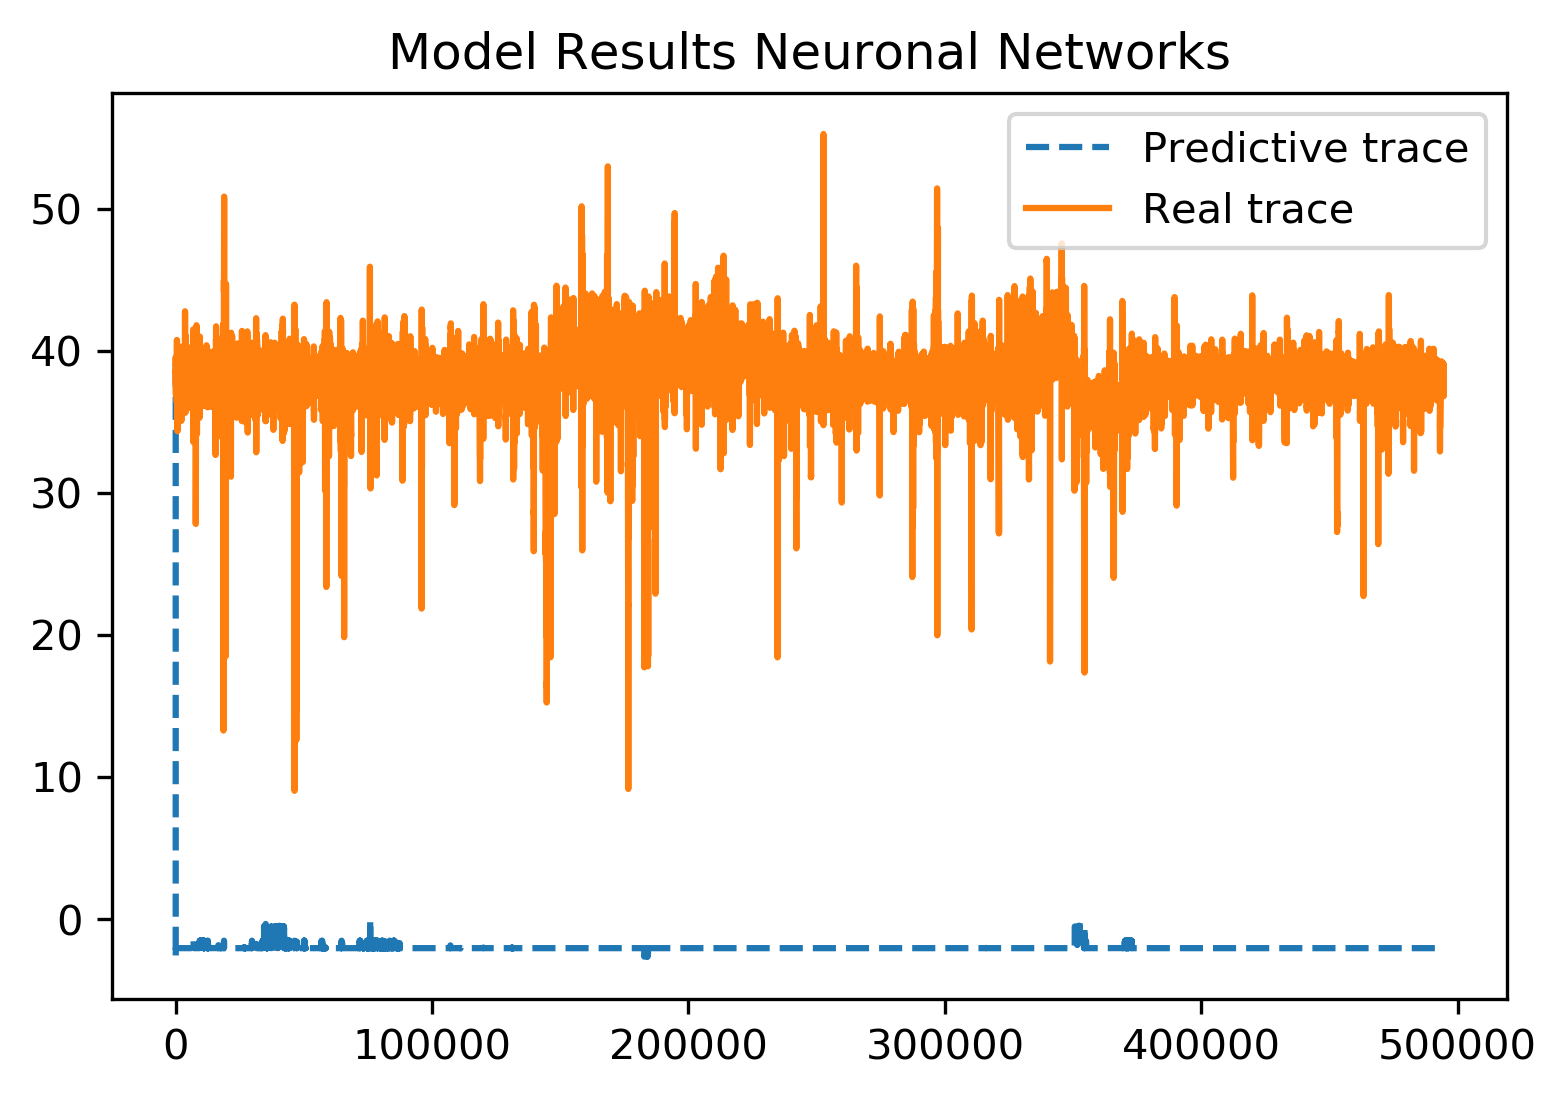

In [85]:
plot_all_traces(nn_trace)

## Polynomial model

In [33]:
poly_trace, _ = get_datadriven_trace(predictor=poly_predictor,initial_state=initial_state,actions_trace=actions_trace)

ERROR at iteration:3
State:

[-5.23074570e+134 -8.10378181e+133  3.43209705e+132 -1.18395194e+131
  1.52598084e+133 -4.48345364e+131  5.05432486e+132  1.05816007e+131
  1.50237833e+131  3.83698165e+134  3.22327273e+126 -4.69291972e+132
  1.25132969e+131 -1.99411535e+130  7.71504245e+131 -2.25147094e+132
 -1.01383390e+132  7.70585297e+131 -1.52427642e+132  1.34098998e+132
 -1.59303660e+134  1.24723266e+134  8.84568840e+131 -8.44643480e+131
  1.60923050e+133  3.42702604e+132 -7.06671455e+130 -4.92007567e+132
 -2.34869103e+131 -6.64992386e+132]
State Trace Shape:  (4, 30)


C:\Users\aalbaher\AppData\Local\Continuum\anaconda3\envs\datadriven\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial)
C:\Users\aalbaher\AppData\Local\Continuum\anaconda3\envs\datadriven\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Gradient Boost Model

In [34]:
gb_trace, _ = get_datadriven_trace(predictor=gb_predictor,initial_state=initial_state,actions_trace=actions_trace)

NameError: name 'gb_predictor' is not defined

In [ ]:
print(gb_trace.shape)

In [ ]:
plot_results(estimate_trace=gb_trace[:,var_i],real_trace=state_trace[:,var_i],model='gradient boost')

### Estimation of Heavy Naphta

The Heavy Naphta production correspond 

- Tag: 14FRC501 | Heavy Naphtha from C1452 | High | Int | \\piserver\14FRC501.MEAS

In [ ]:
#variable you want to check
variable_name='14FRC501.MEAS'

In [ ]:
var_i=np.where(state_names==variable_name)[0][0]
print(var_i)

In [ ]:
gb_trace.shape

In [ ]:
plot_results(estimate_trace=gb_trace[:,var_i],real_trace=state_trace[:,var_i],model='gradient boost')

In [ ]:
x=22
plot_results(estimate_trace=gb_trace[:,x],real_trace=state_trace[:,x],model='gradient boost')
#gb_trace.shape

In [ ]:
for column in range(30):
    name=state_names[column]
    plt.plot(gb_trace[:,column],label=name)
    plt.show()

In [ ]:
stats_gb_trace=np.zeros((30,4))
for state in range(30):
    #name=state_names[state]
    maximum,minimum,mean,std=get_stats(gb_trace[:,state],show_stats=False)
    stats_gb_trace[state,0],stats_gb_trace[state,1],stats_gb_trace[state,2],stats_gb_trace[state,3] = maximum,minimum,mean,std
    #print(name)
    #print('*'*10)

In [ ]:
stats_gb_trace

In [ ]:
#gb_trace.shape
'''
rows=[0,10,100,1000,10000,100000]
for row in rows:
    plot_results(estimate_trace=gb_trace[y,:],real_trace=state_trace[y,:],model='gradient boost')
'''

### Testing accuracy over several steps

In [ ]:
state_estimation=[]
input_state=state_i.iloc[0,:]
#This is NOT the fastest way but let's test
for row in range(0,len(state_i)):
    try:
        input_state=poly_predictor.predict(input_state,actions_i.iloc[row,:])
    except:
        print("ERROR at iteration:%s\nState:\n" % (row))
        print(input_state)
        break
    state_estimation.append(input_state)

Converting into numpy array for plot results easily.

In [ ]:
# list index (observation, state)
out=np.array(state_estimation)
out.shape

Let's say I want to plot only one variable to see how it does behave.

In [ ]:
output_var=5

In [ ]:
#len(out[:,1])
plt.plot(out[:,output_var])

In [ ]:
#row,column
state_o.iloc[0,output_var]

In [ ]:
plt.plot(state_o.iloc[:,output_var])

In [ ]:
s_e.shape

# GB model

In [ ]:
gb_predictor=ModelPredictor(modeltype='gb', noise_percentage=0, action_space_dim=ACTION_SPACE_DIM,
                              state_space_dim=STATE_SPACE_DIM, markovian_order=MARKOVIAN_ORDER)

In [ ]:
#testing with a single iteration
gb_predictor.predict(s,a)

In [ ]:
state_estimation=[]
input_state=state_i.iloc[0,:]
#This is NOT the fastest way but let's test
for row in range(0,len(state_i)):
    try:
        input_state=gb_predictor.predict(input_state,actions_i.iloc[row,:])
    except:
        print("ERROR at iteration:%s\nState:\n" % (row))
        print(input_state)
        break
    state_estimation.append(input_state)

In [ ]:
# list index (observation, state)
out=np.array(state_estimation)
out.shape

In [ ]:
#len(out[:,1])
plt.plot(out[:,output_var])